# Purpose
The purpose of this notebook is to get an overview of the data included in the dataset `immoscout_cleaned_lat_lon_fixed_v9.csv`

# Summary

The dataset contains 13378 rows and 108 columns.   
We've identified that the dataset contains data on the following features:   

| Feature | Columns |  
| ------- | ------- |  
| Availability | `Availability`, `Availability_merged`, `Disponibilità`, `Disponibilité`, `Verfügbarkeit`, `detail_responsive#available_from` |  
| Address | `Commune`, `Comune`, `Gemeinde`, `Municipality`, `Municipality_merged`, `detail_responvice#municipality`, `address`, `Locality`, `location`, `location_parsed`, `table`, `details_structured`, `zip` |   
| Coordinates | `Latitude`, `lat`, `Longitude`, `lon` |  
| Floor | `Floor`, `Floor_merged`, `Piano`, `Stockwerk`, `Étage`, `detail_responsive#floor`, `table`, `details_structured` |  
| Gross return | `Gross return`, `table`, `details_structured` |  
| Plot area | `Grundstücksfläche`, `Plot area`, `Plot_area_merged`, `Superficie del terreno`, `Surface de terrain`, `detail_responsive#surface_property`, `table`, `details_structured` |  
| Living space | `Living space`, `Living_space_merged`, `Superficie abitabile`, `Surface habitable`, `Wohnfläche`, `detail_responsive#surface_living`, `description`, `table`, `details_structured` |  
| Environment | `NoisePollutionRailwayL`, `NoisePollutionRailwayM`, `NoisePollutionRailwayS`, `NoisePollutionRoadL`, `NoisePollutionRoadM`, `NoisePollutionRoadS`, `PopulationDensityL`, `PopulationDensityM`, `PopulationDensityS`, `RiversAndLakesL`, `RiversAndLakesM`, `RiversAndLakesS`, `ForestDensityL`, `ForestDensityM`, `ForestDensityS`, `WorkplaceDensityL`, `WorkplaceDensityM`, `WorkplaceDensityS`, `distanceToTrainStation` |  
| gde | `gde_area_agriculture_percentage`, `gde_area_forest_percentage`, `gde_area_nonproductive_percentage`, `gde_area_settlement_percentage`, `gde_average_house_hold`, `gde_empty_apartments`, `gde_foreigners_percentage`, `gde_new_homes_per_1000`, `gde_politics_bdp`, `gde_politics_cvp`, `gde_politics_evp`, `gde_politics_fdp`, `gde_politics_glp`, `gde_politics_gps`, `gde_politics_pda`, `gde_politics_rights`, `gde_politics_sp`, `gde_politics_svp`, `gde_pop_per_km1`, `gde_population`, `gde_private_apartments`, `gde_social_help_quota`, `gde_tax`, `gde_workers_sector1`, `gde_workers_sector2`, `gde_workers_sector3`, `gde_workers_total` |  
| Price | `price`, `price_cleaned`, `description`, `details_structured` |  
| Rooms | `rooms`, `description`, `details_structured` |  
| Type | `type` |    


Many features are contained in multiple columns. [This](./3-daw_quantitative.html) and [this](./4-daw_qualitative.html) notebook explores how they can be aggregated. 

In [1]:
# Import modules
import pandas as pd
import numpy as np
import sweetviz as sv

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Immobilienrechner-Challenge/data/main/immoscout_cleaned_lat_lon_fixed_v9.csv', low_memory=False)

In [3]:
df.shape

(13378, 108)

                                             |          | [  0%]   00:00 -> (? left)


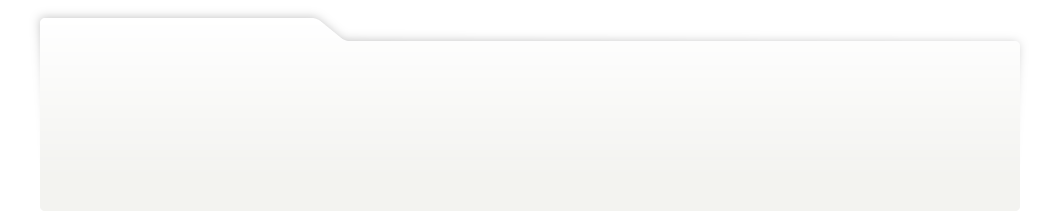
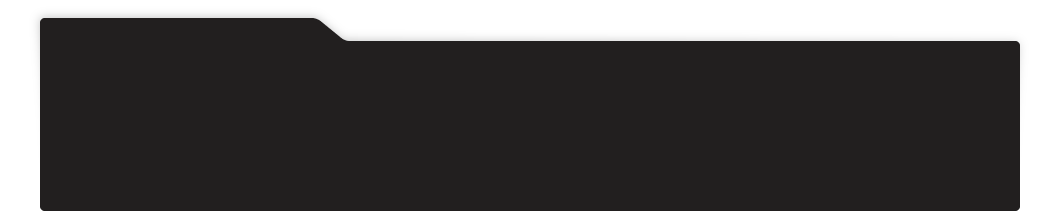
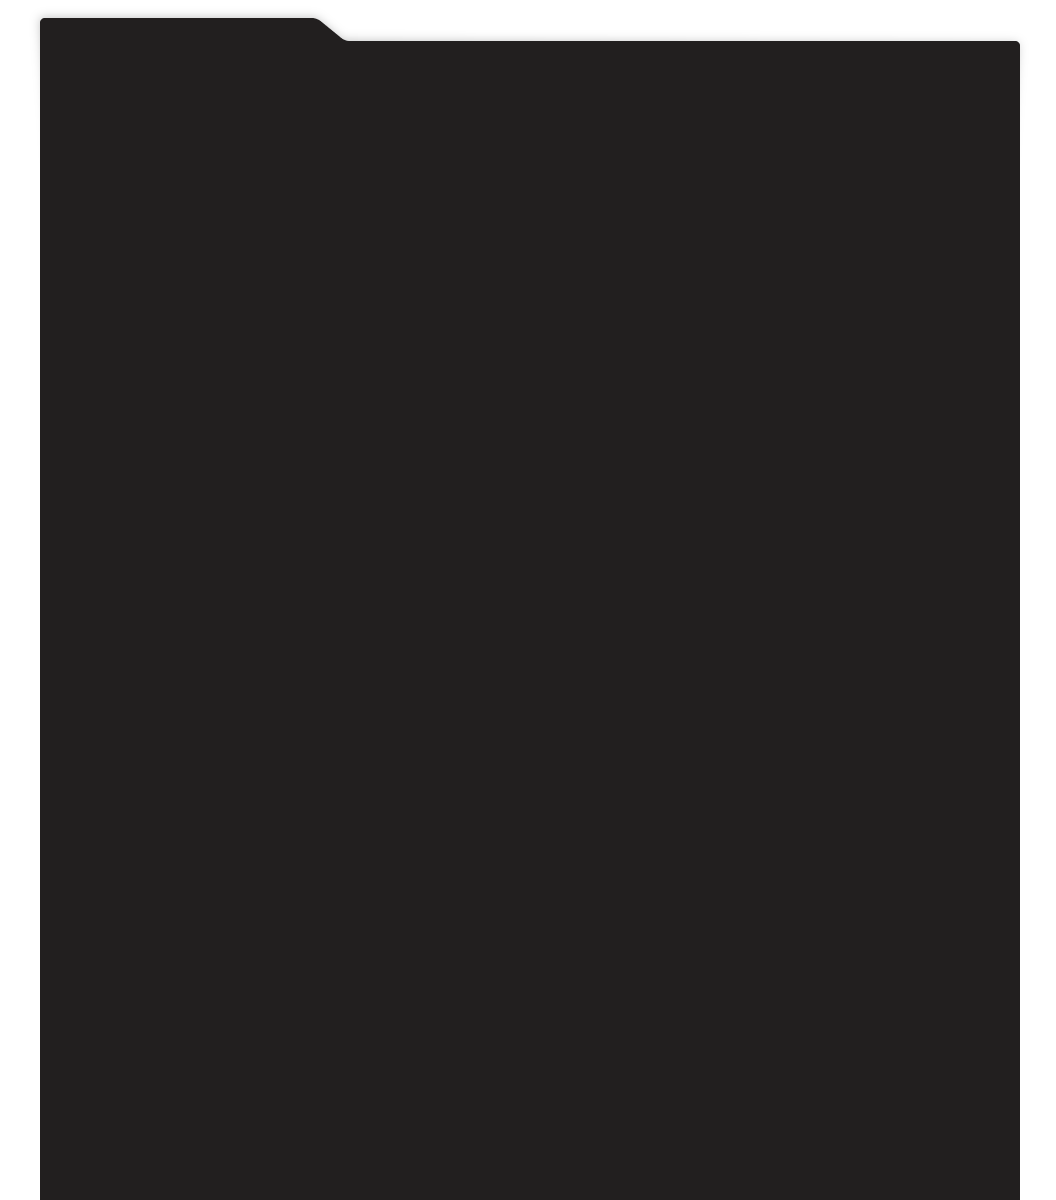
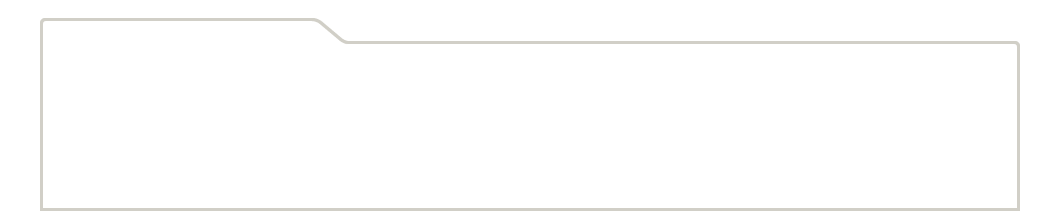
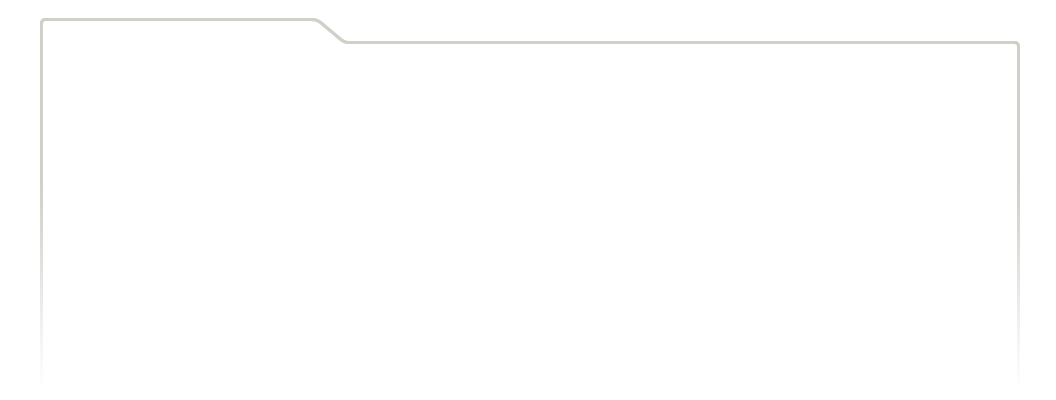
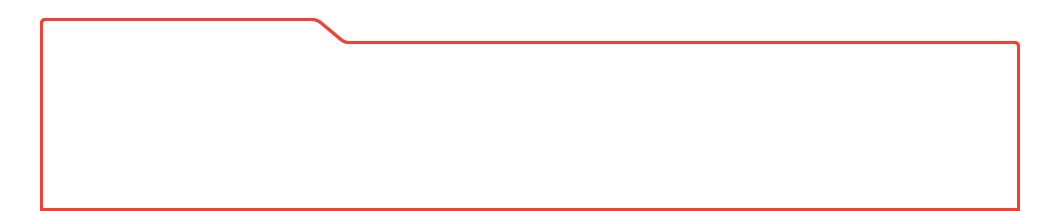
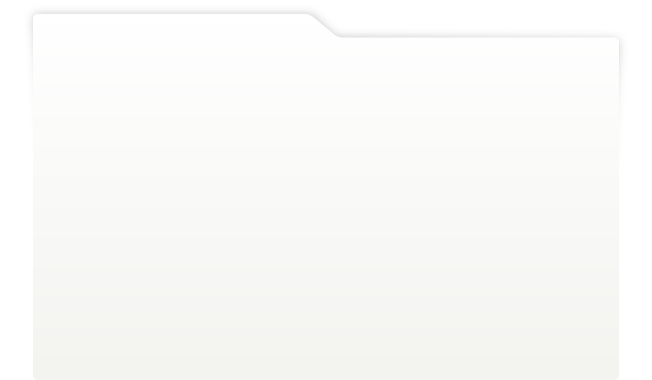
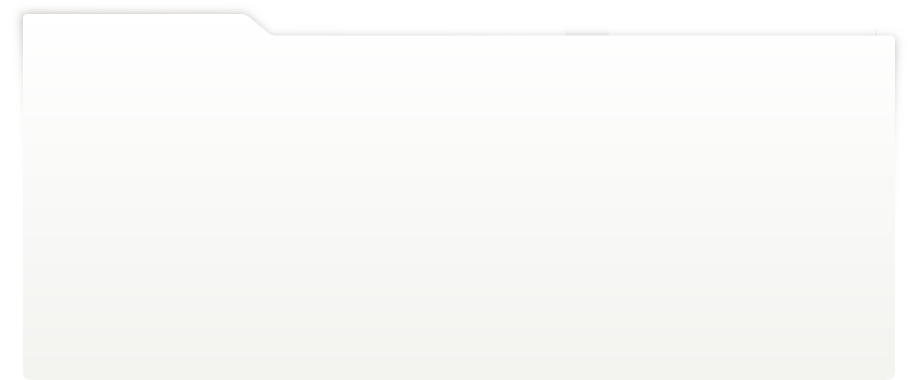
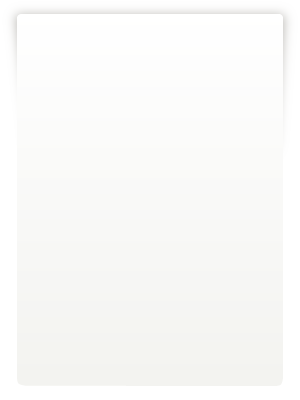
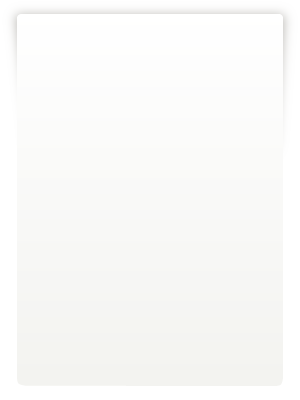
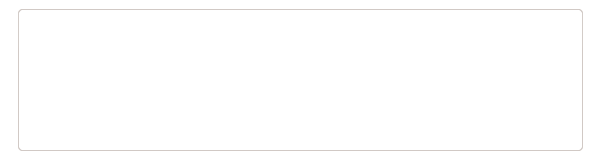
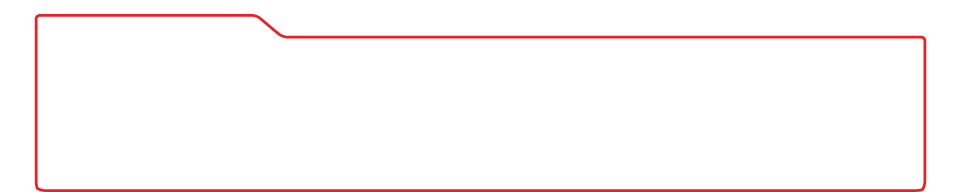
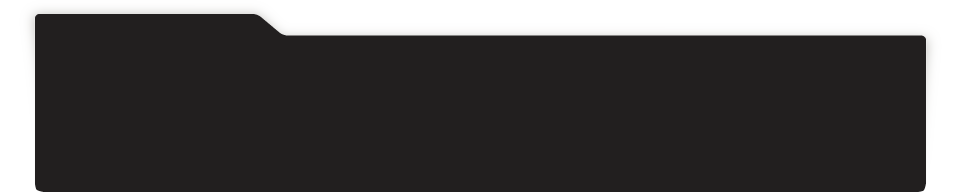
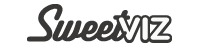
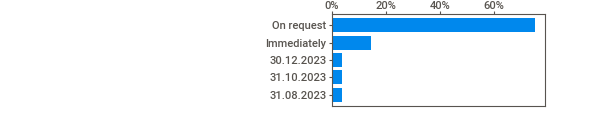
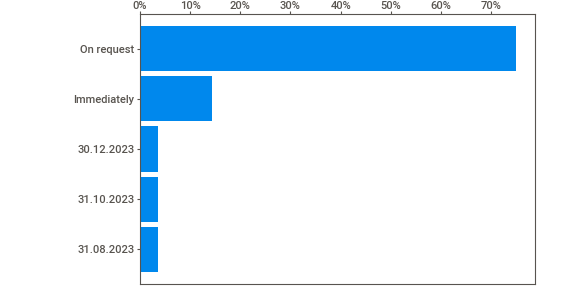
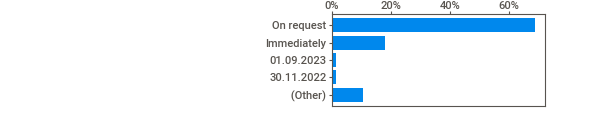
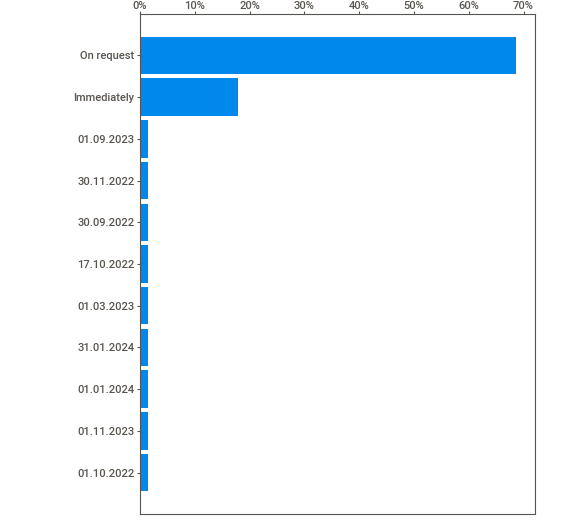
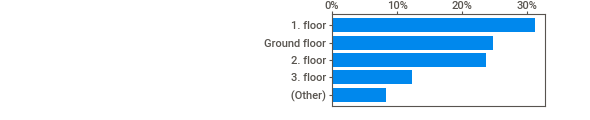
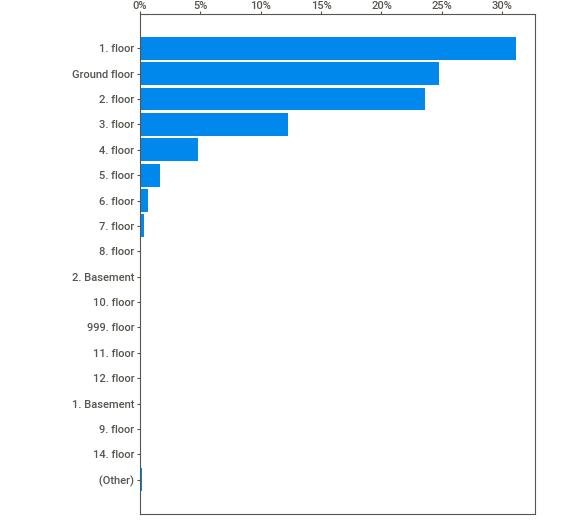
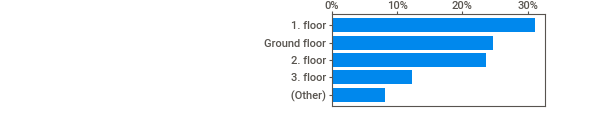
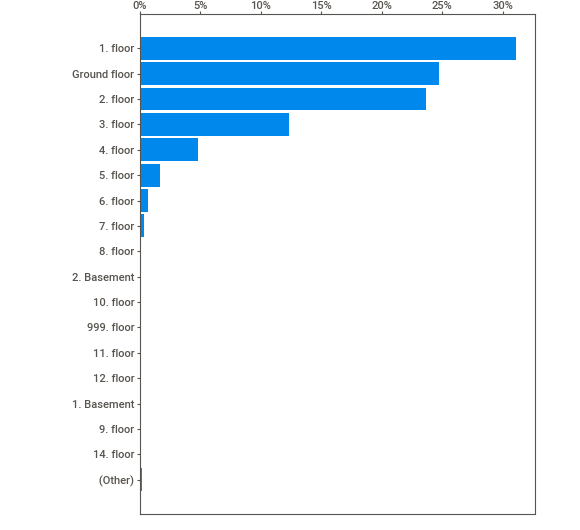
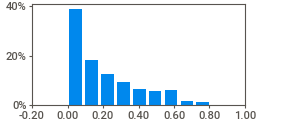
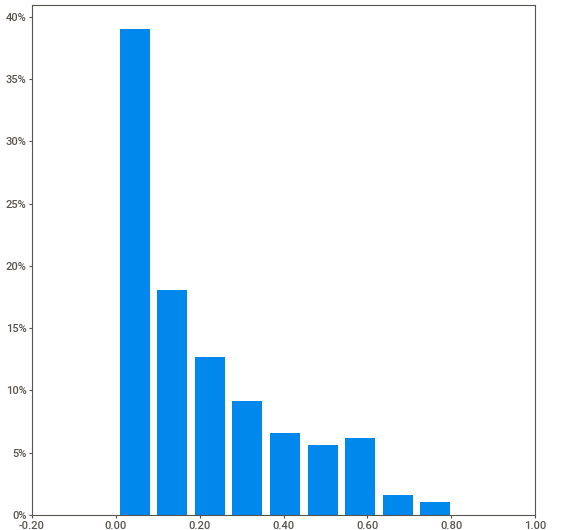
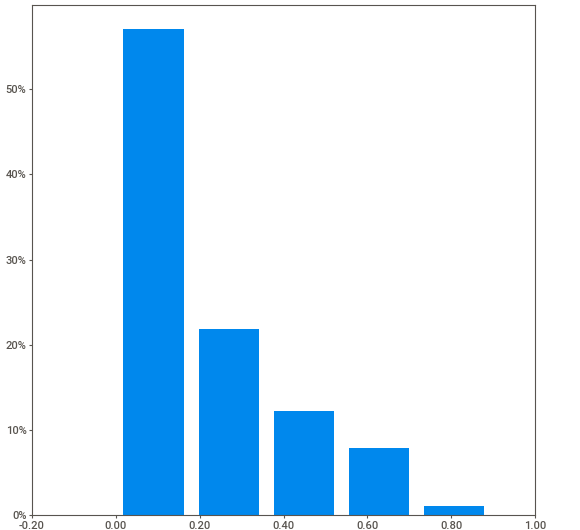
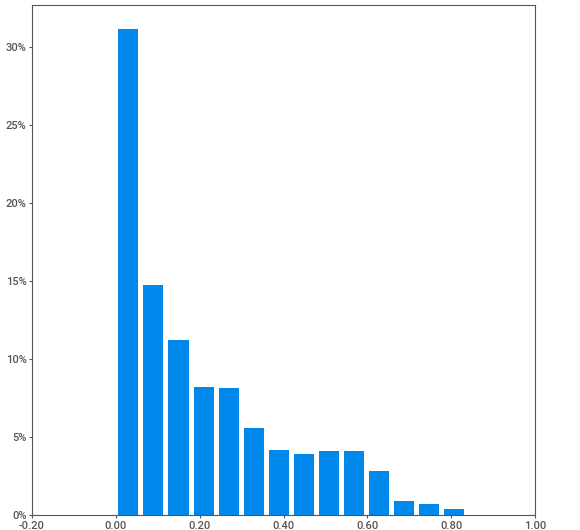
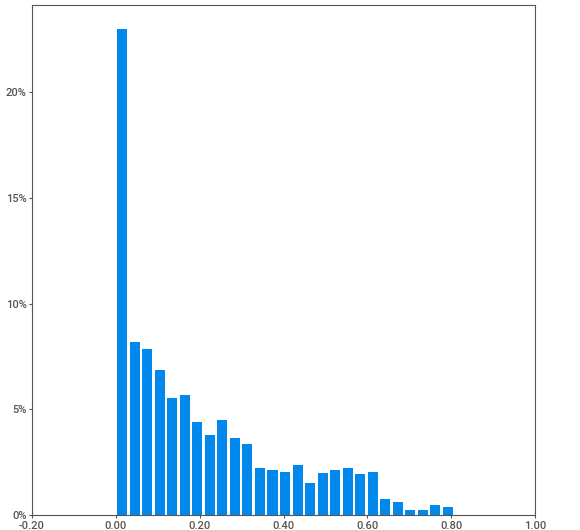
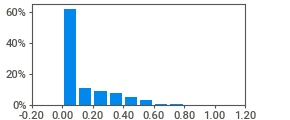
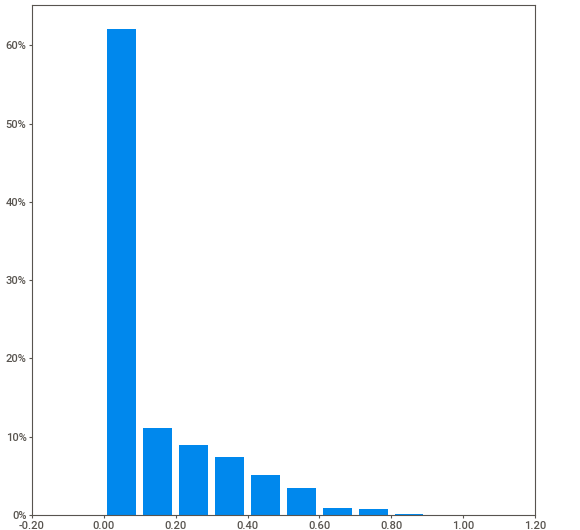
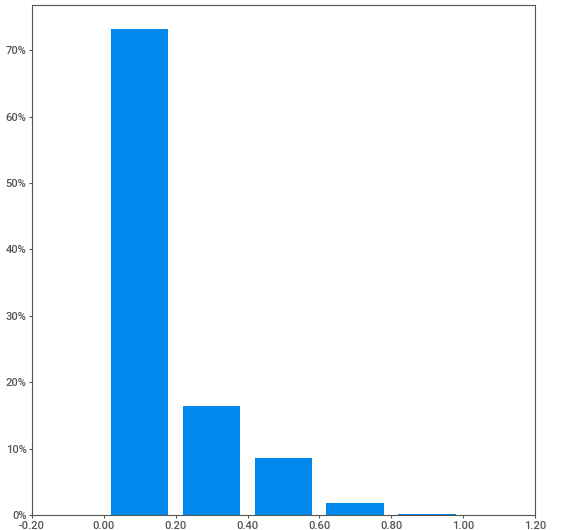
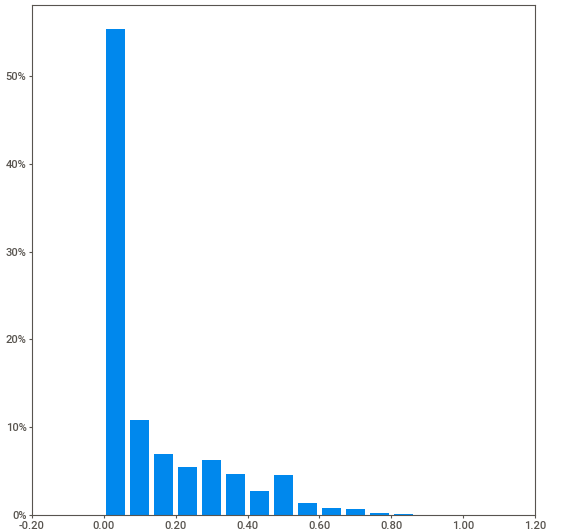
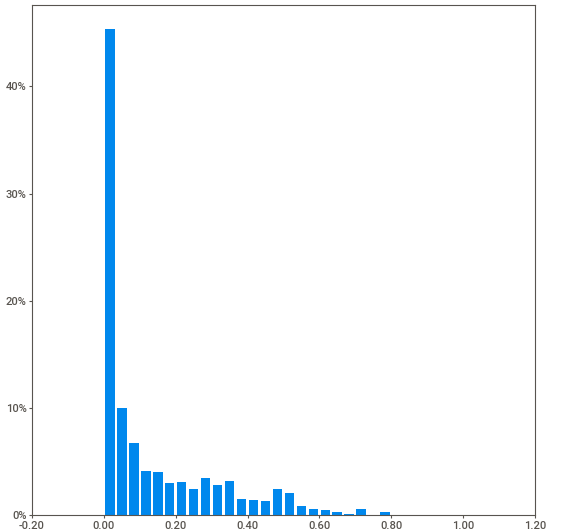
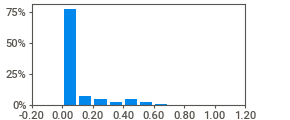
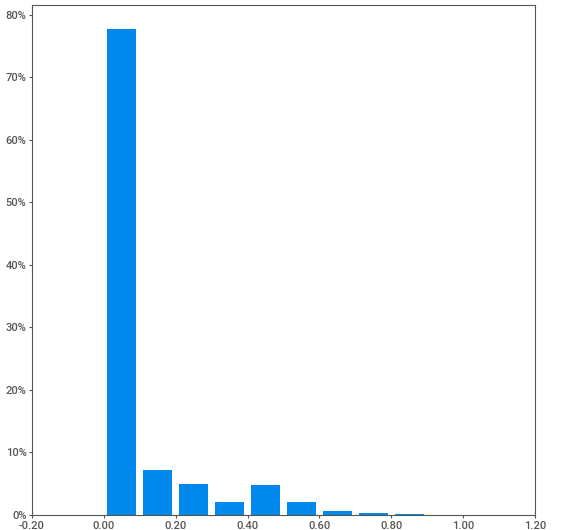
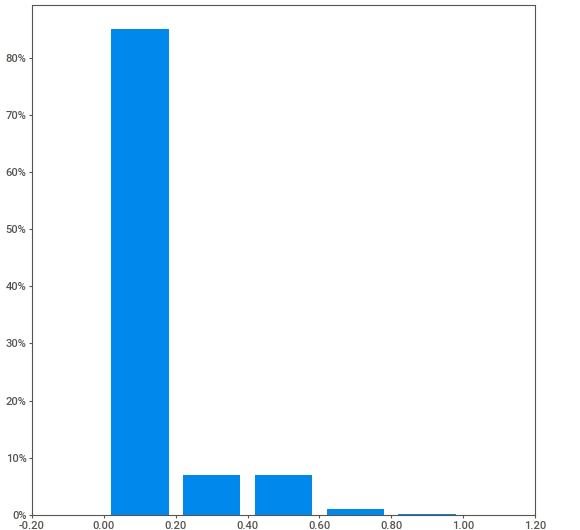
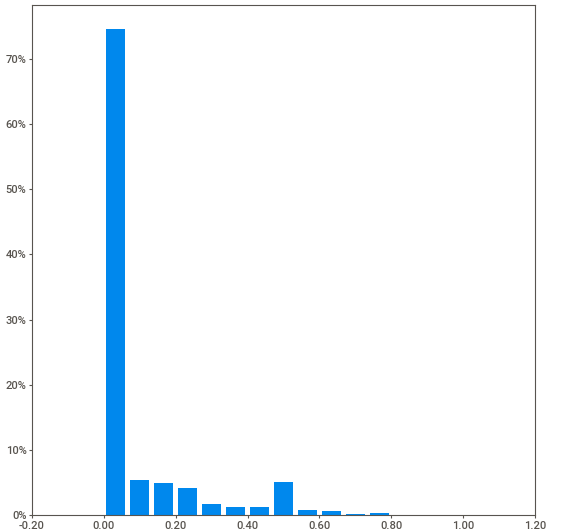
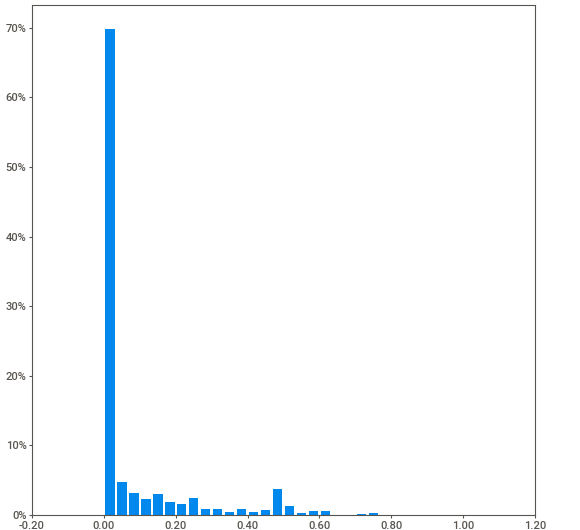
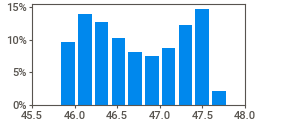
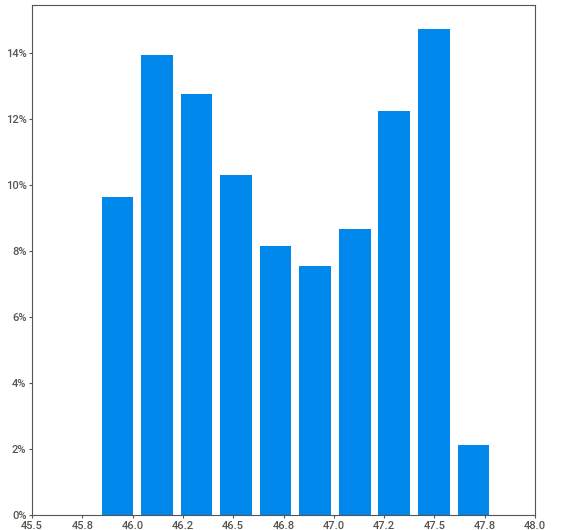
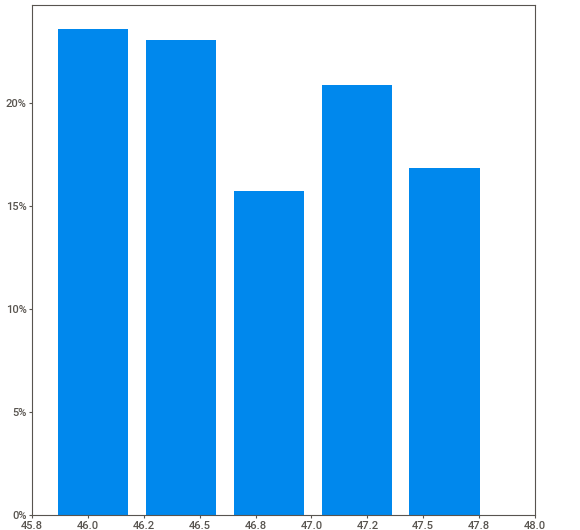
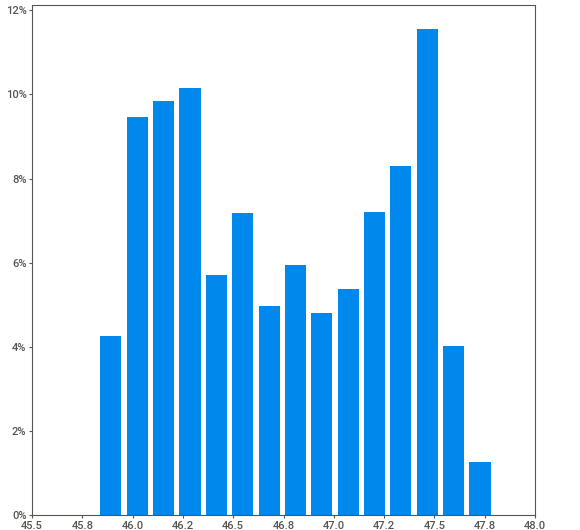
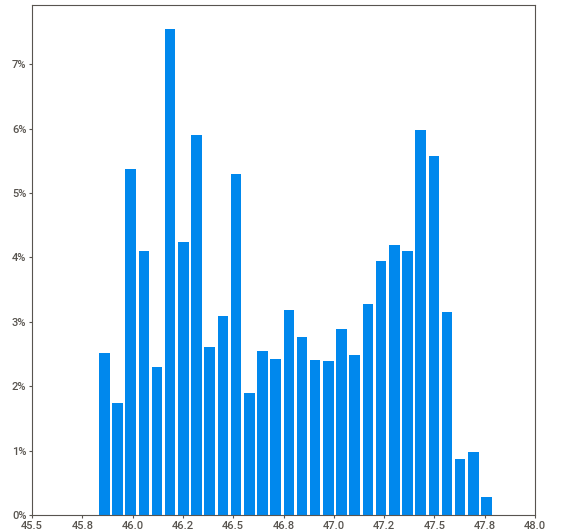
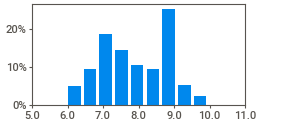
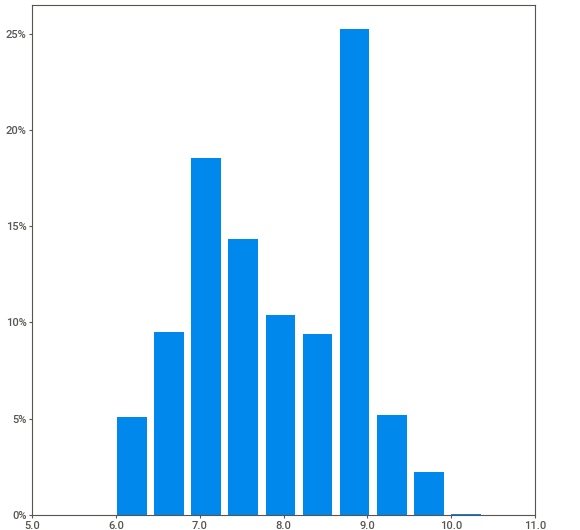
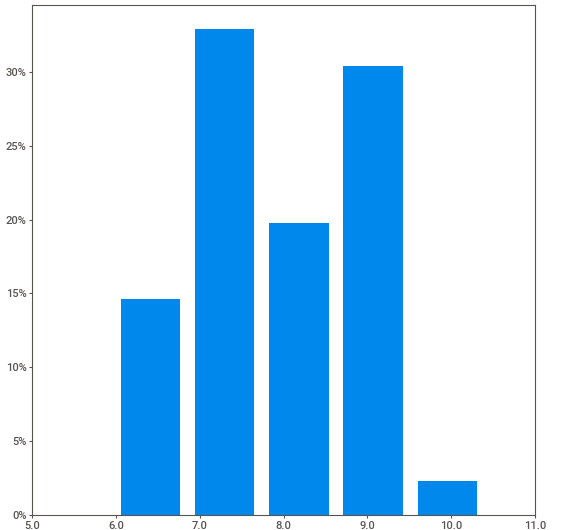
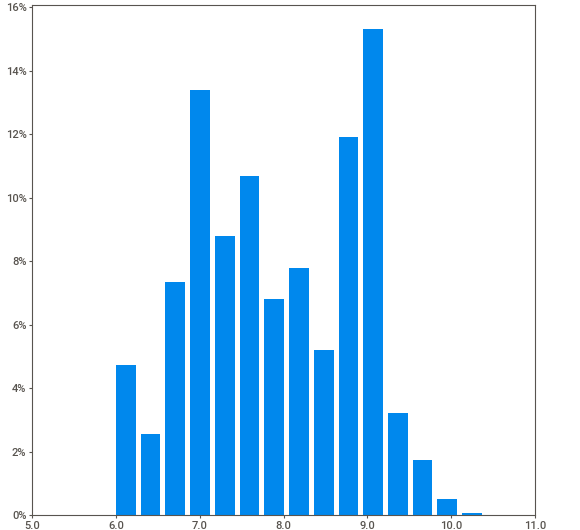
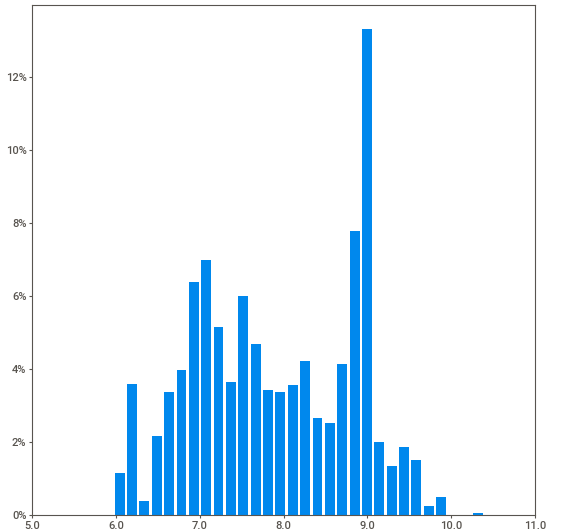
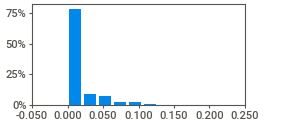
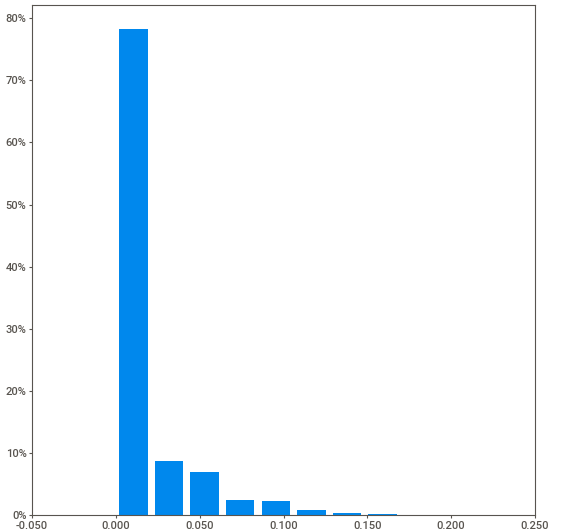
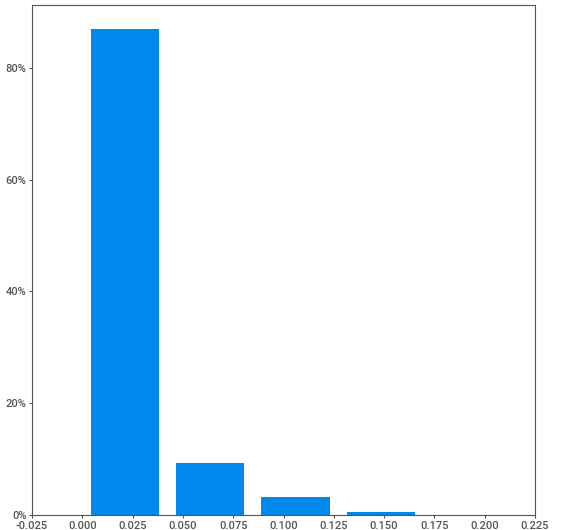
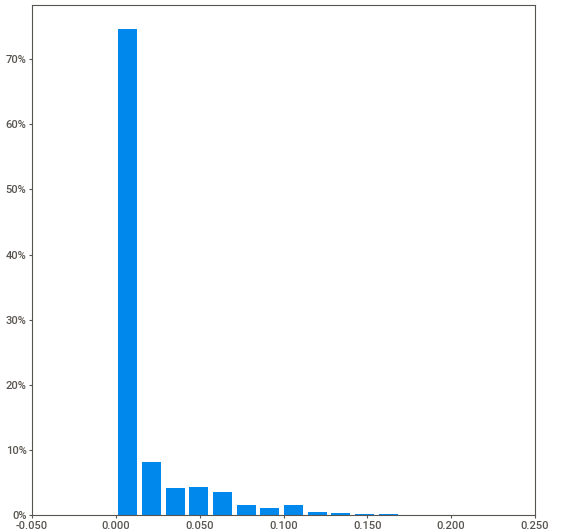
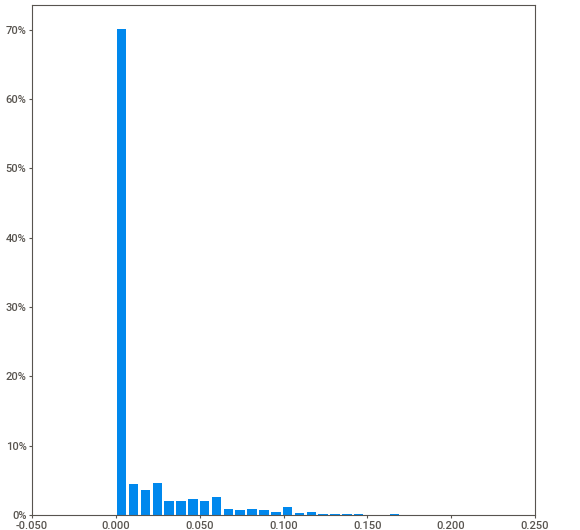
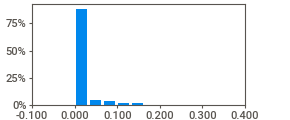
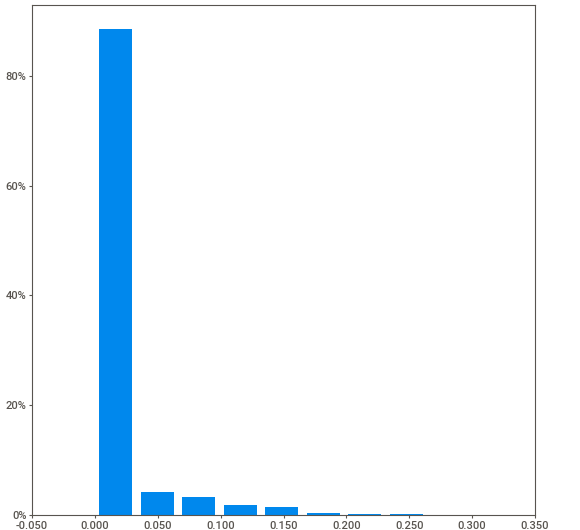
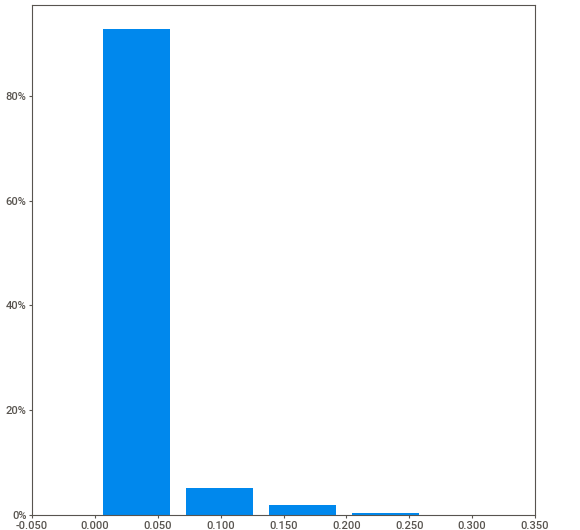
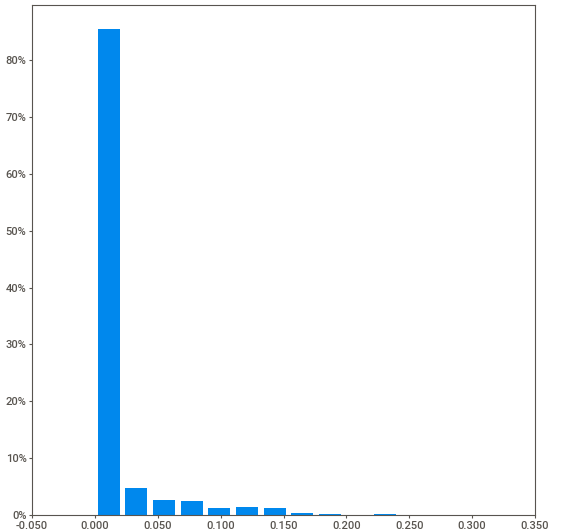
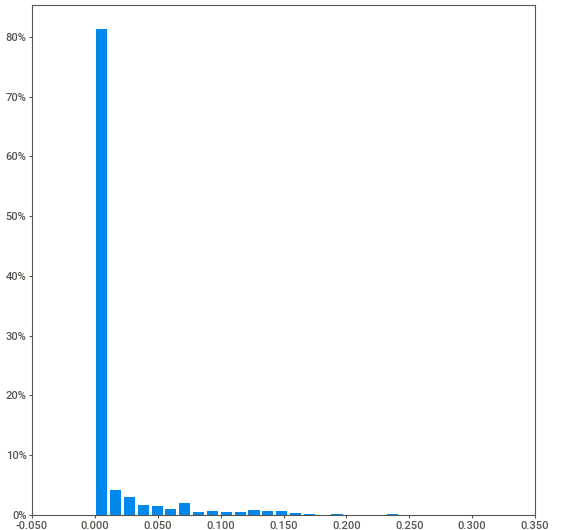
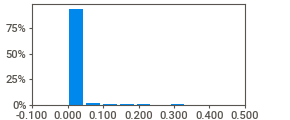
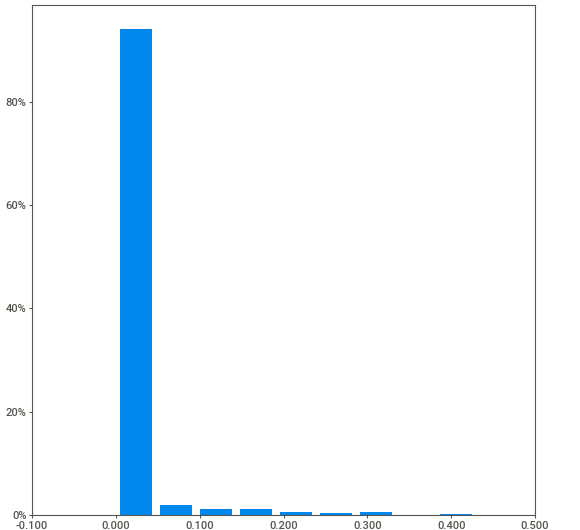
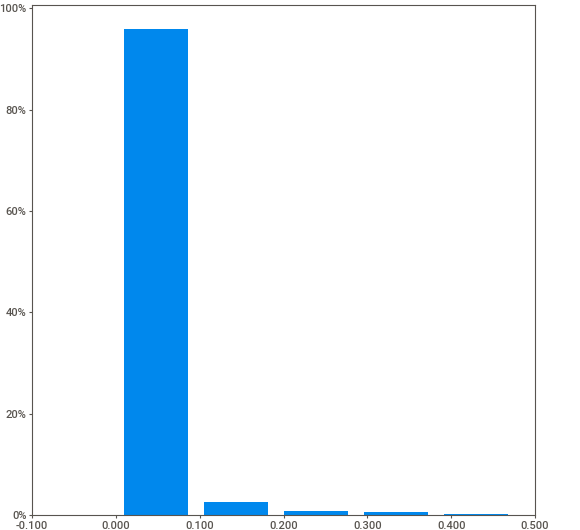
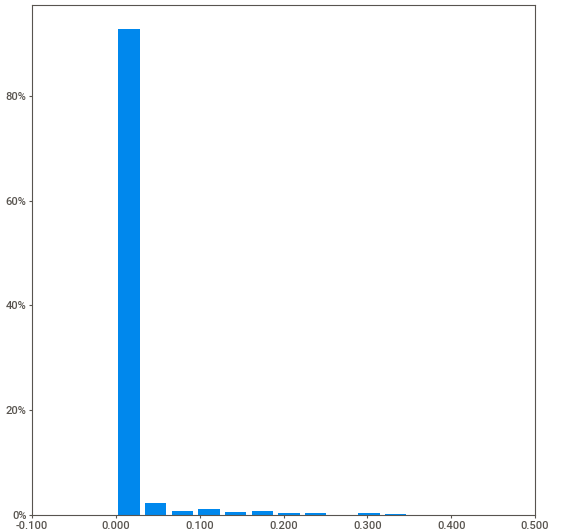
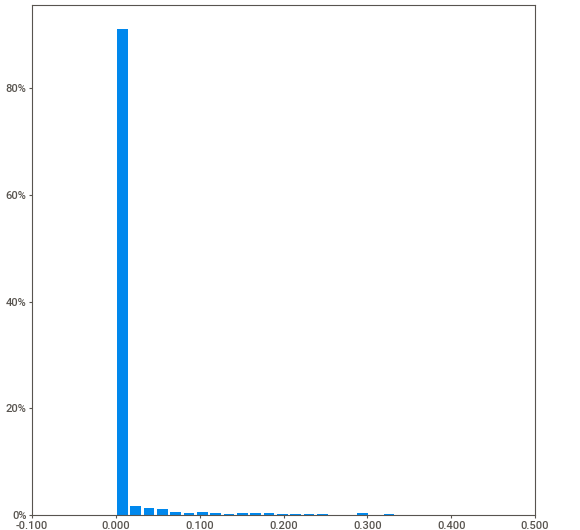
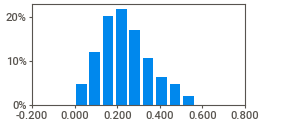
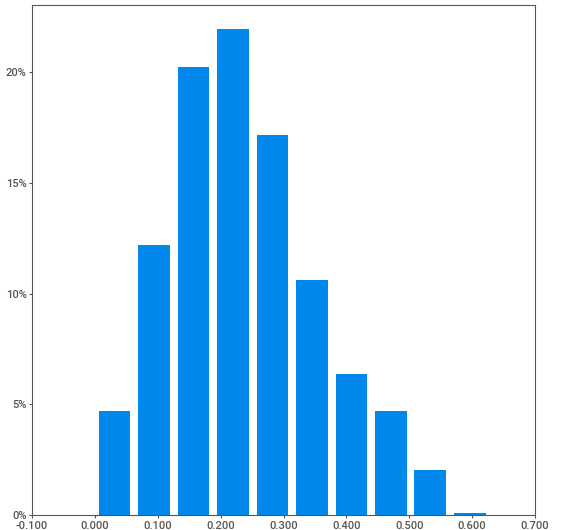
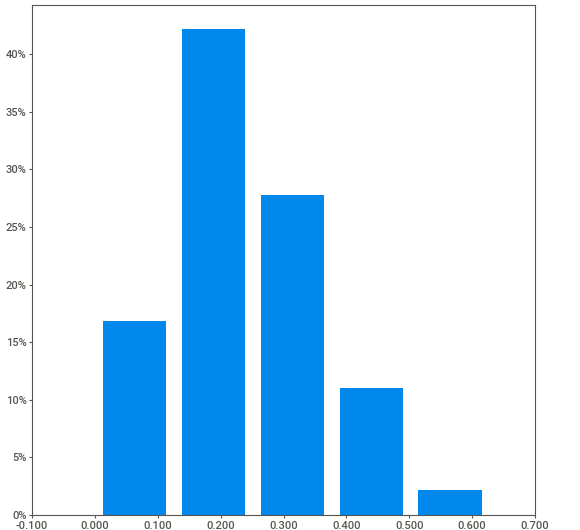
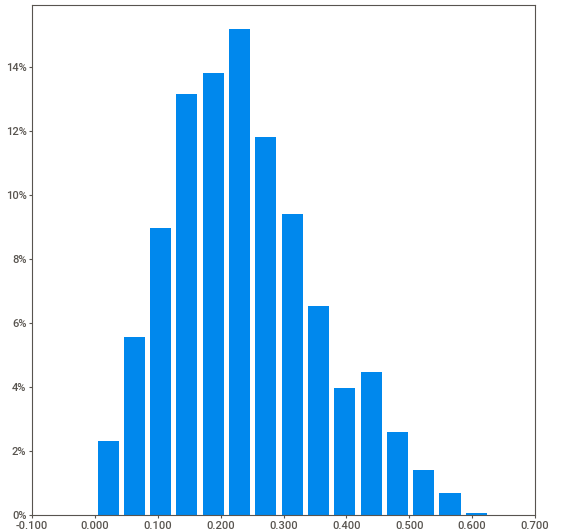
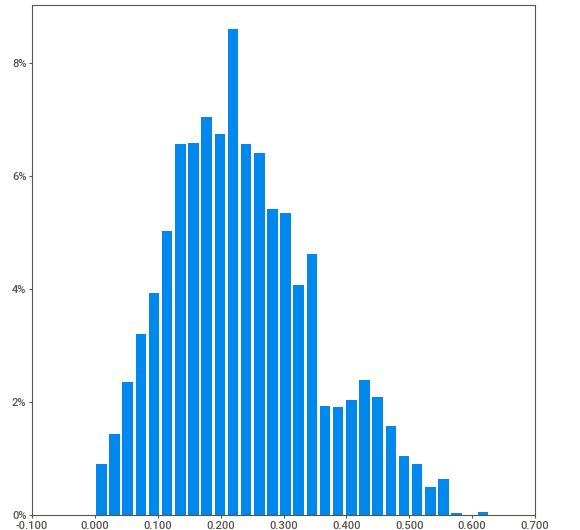
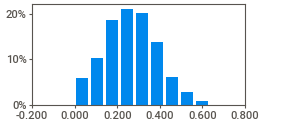
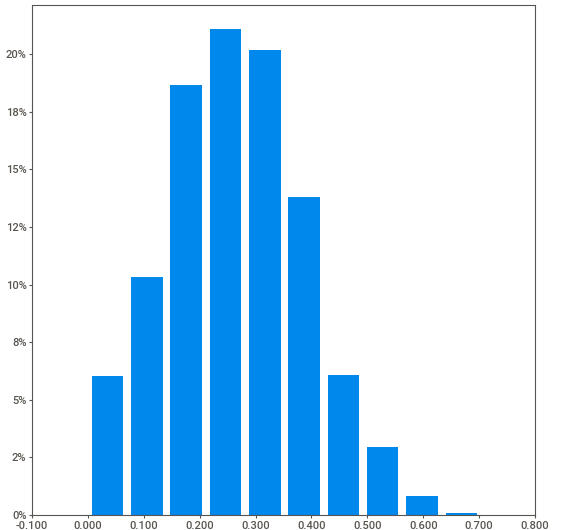
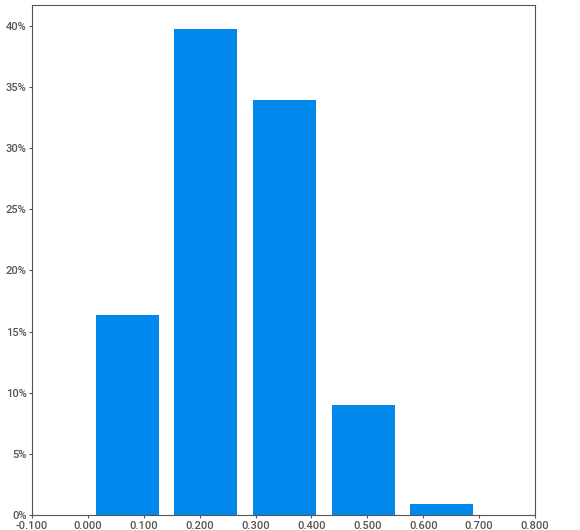
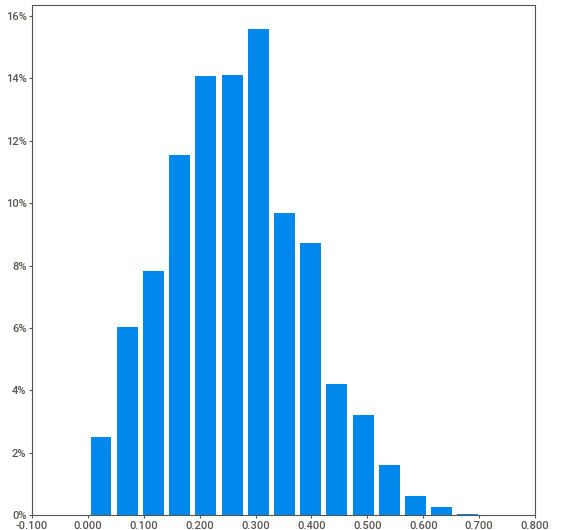
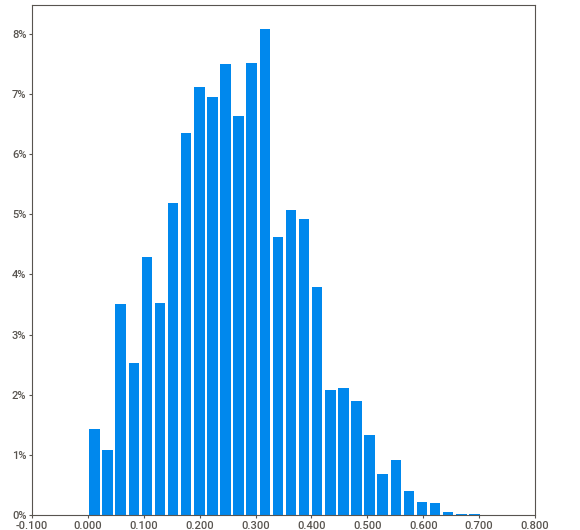
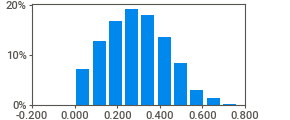
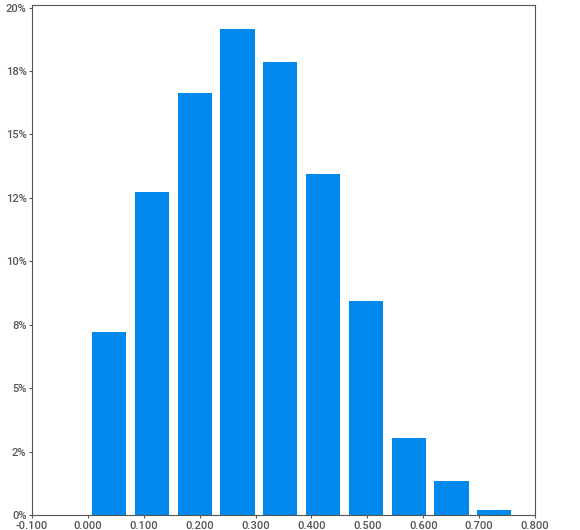
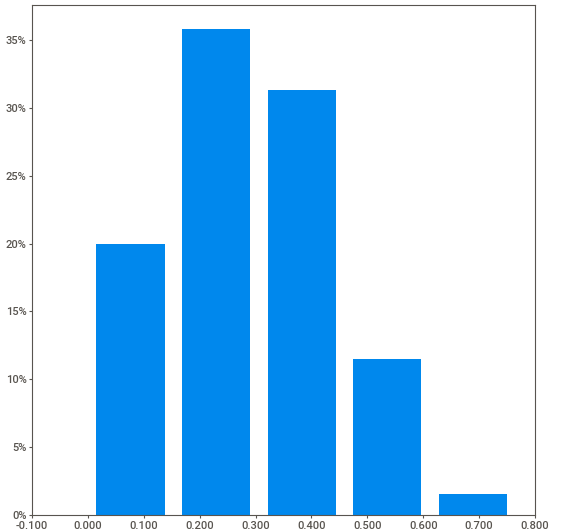
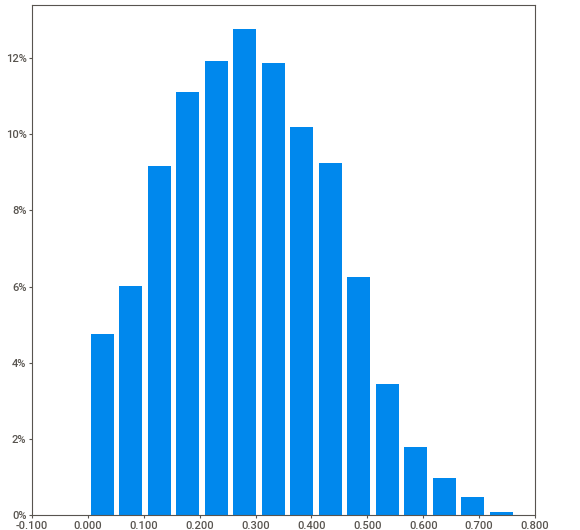
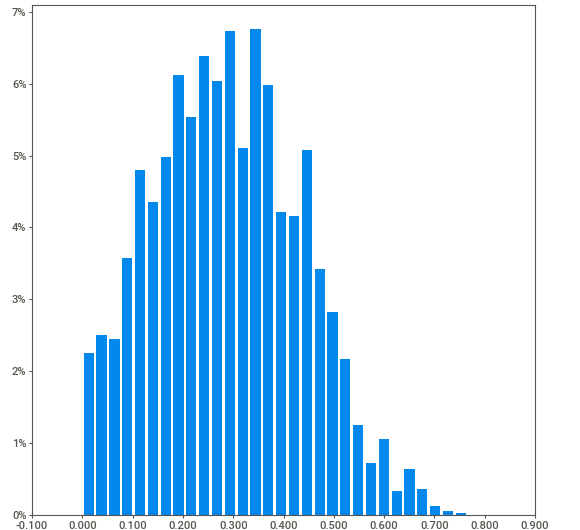
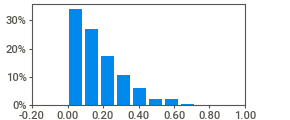
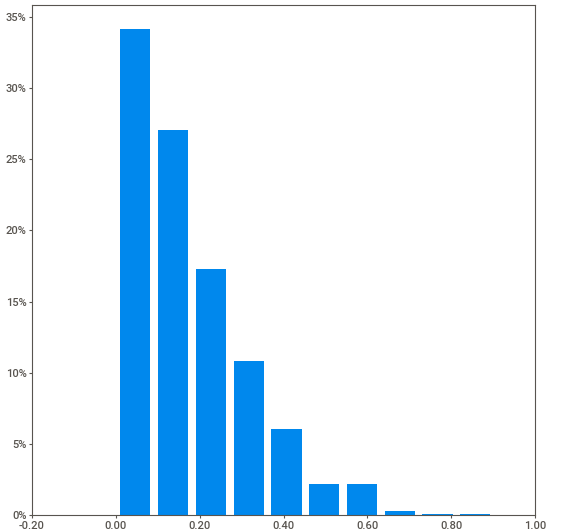
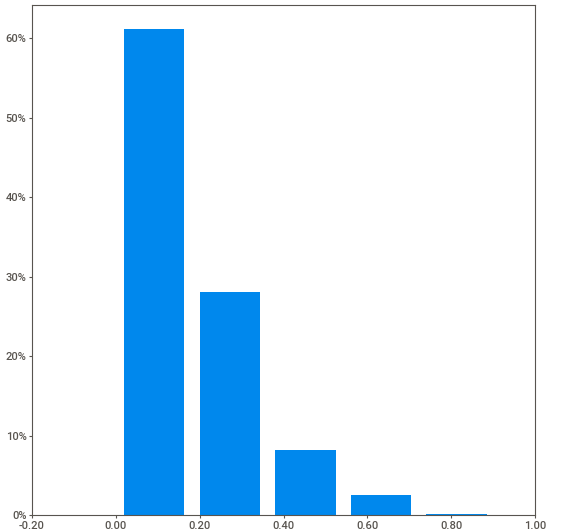
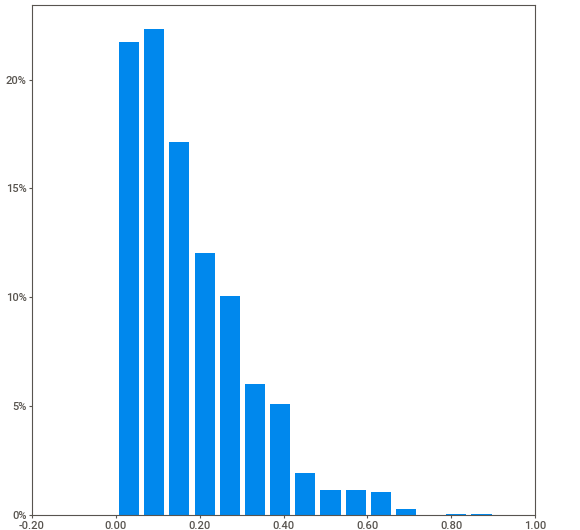
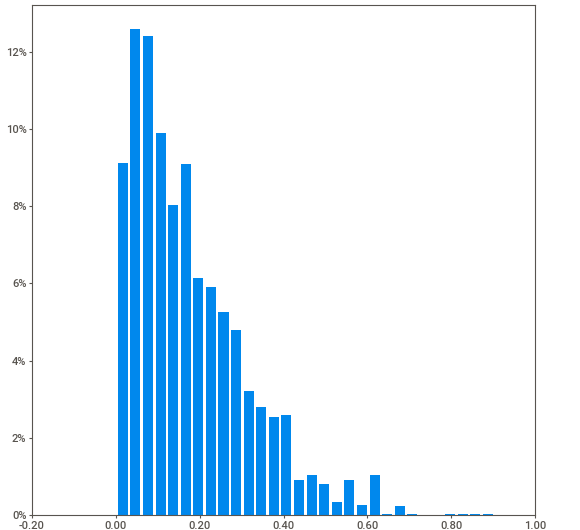
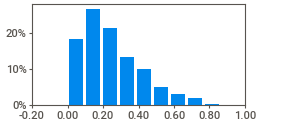
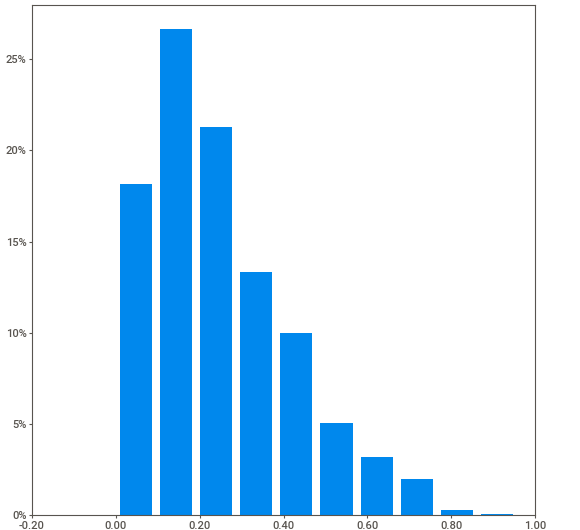
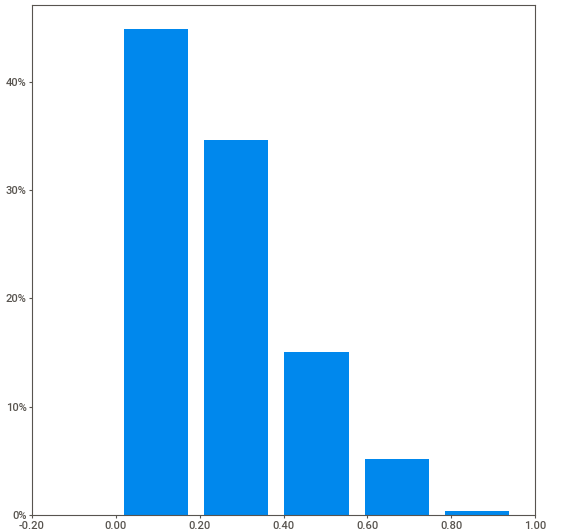
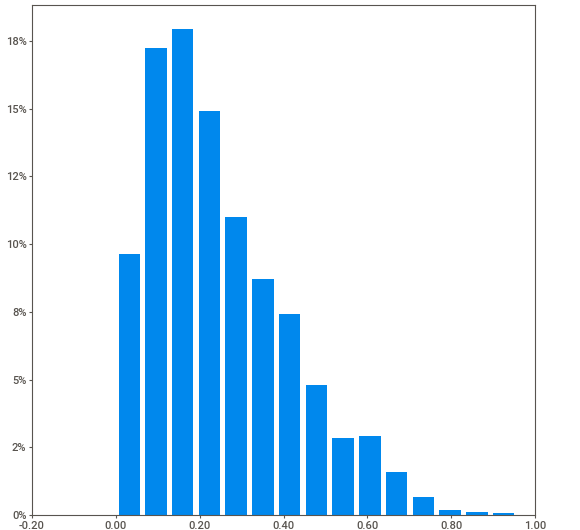
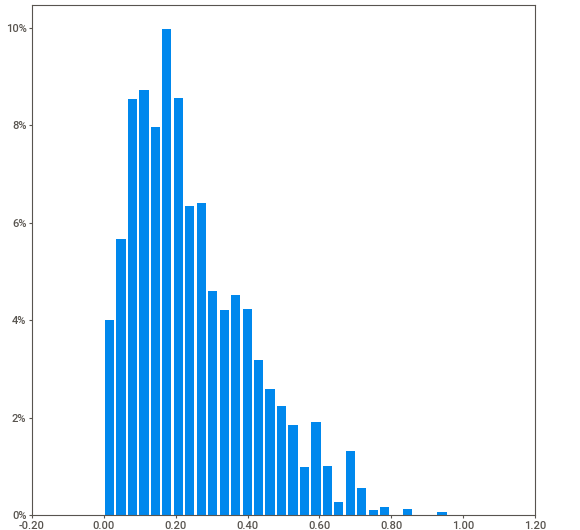
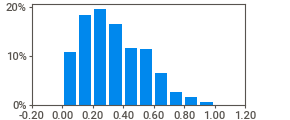
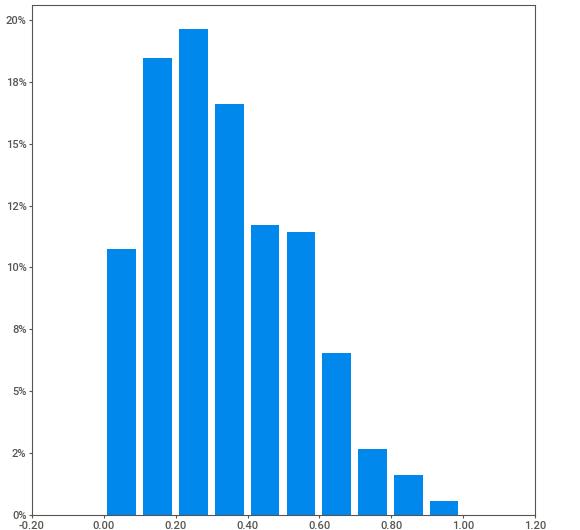
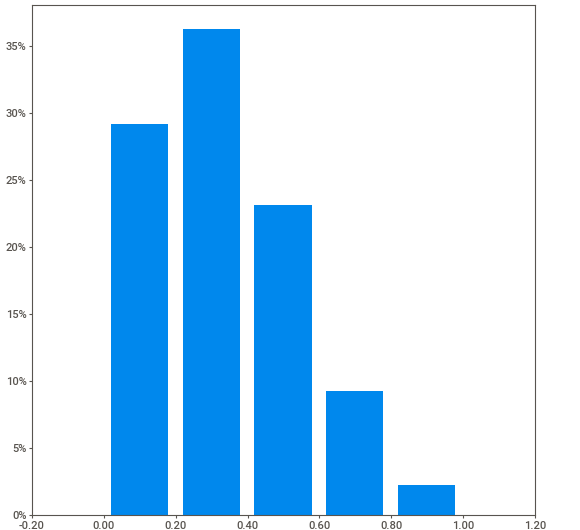
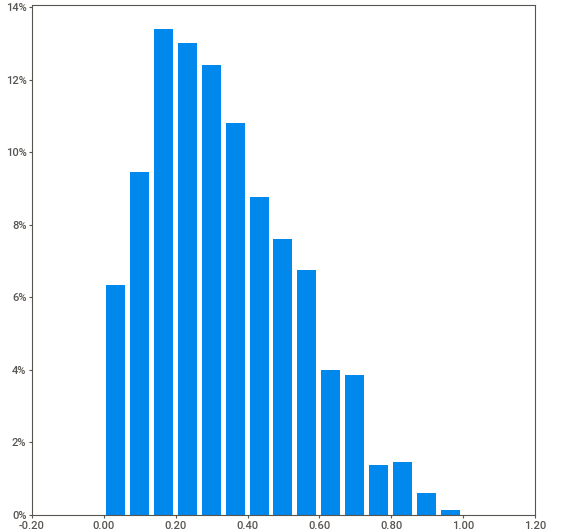
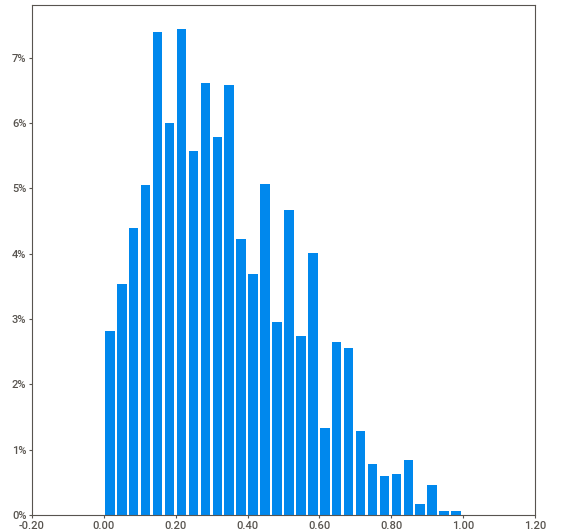
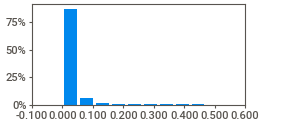
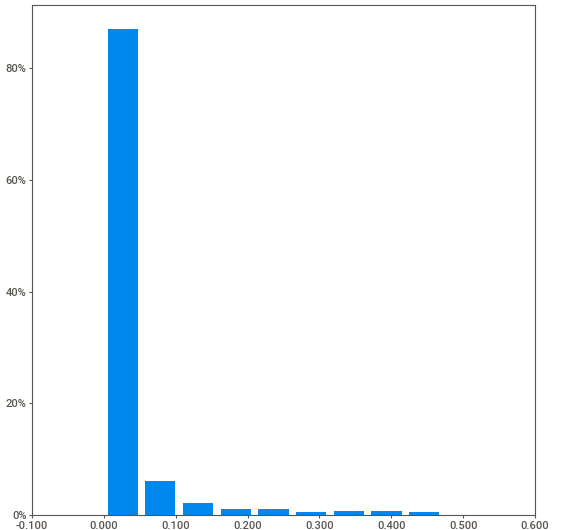
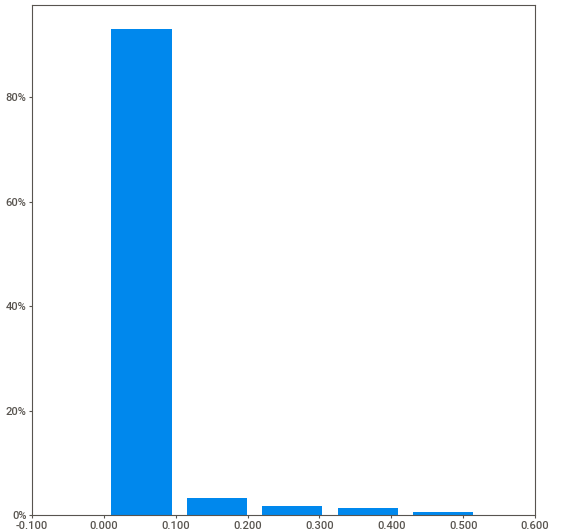
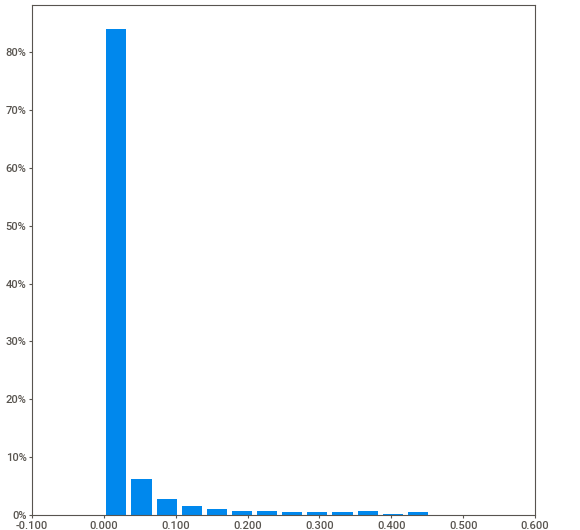
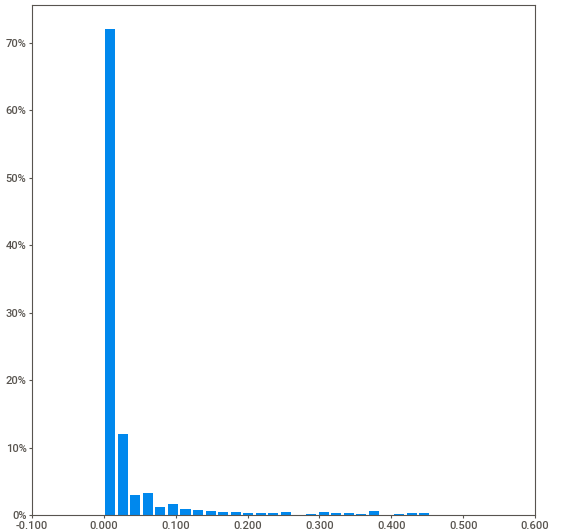
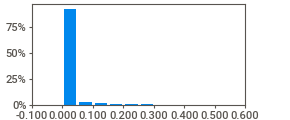
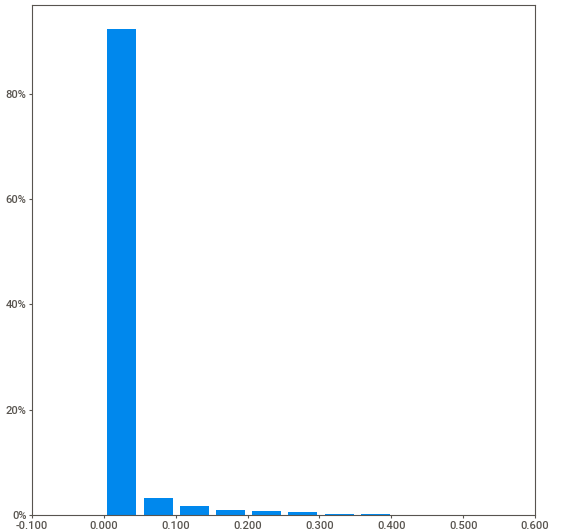
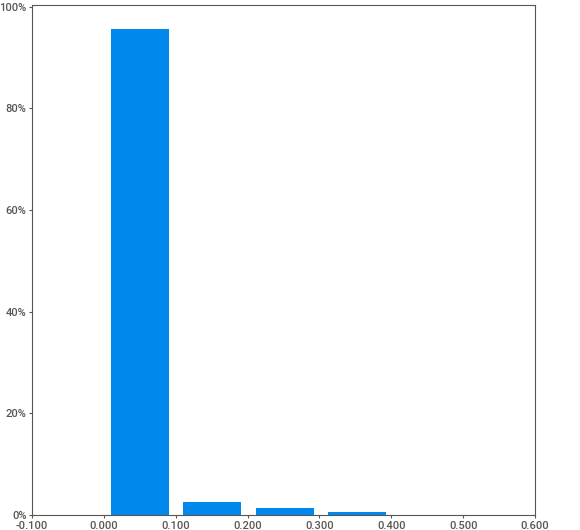
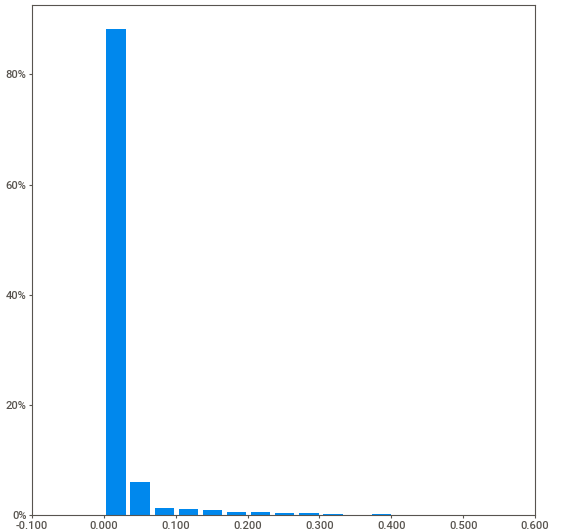
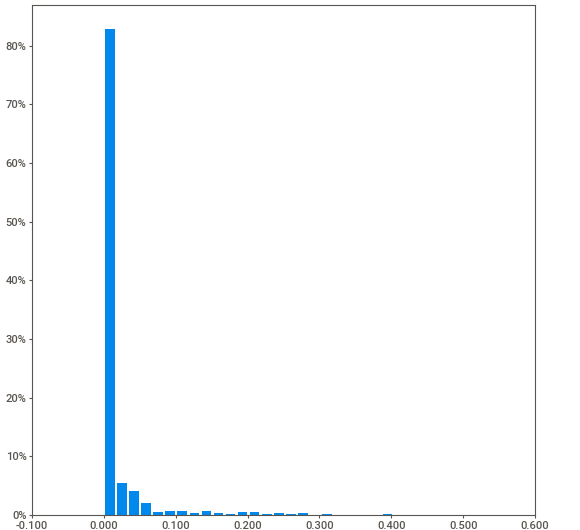
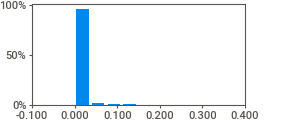
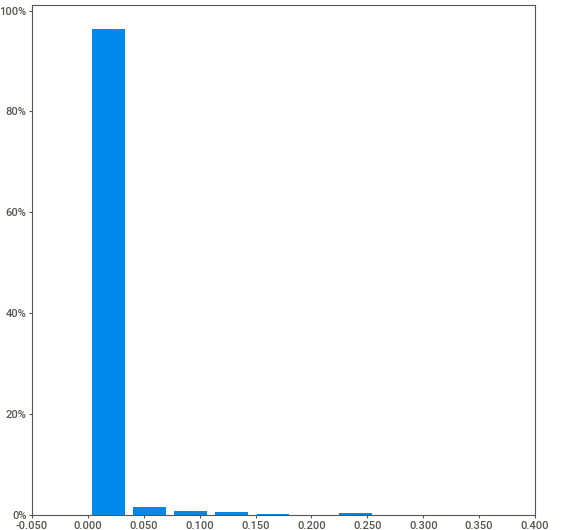
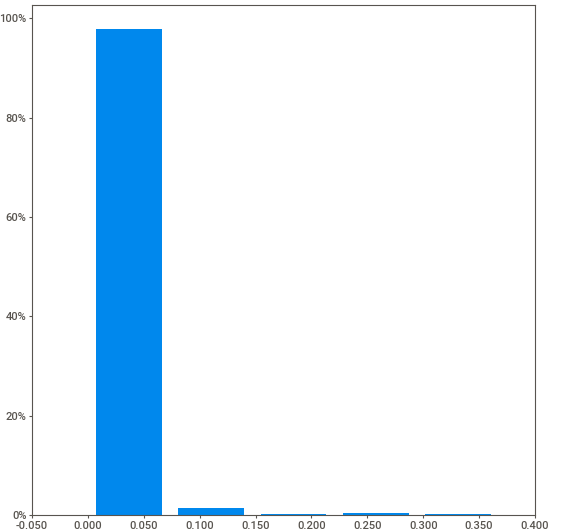
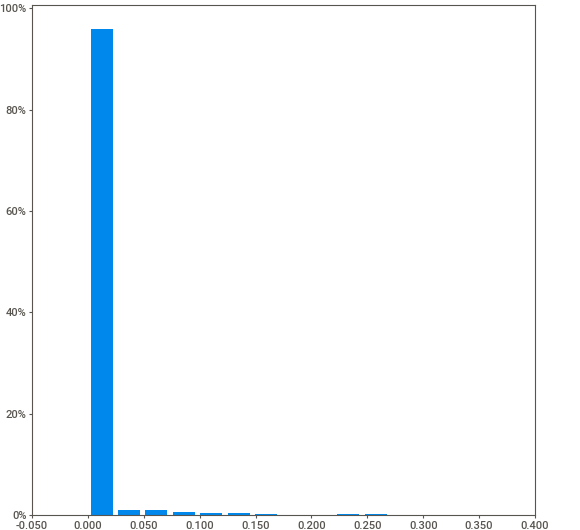
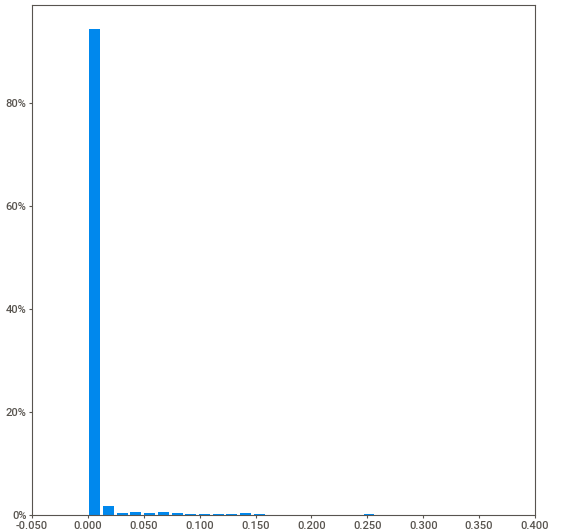
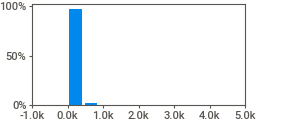
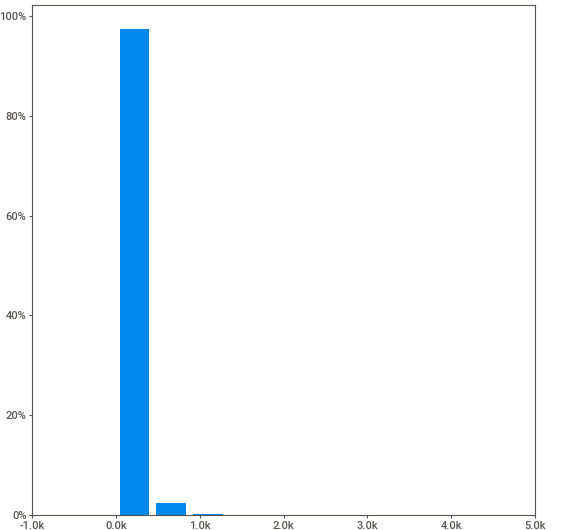
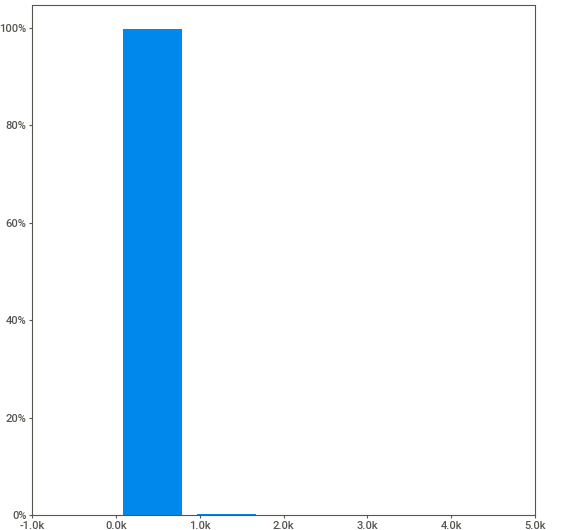
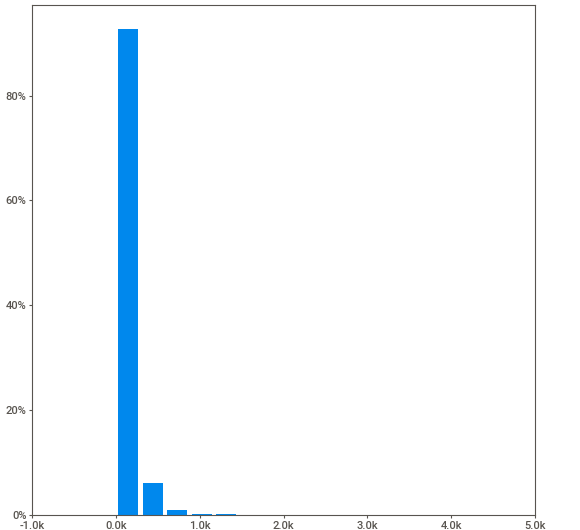
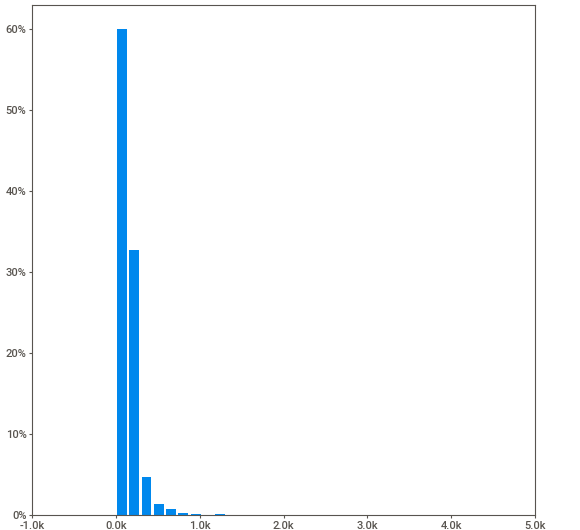
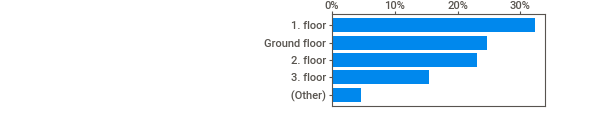
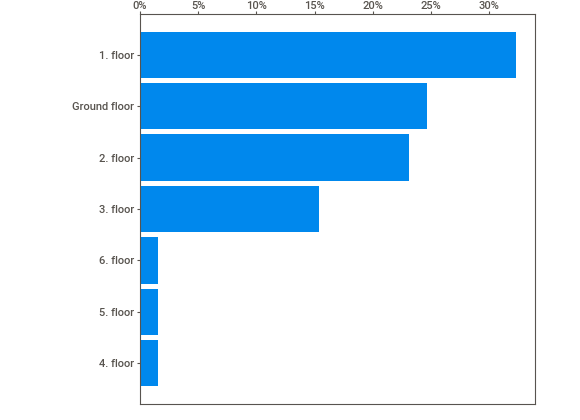
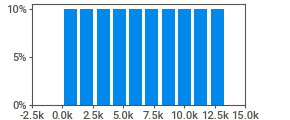
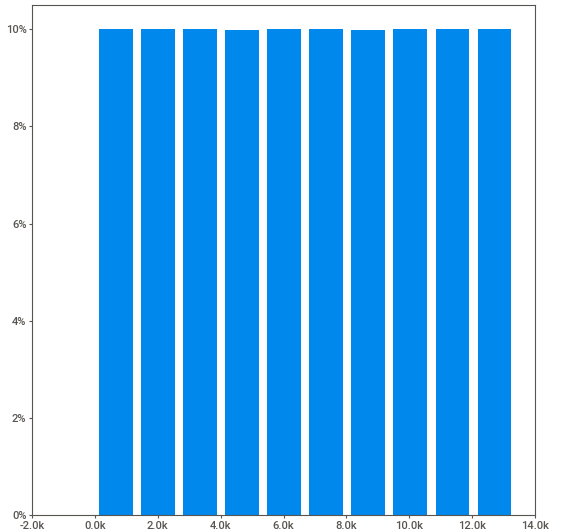
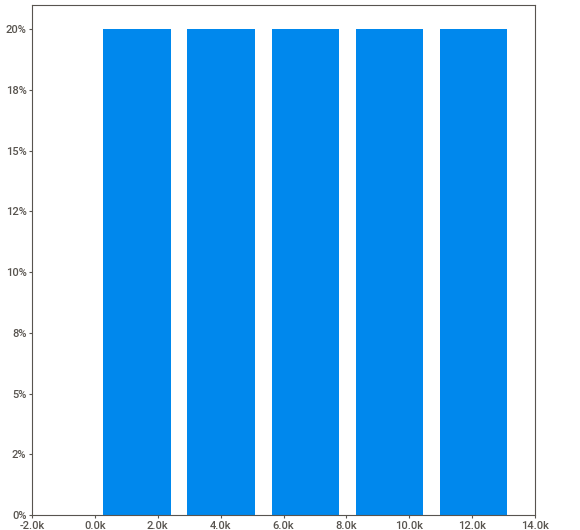
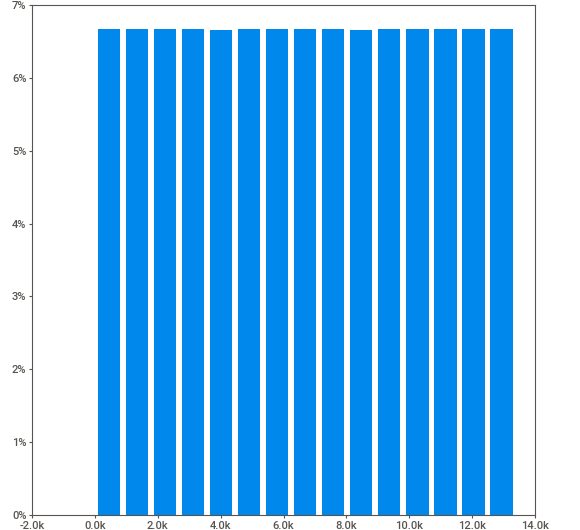
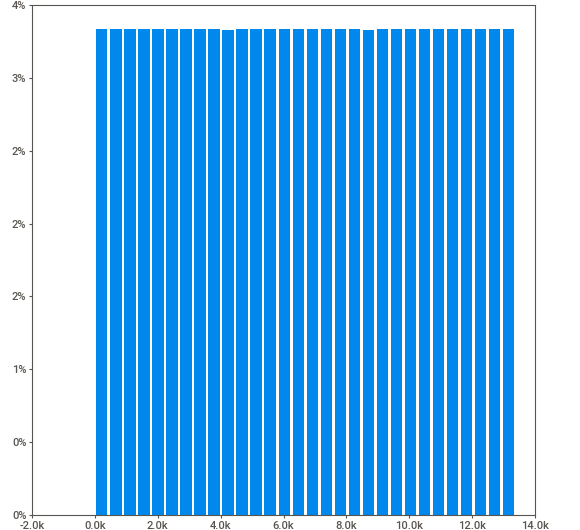
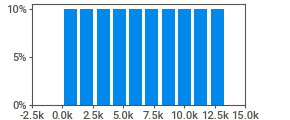
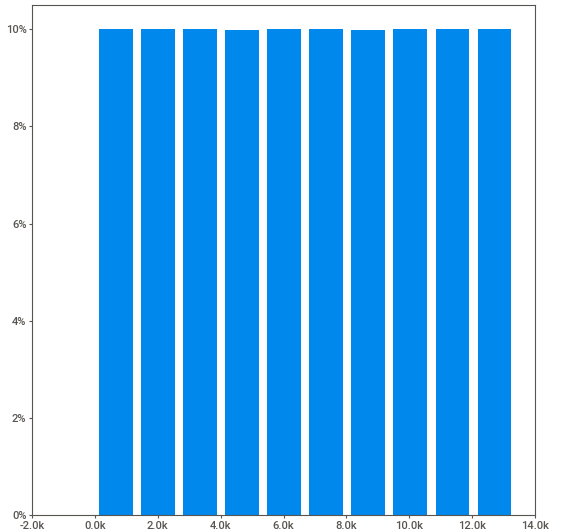
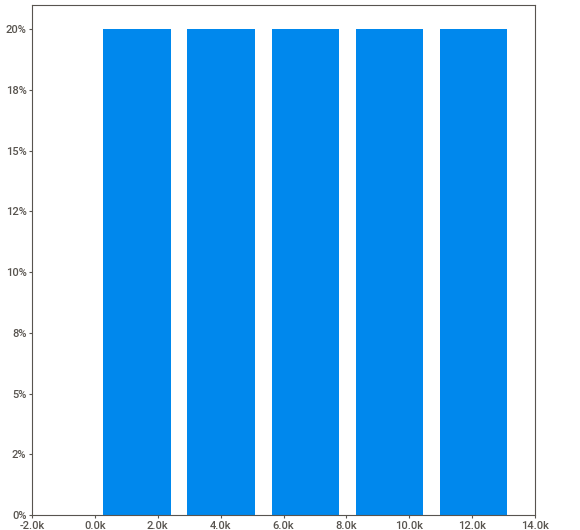
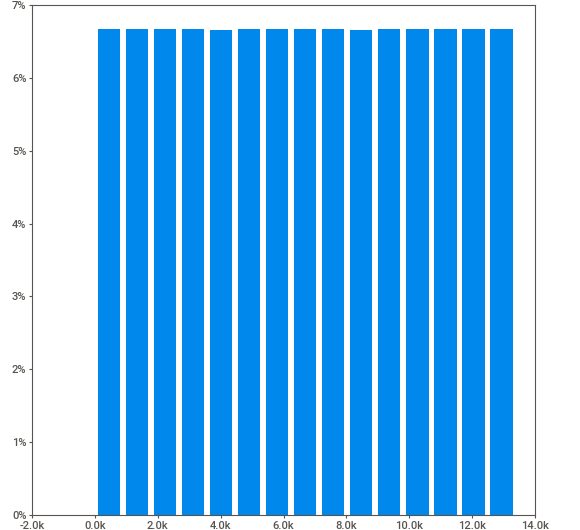
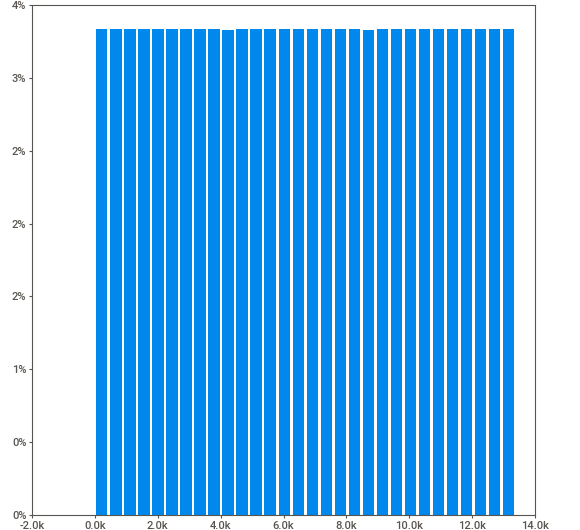
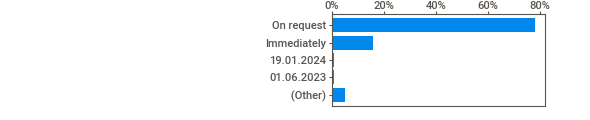
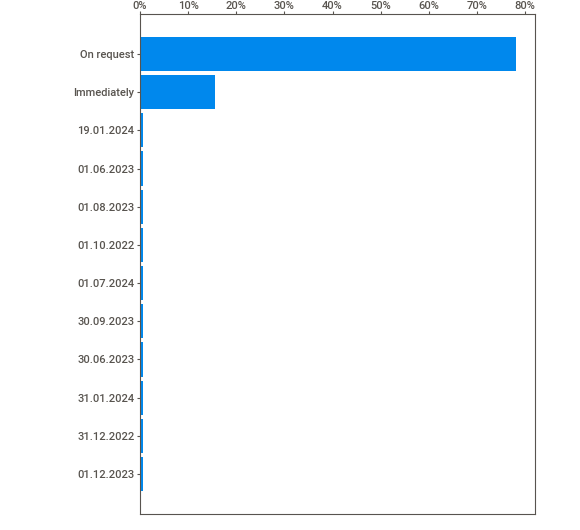
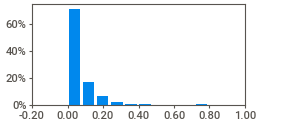
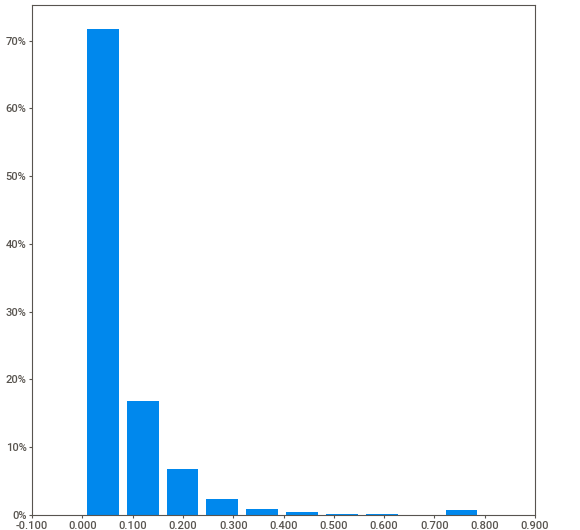
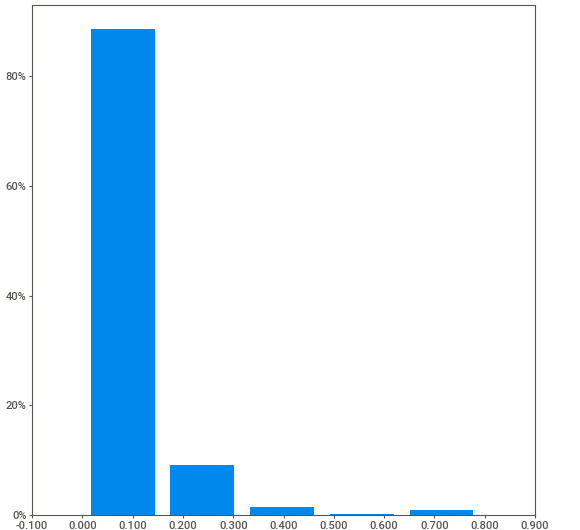
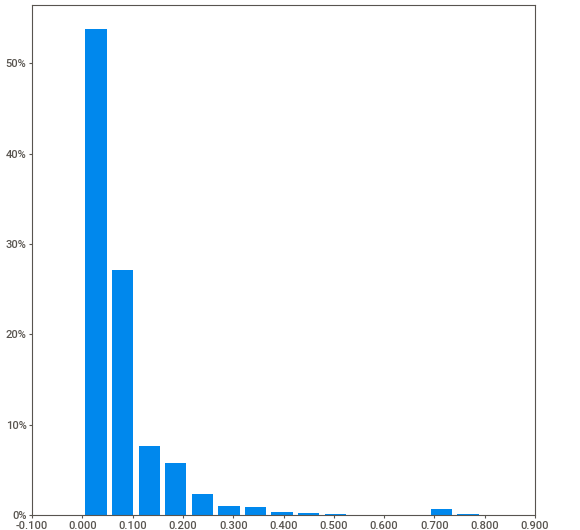
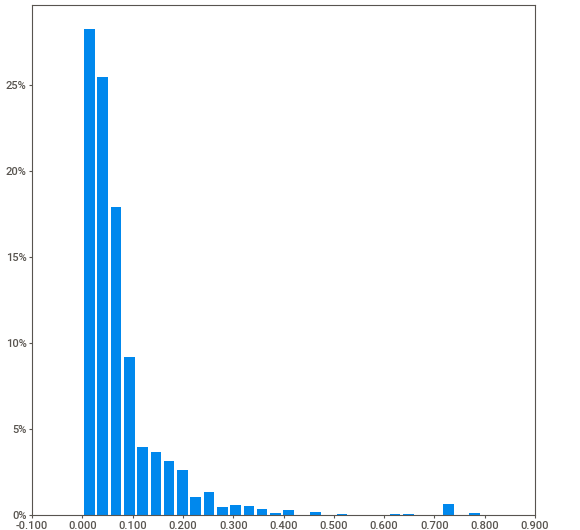
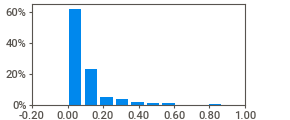
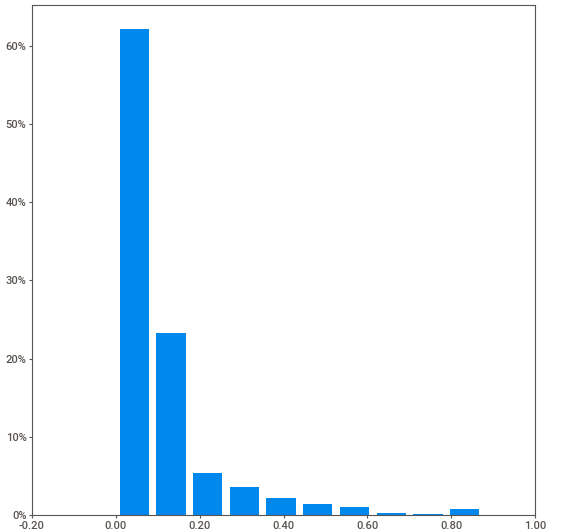
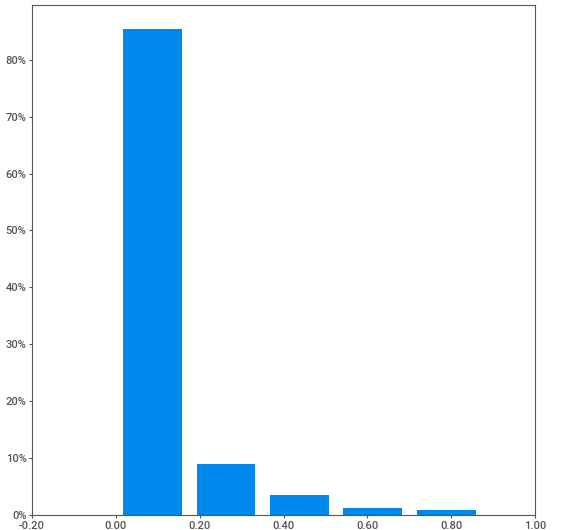
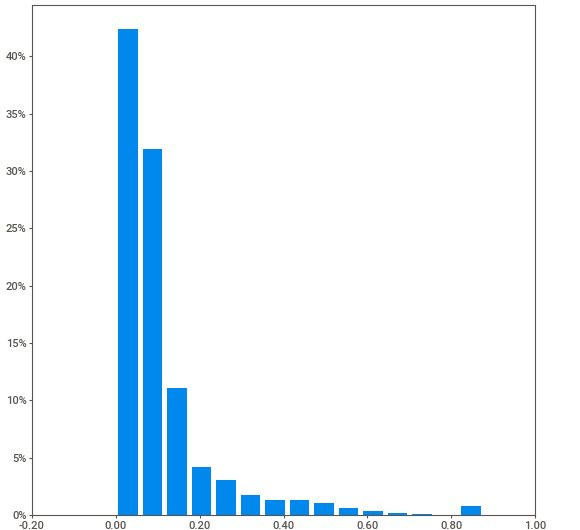
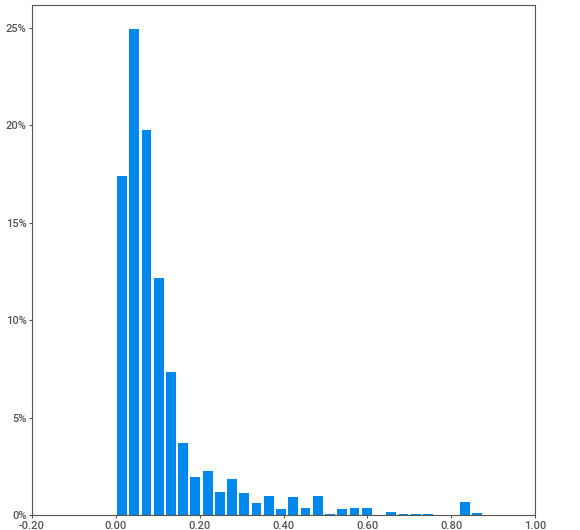
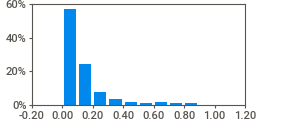
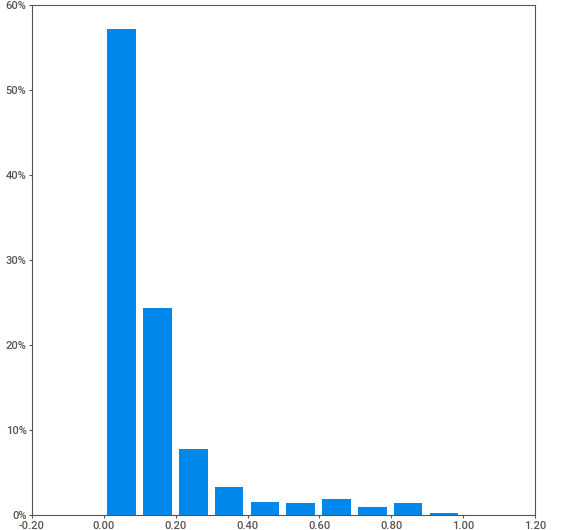
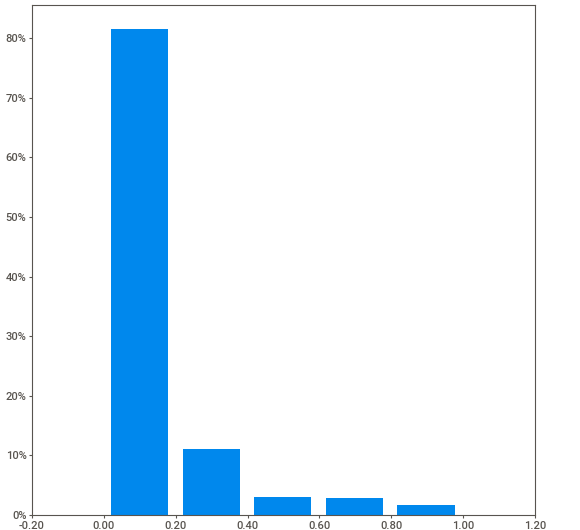
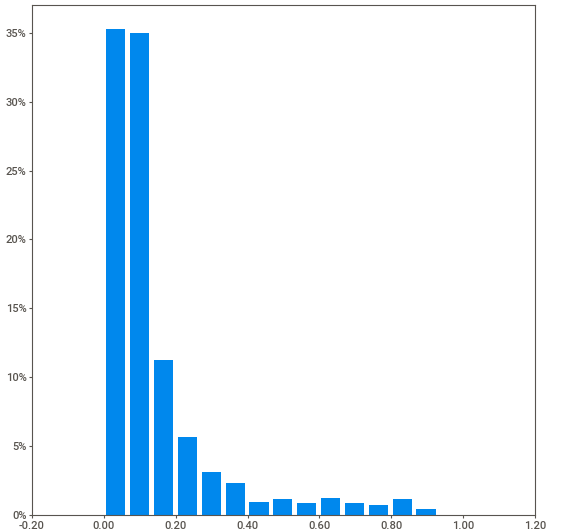
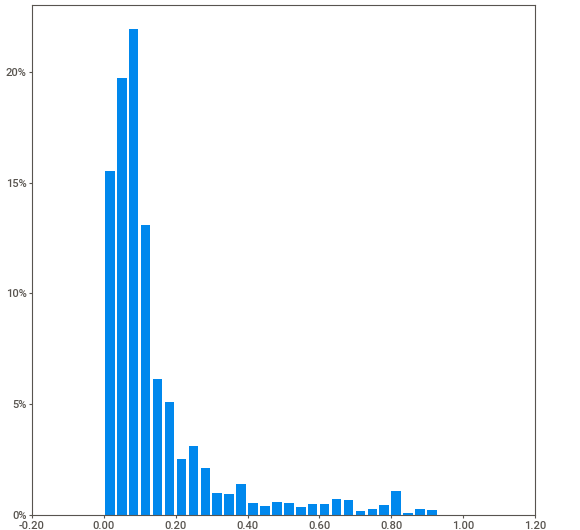
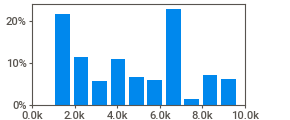
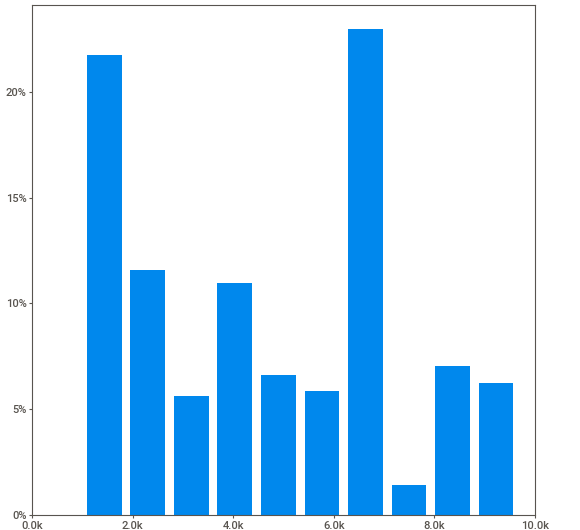
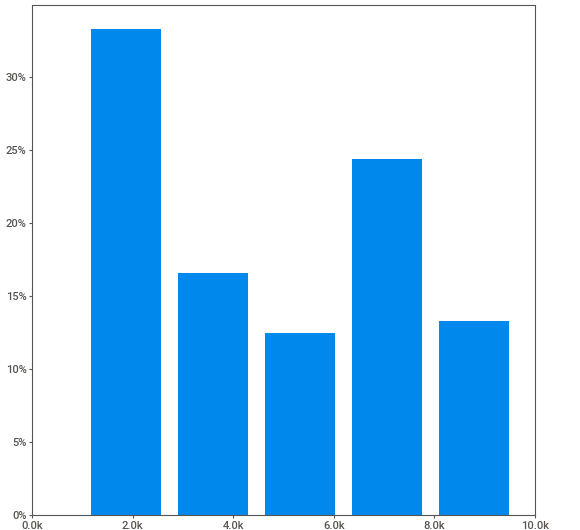
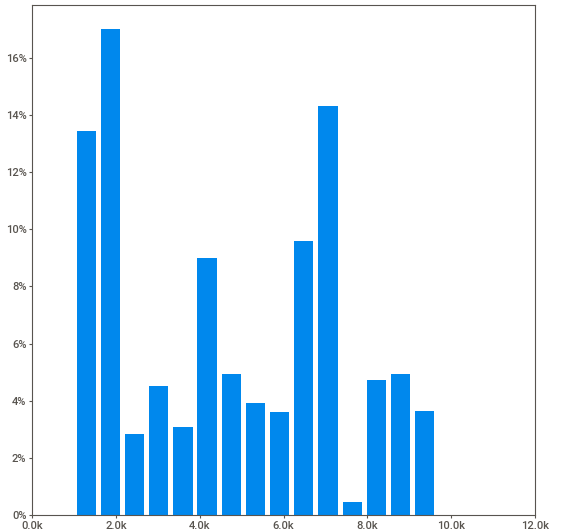
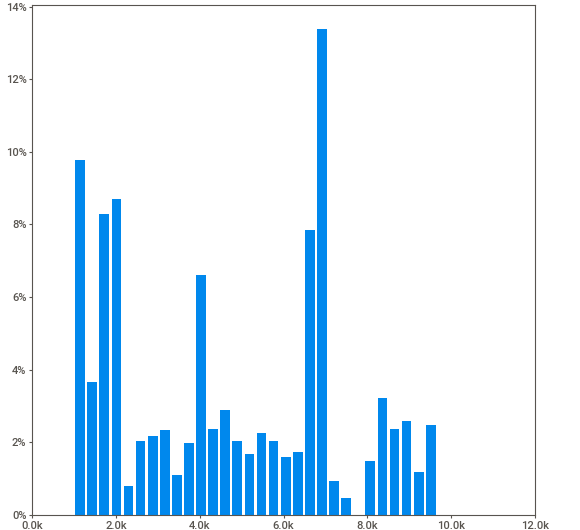
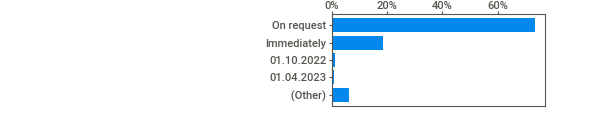
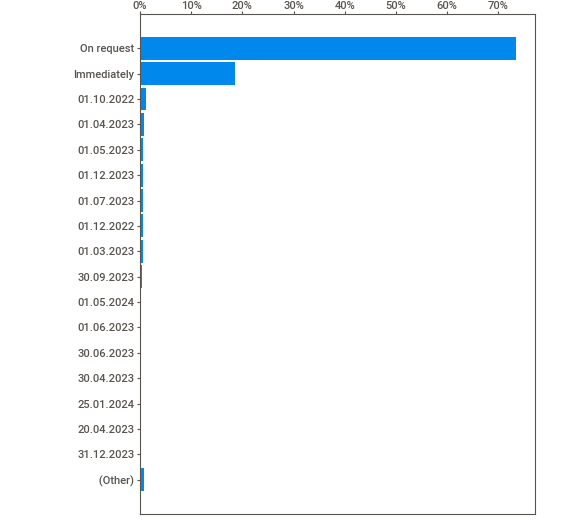
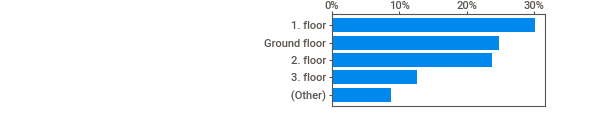
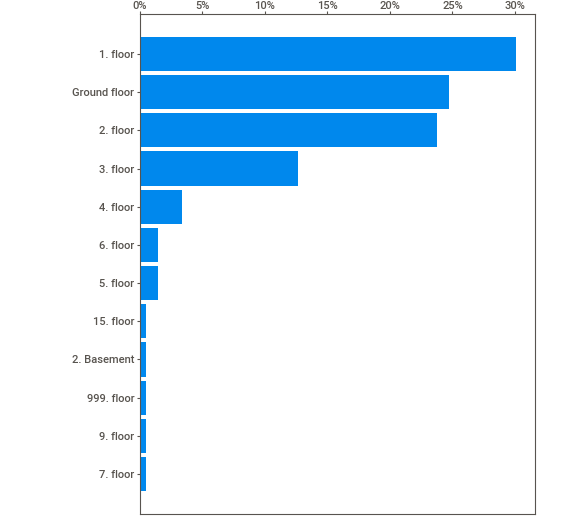
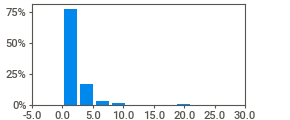
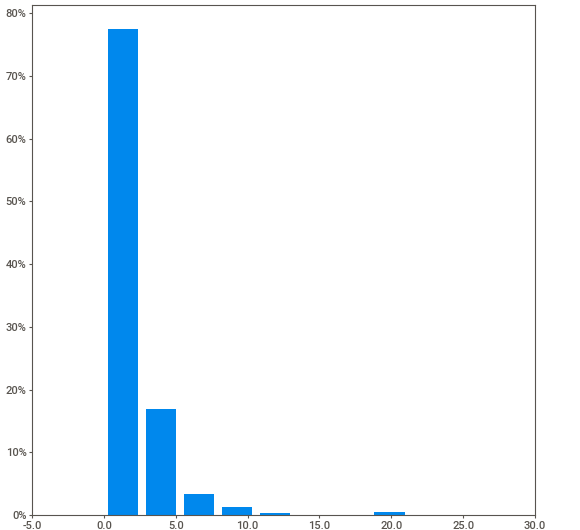
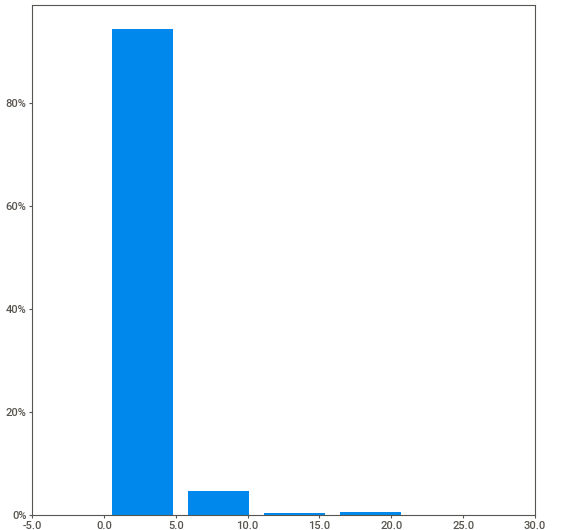
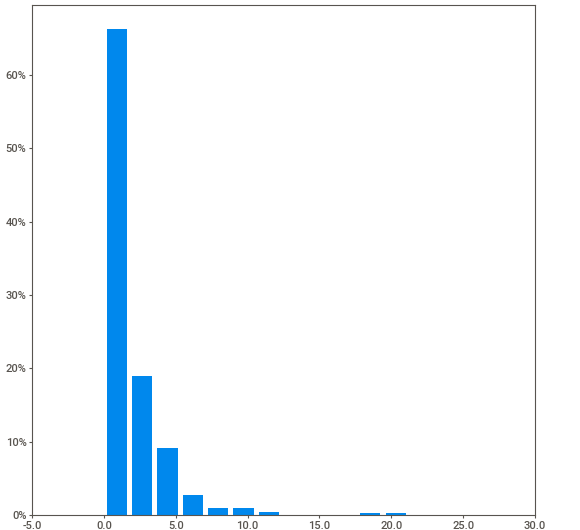
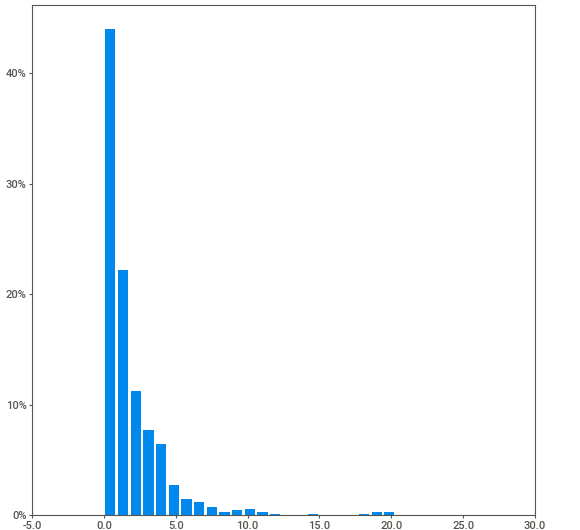
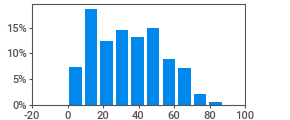
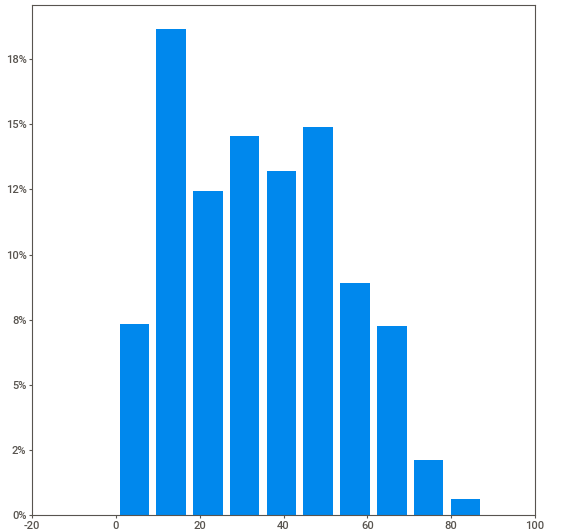
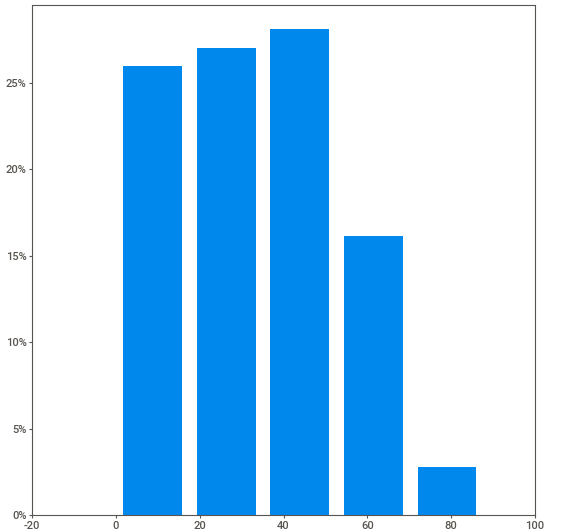
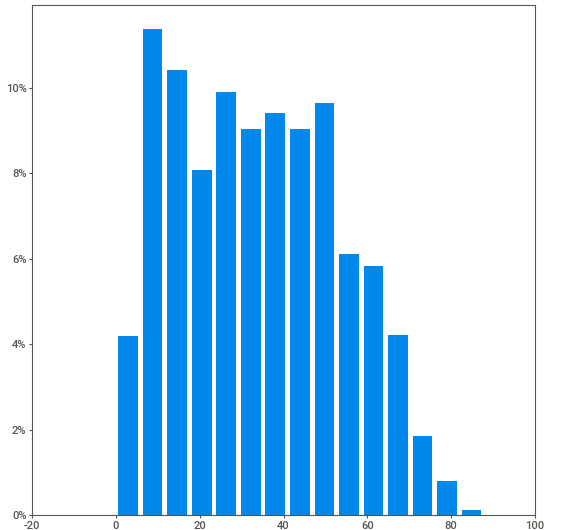
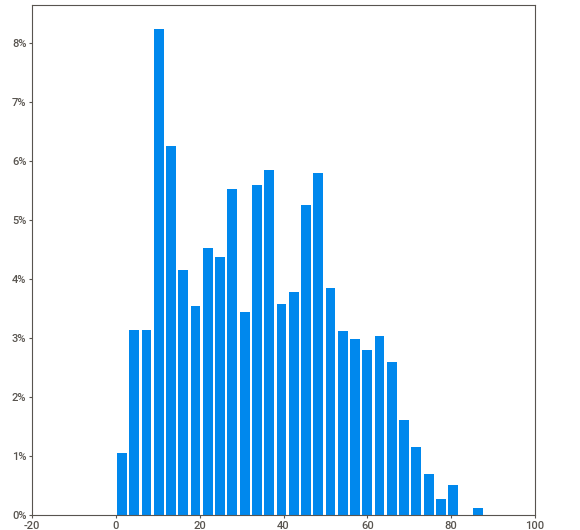
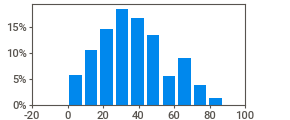
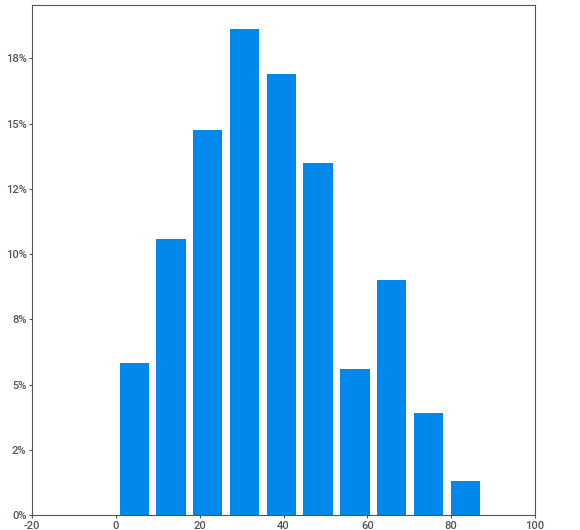
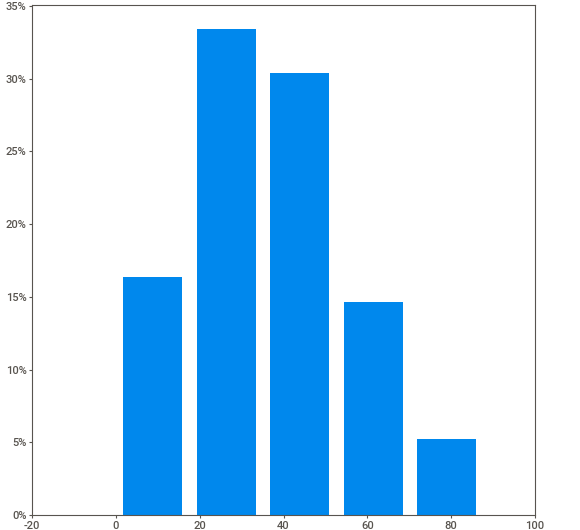
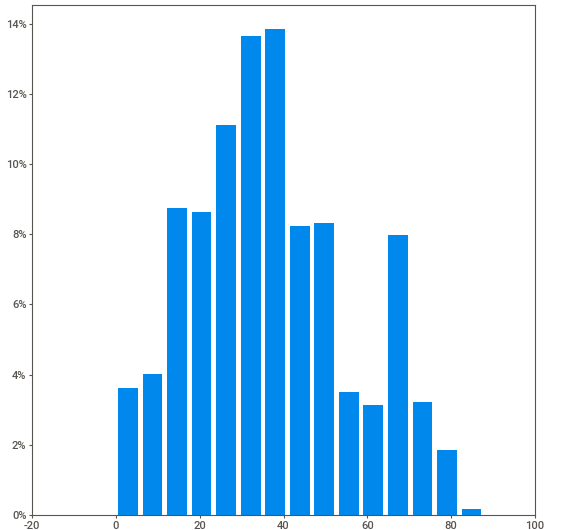
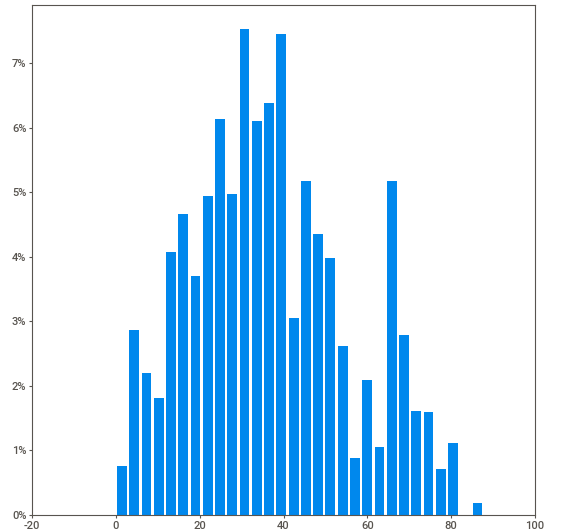
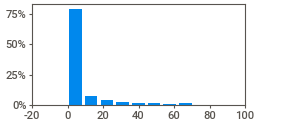
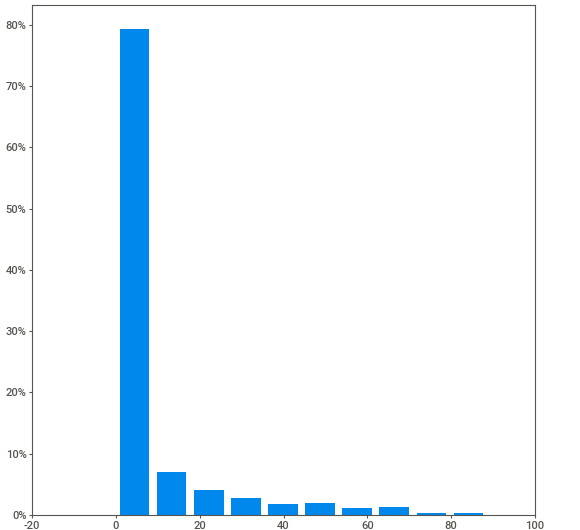
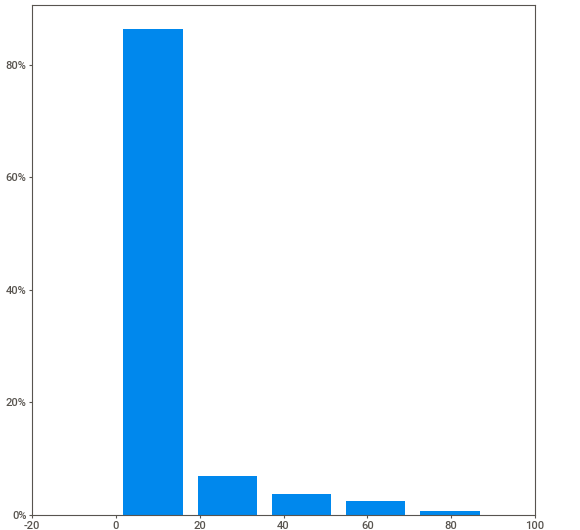
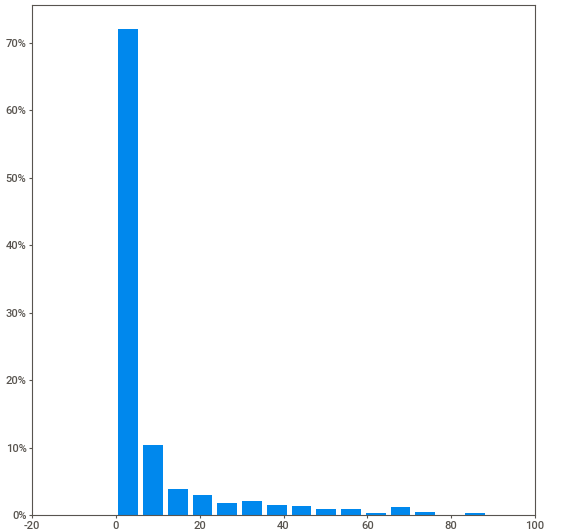
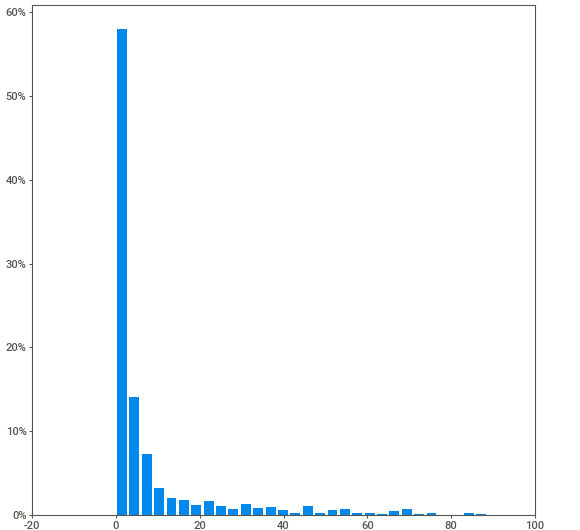
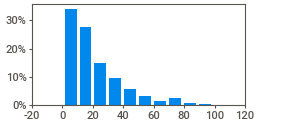
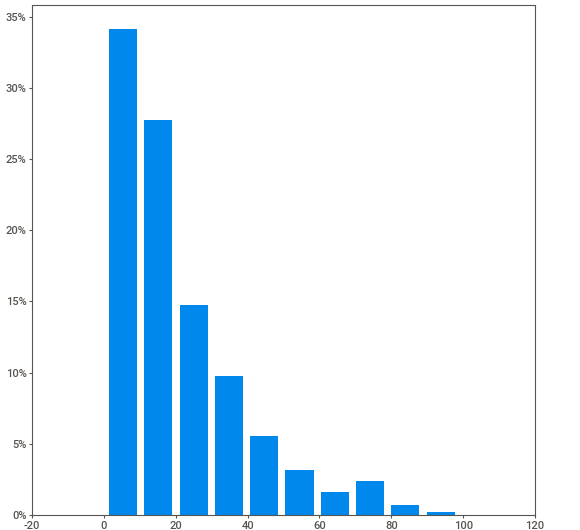
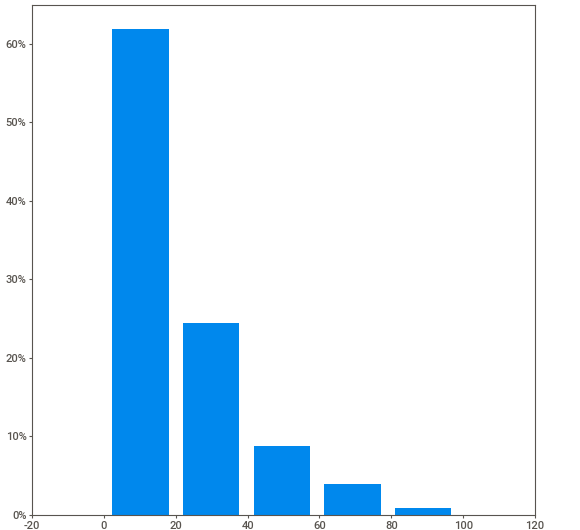
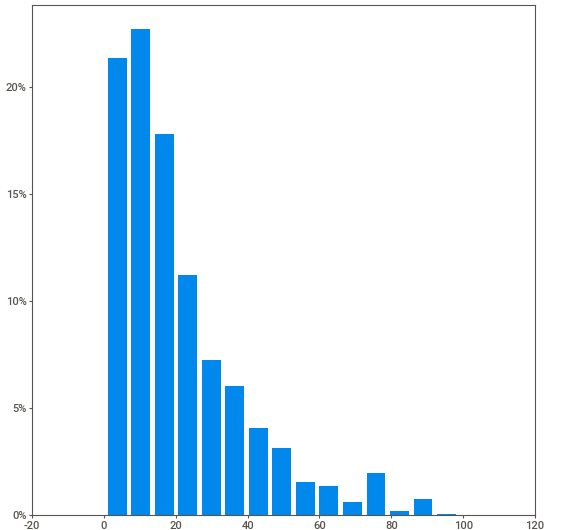
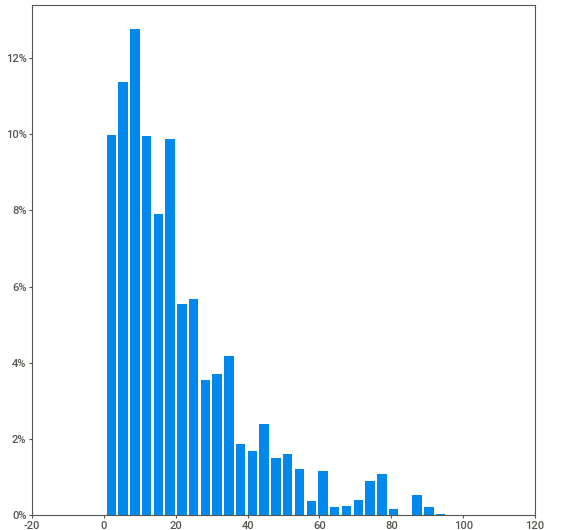
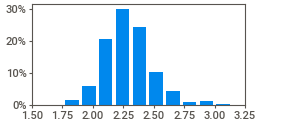
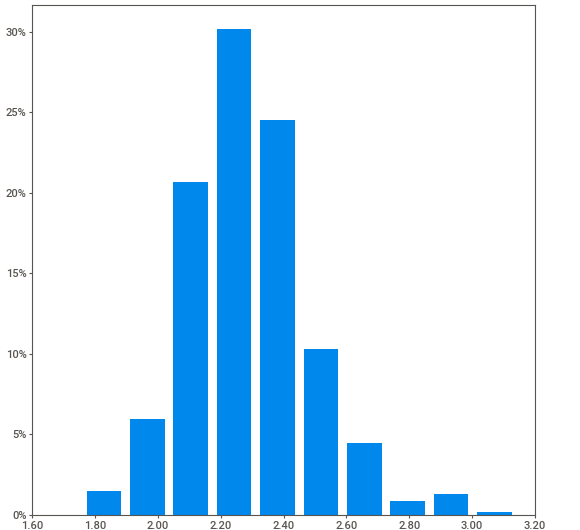
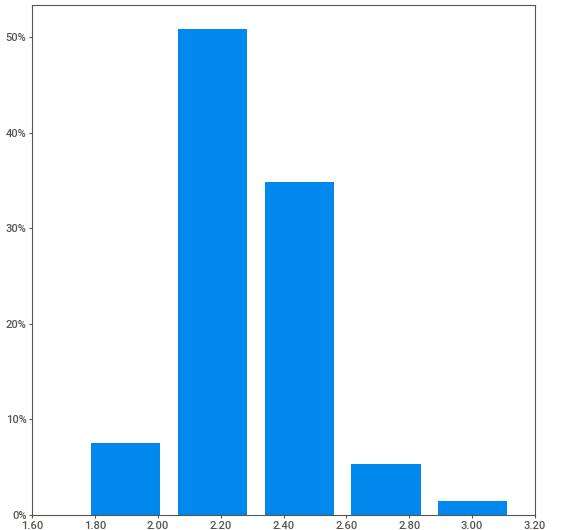
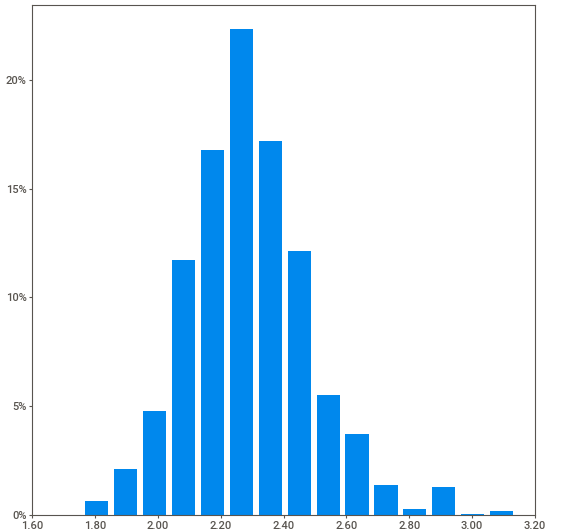
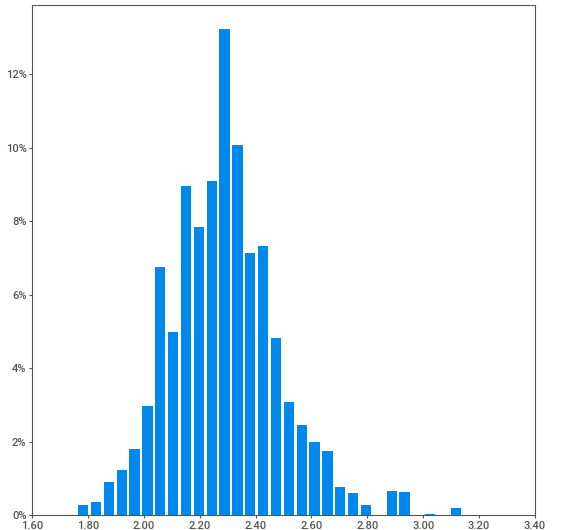
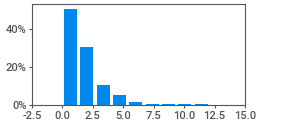
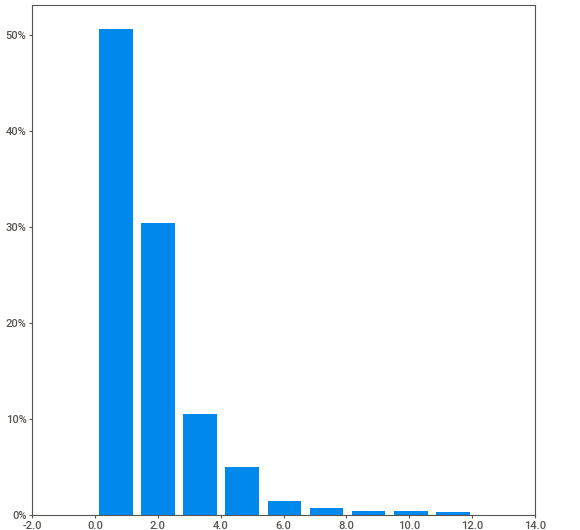
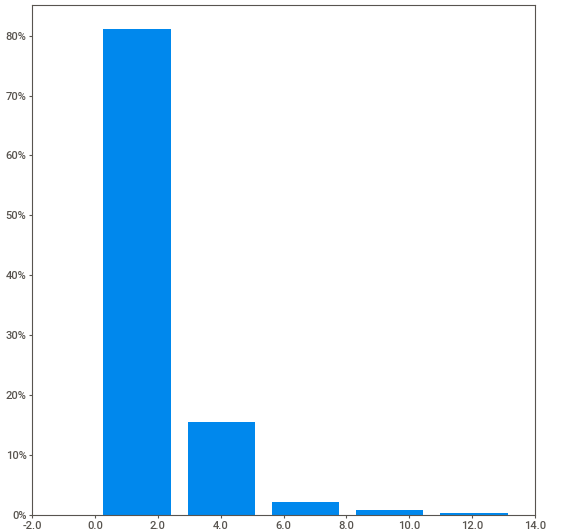
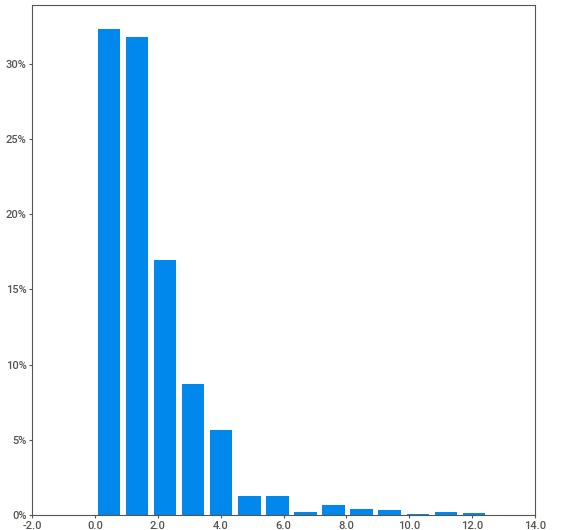
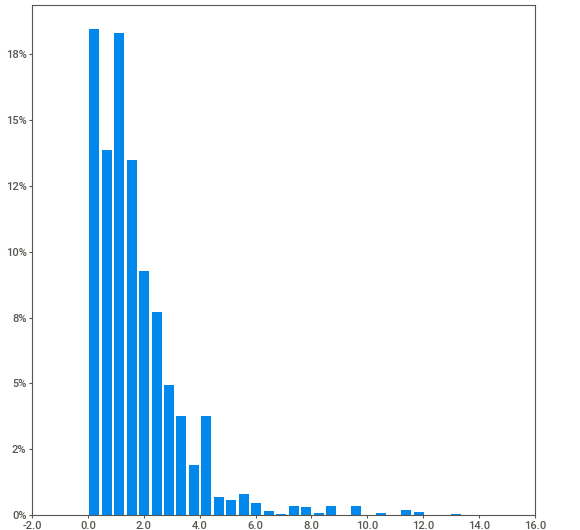
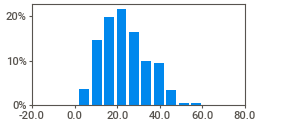
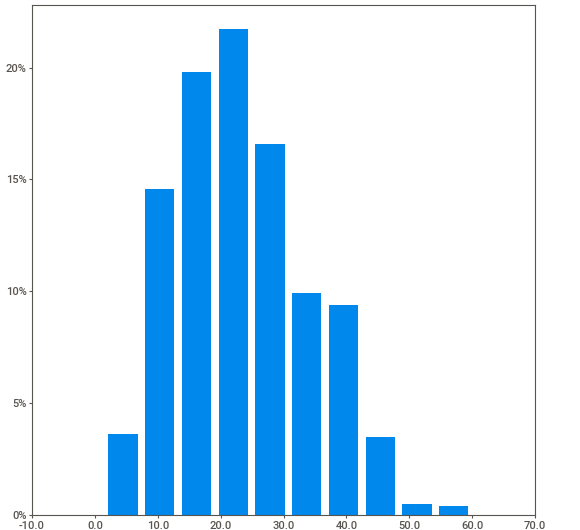
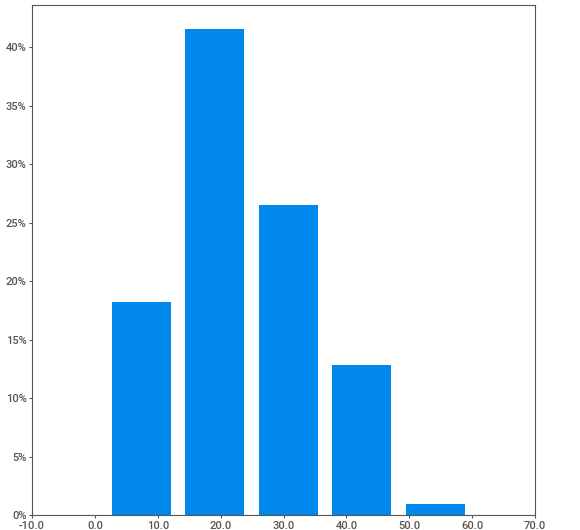
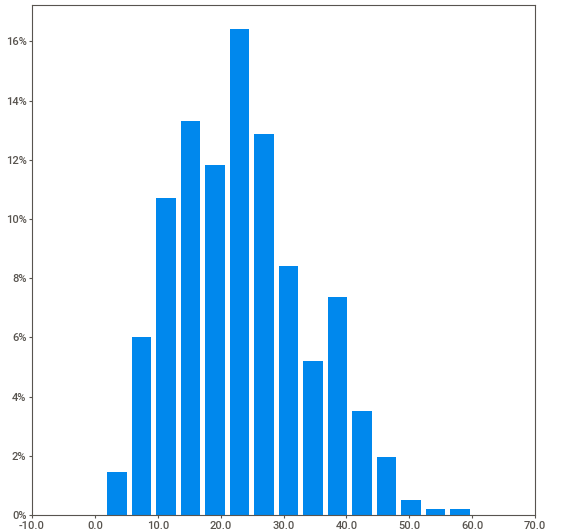
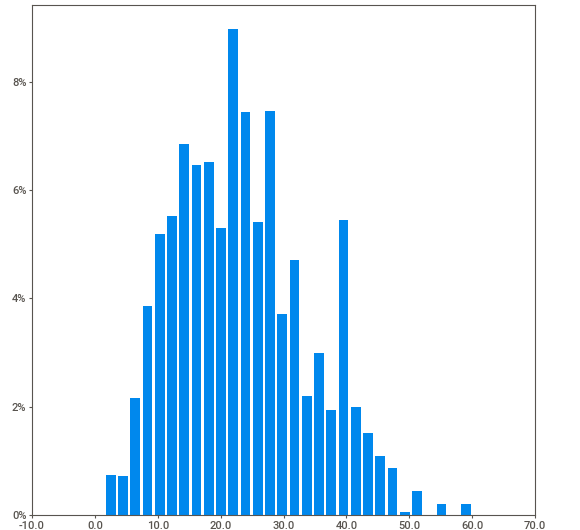
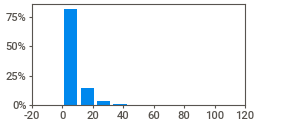
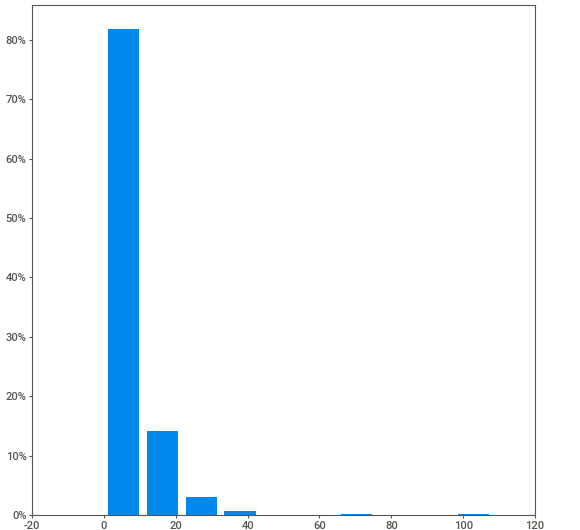
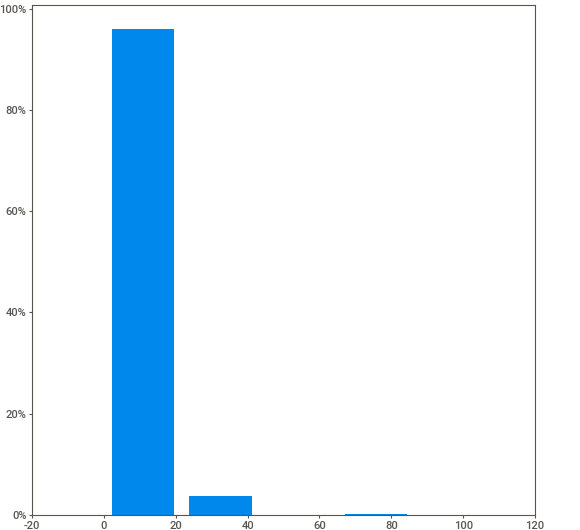
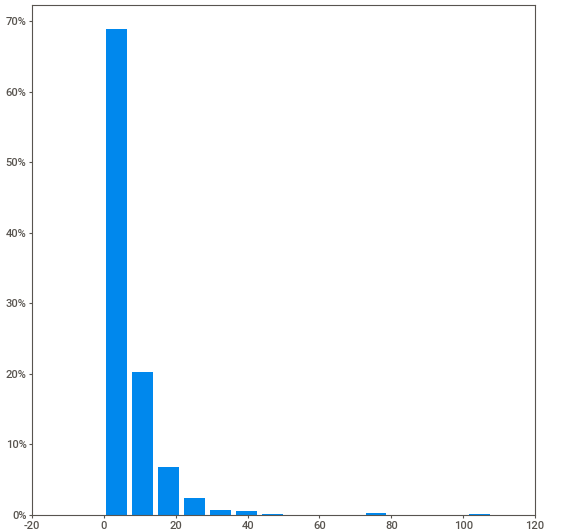
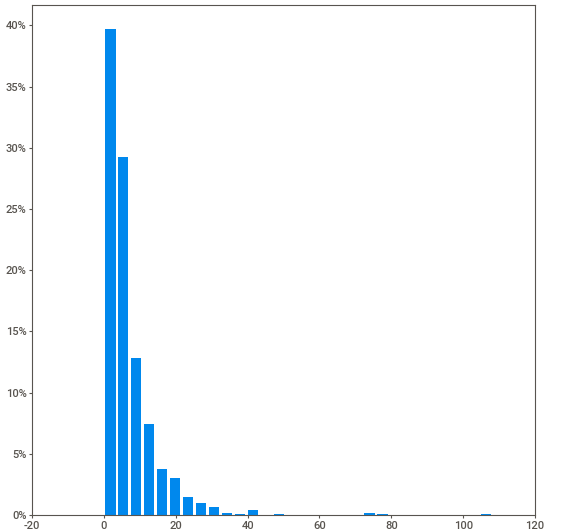
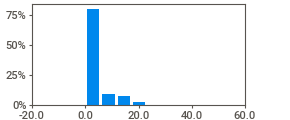
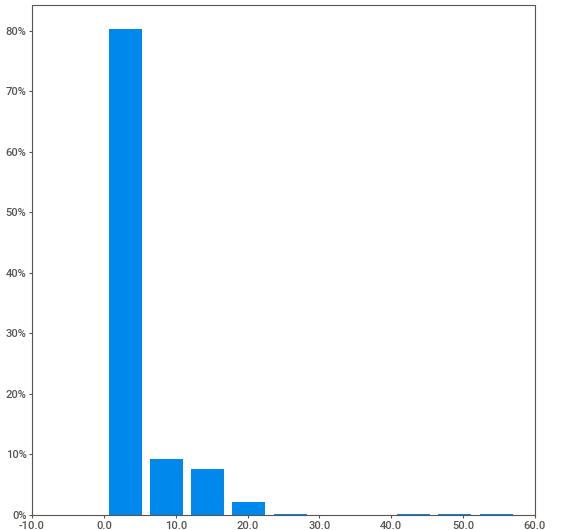
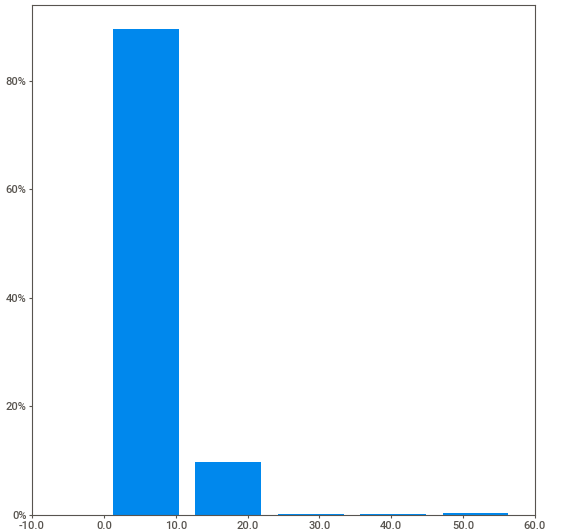
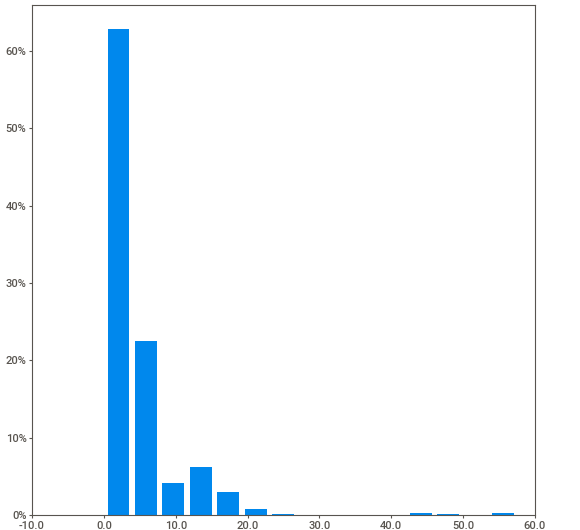
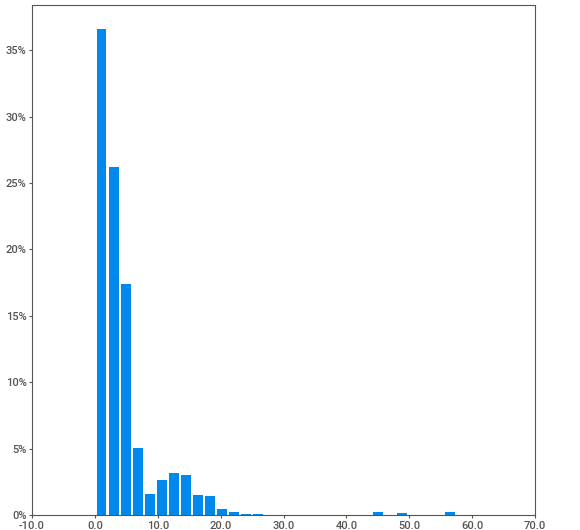
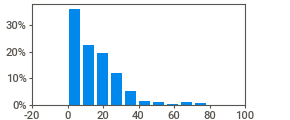
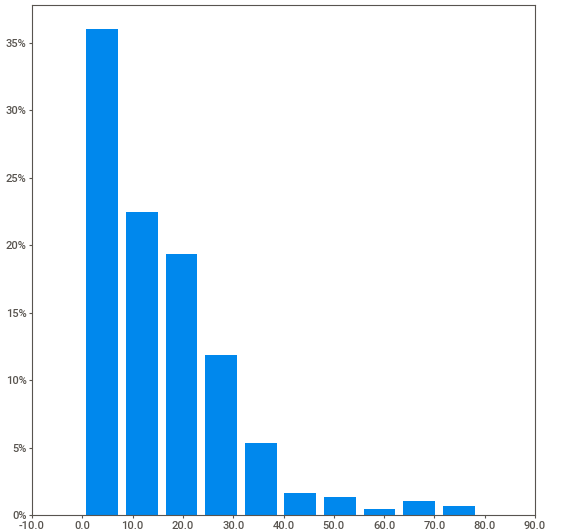
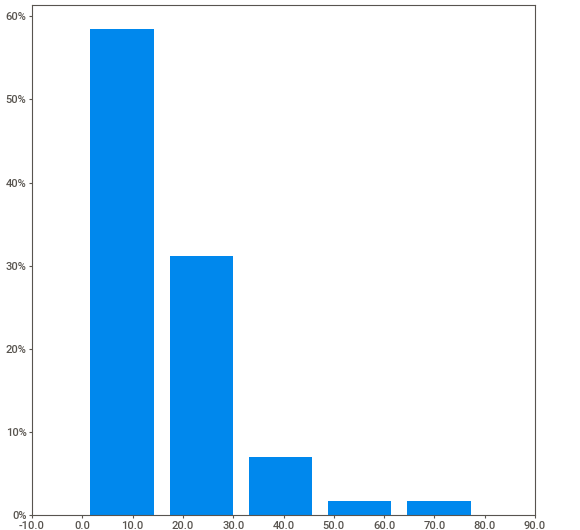
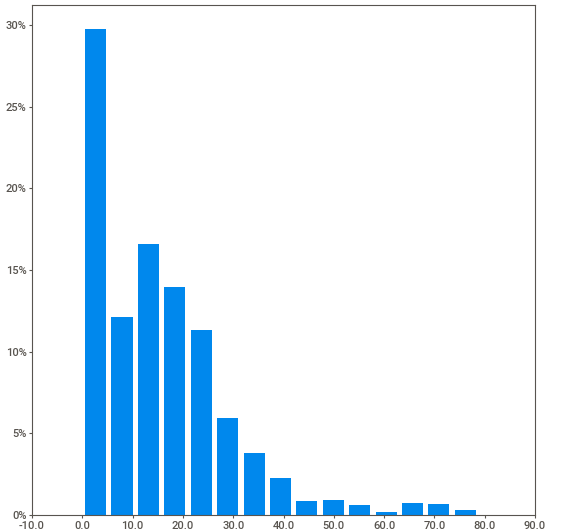
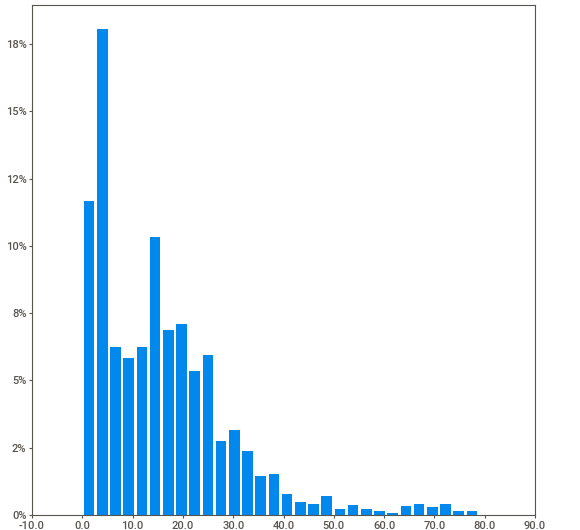
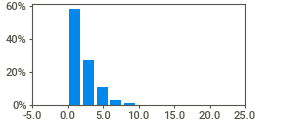
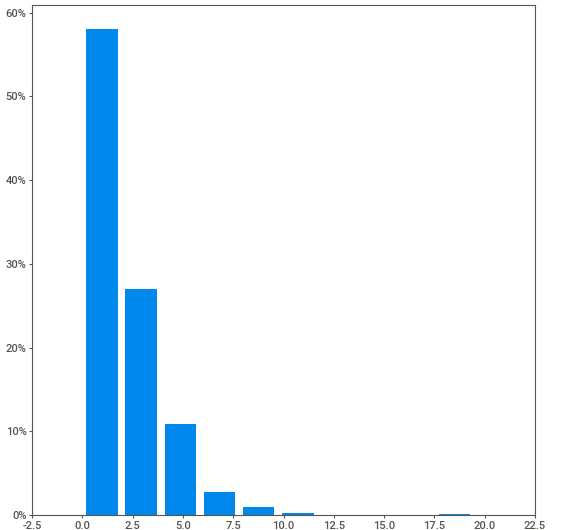
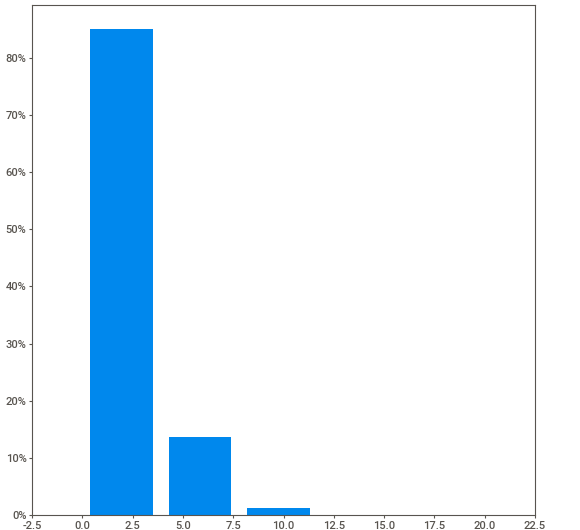
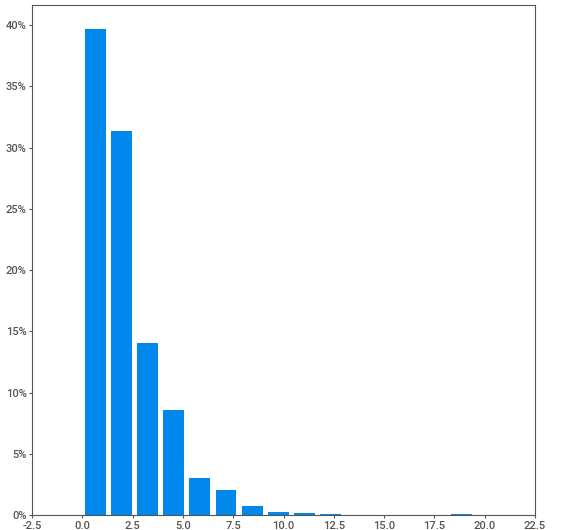
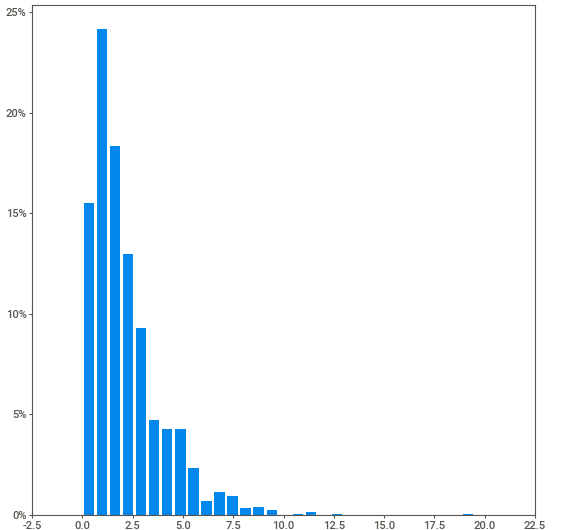
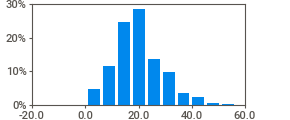
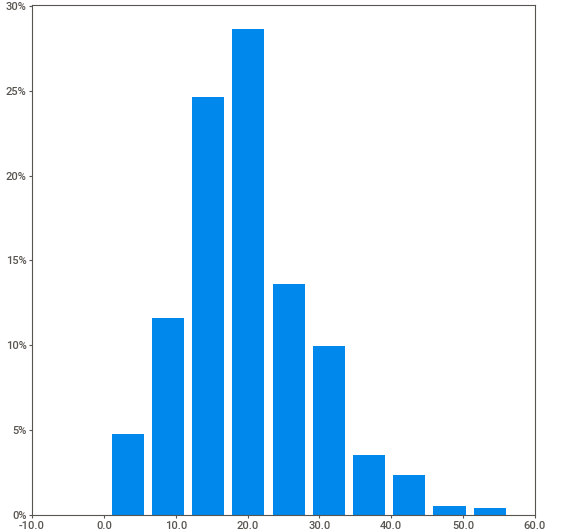
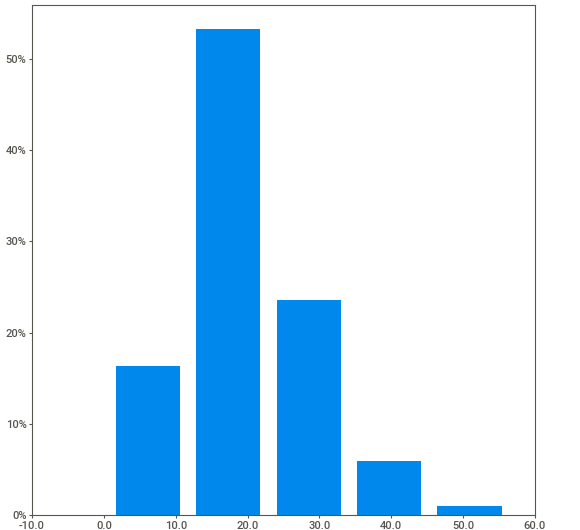
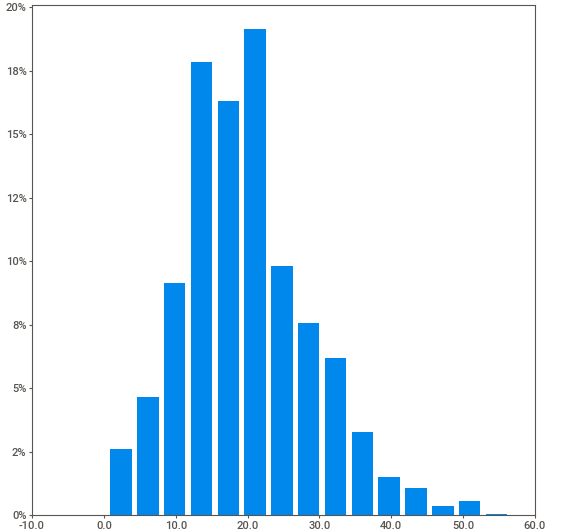
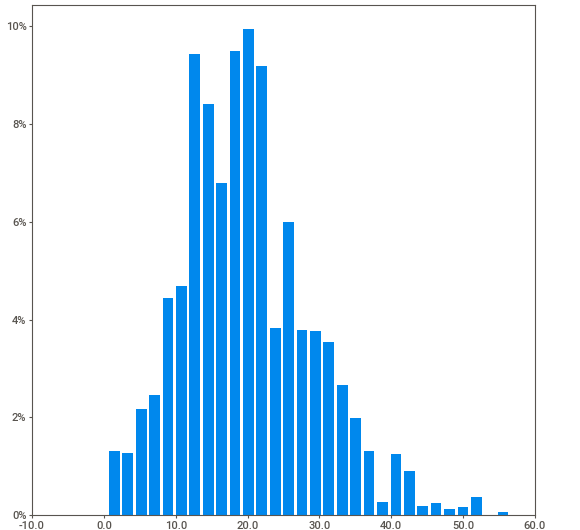
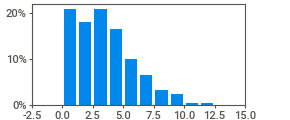
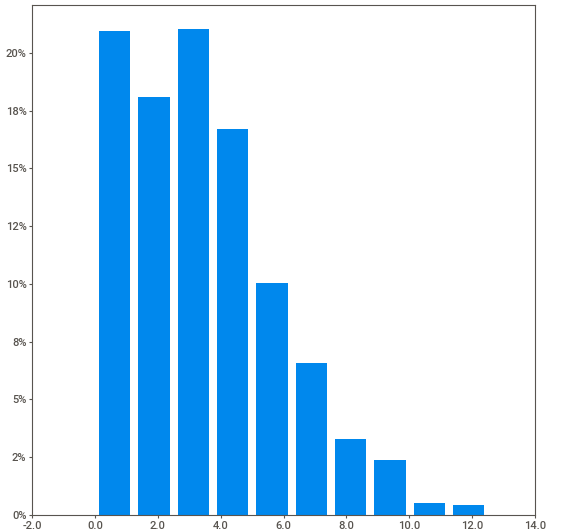
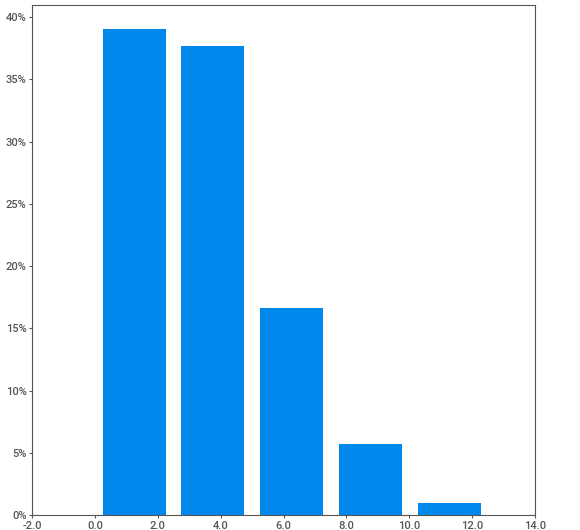
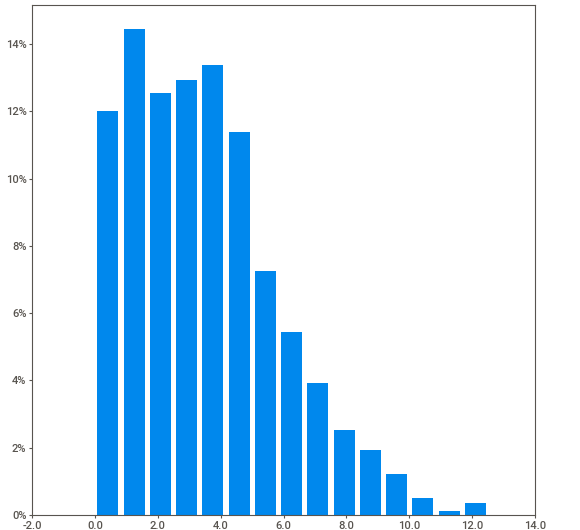
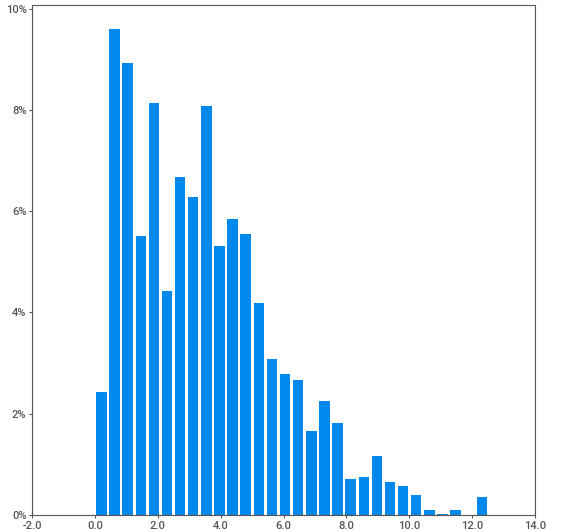
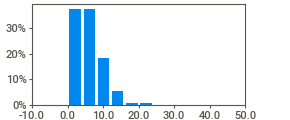
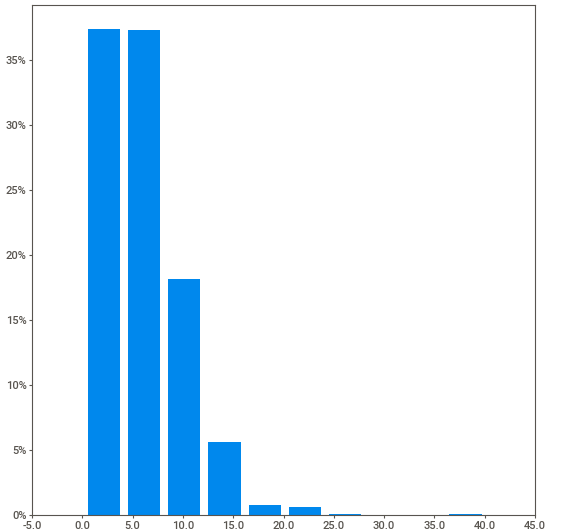
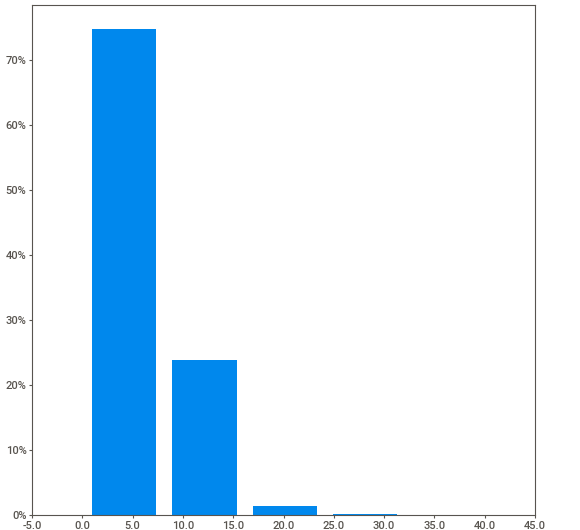
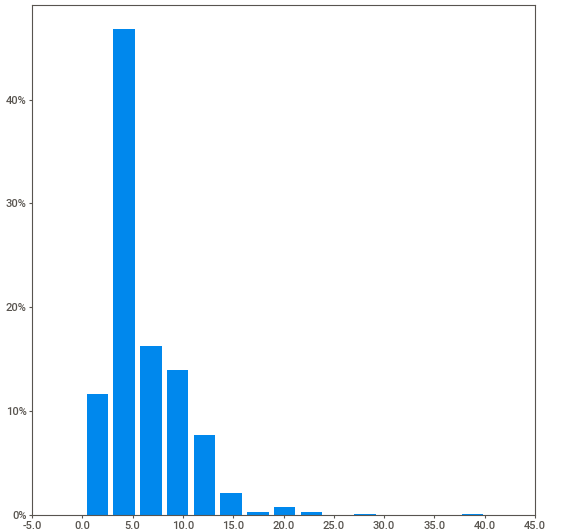
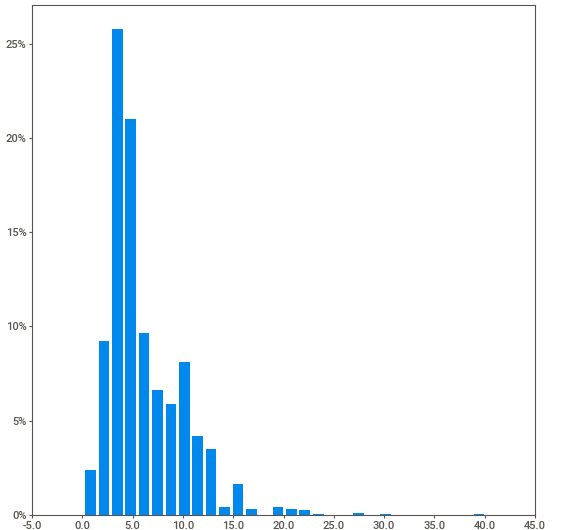
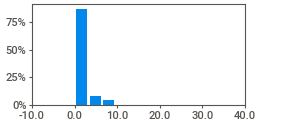
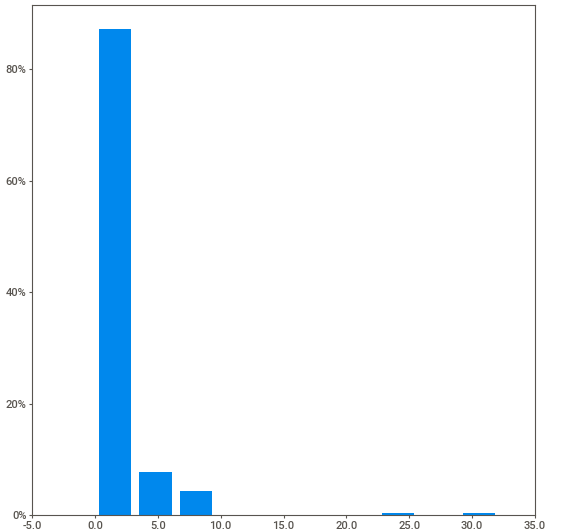
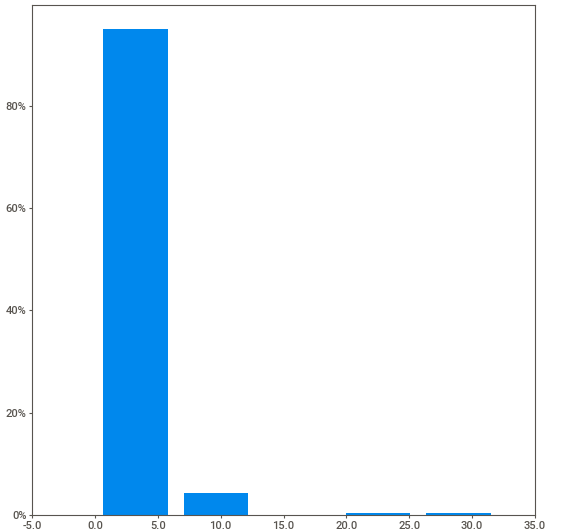
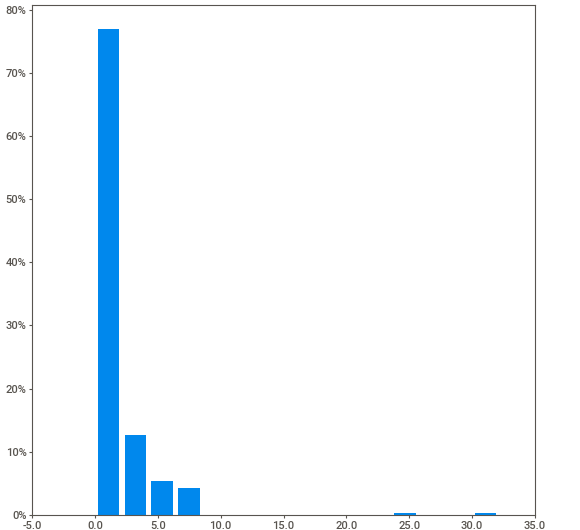
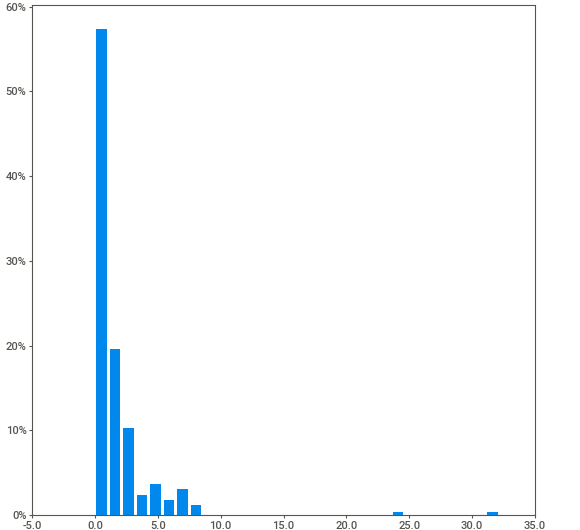
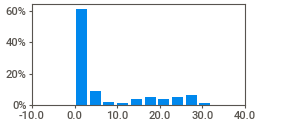
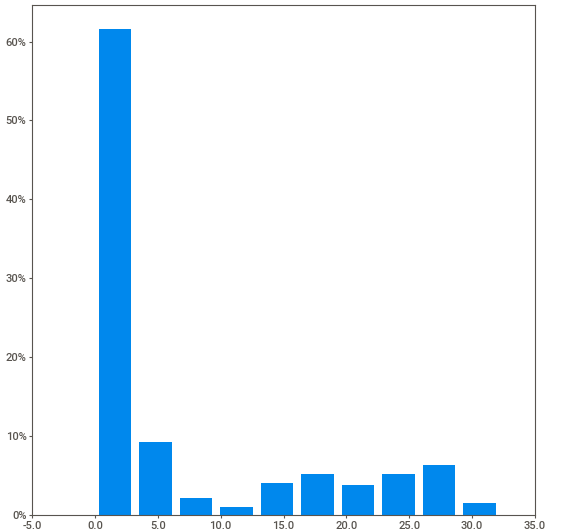
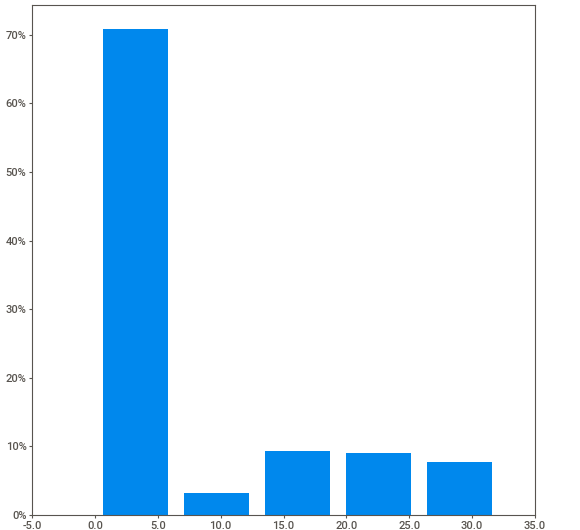
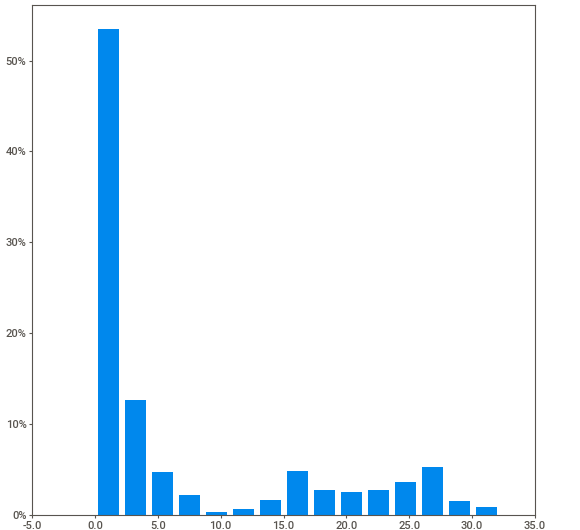
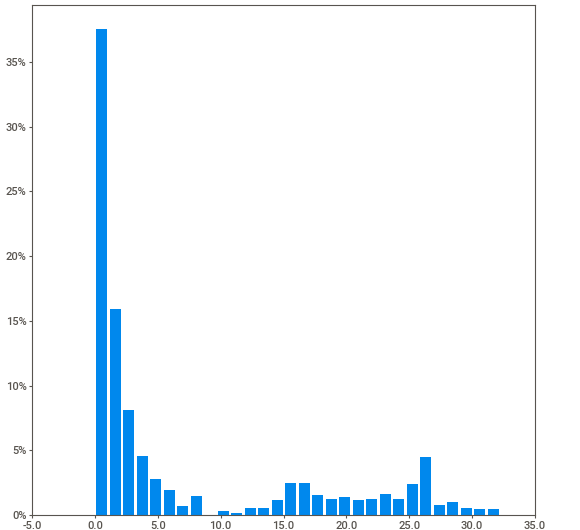
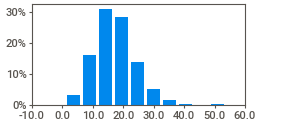
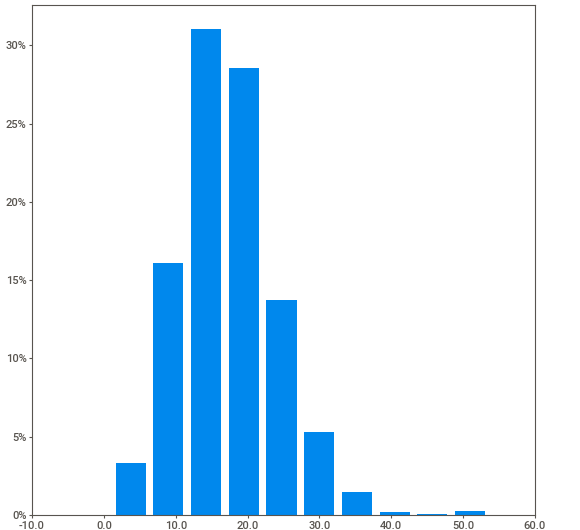
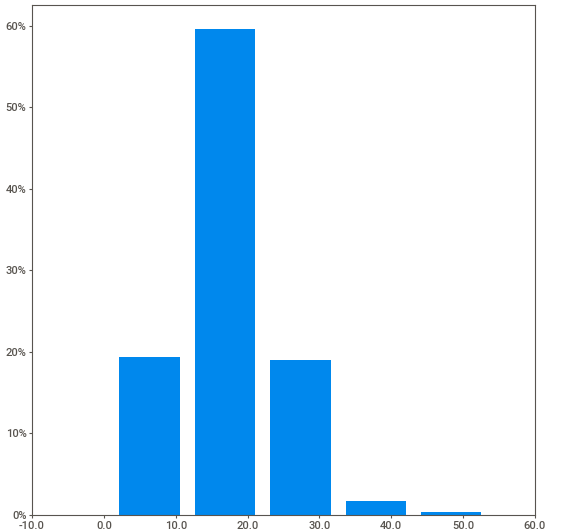
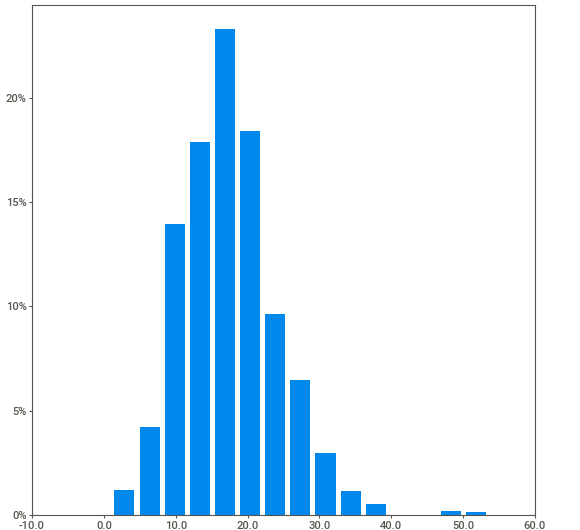
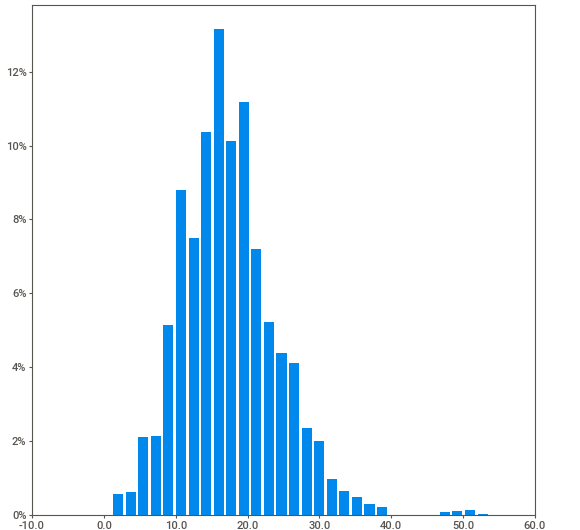
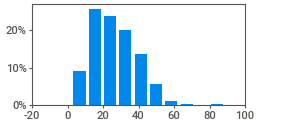
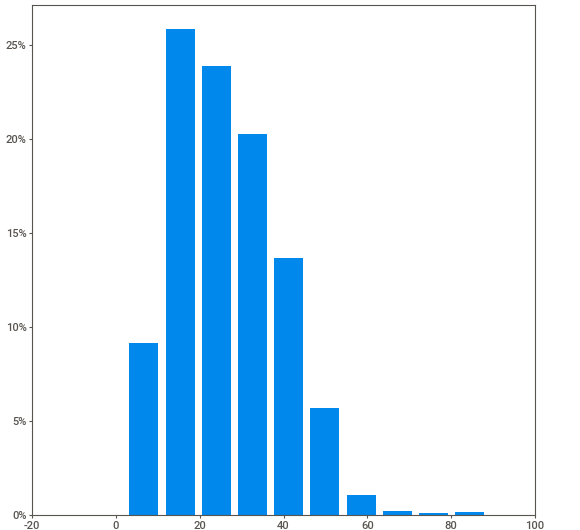
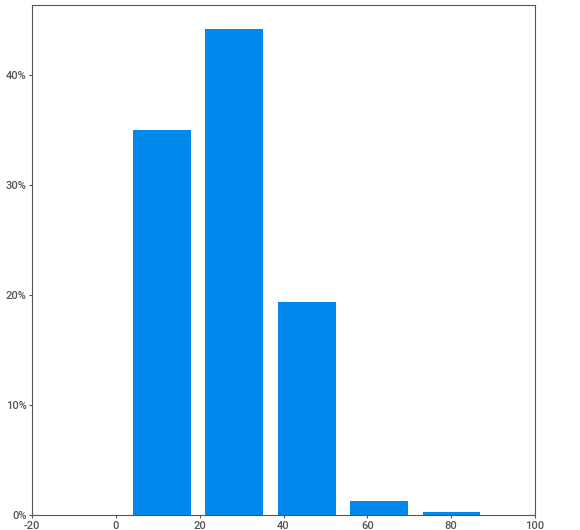
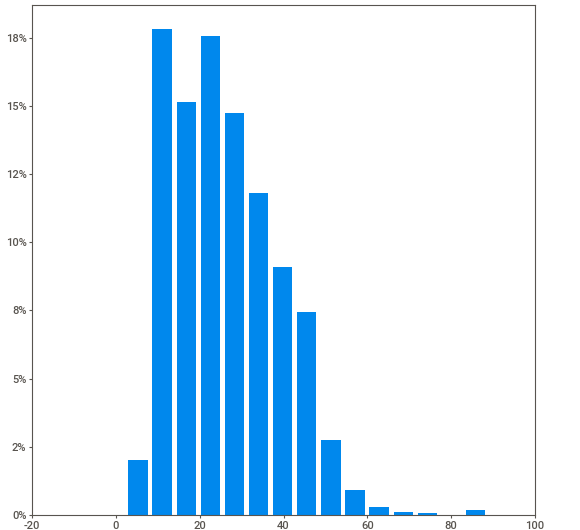
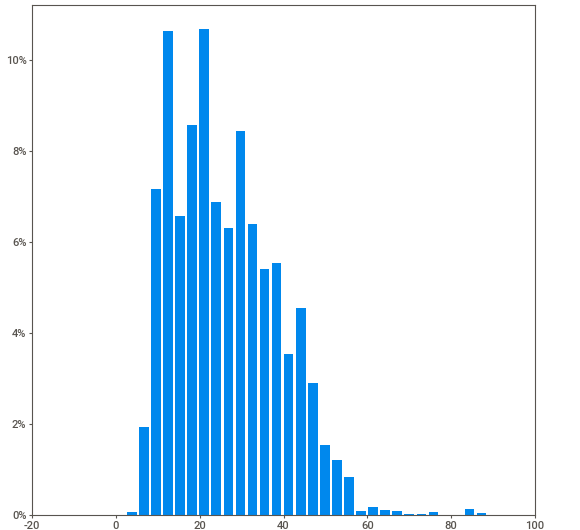
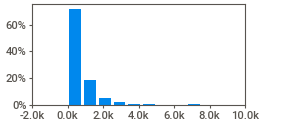
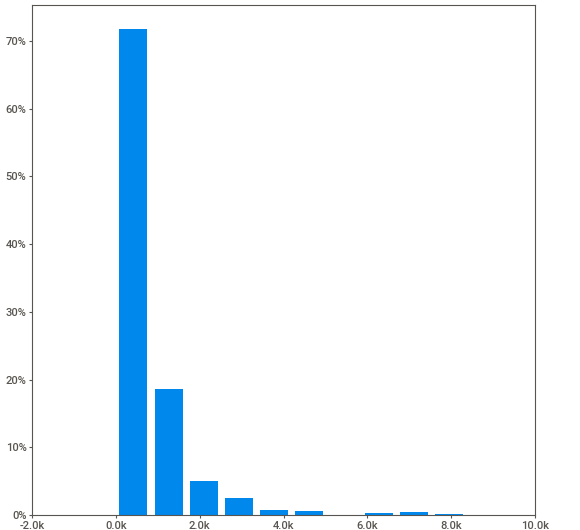
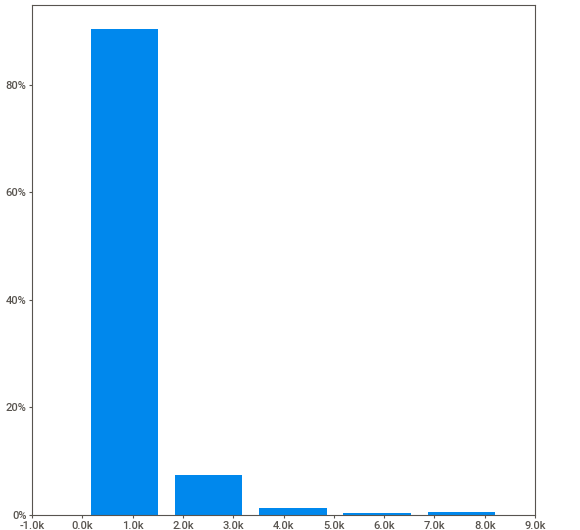
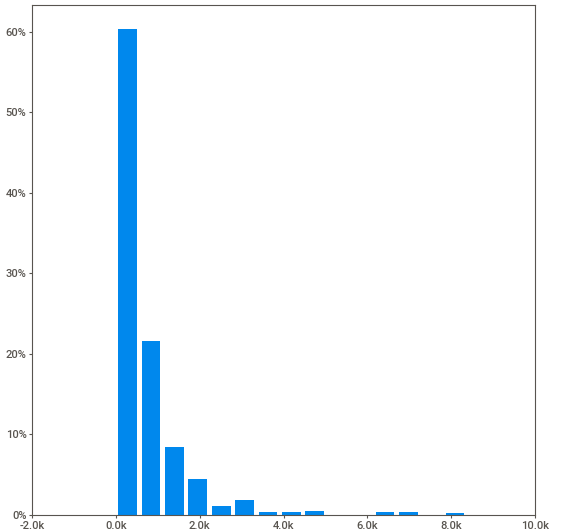
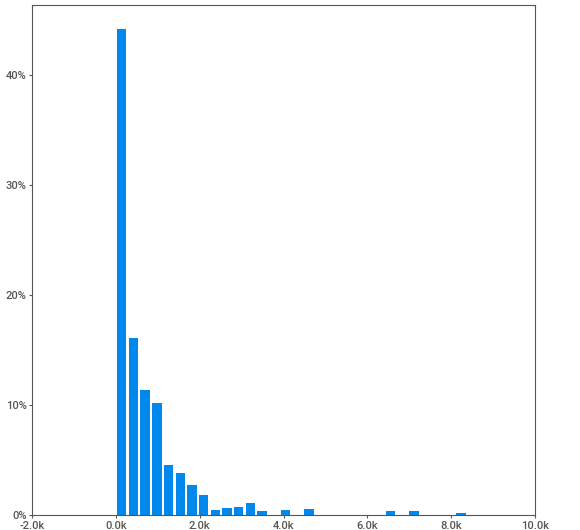
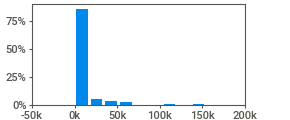
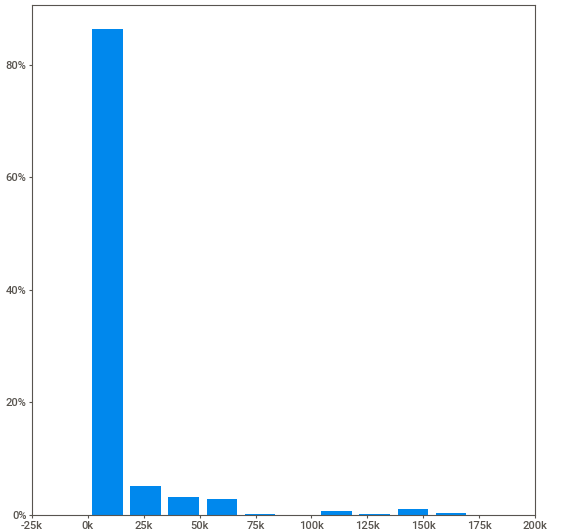
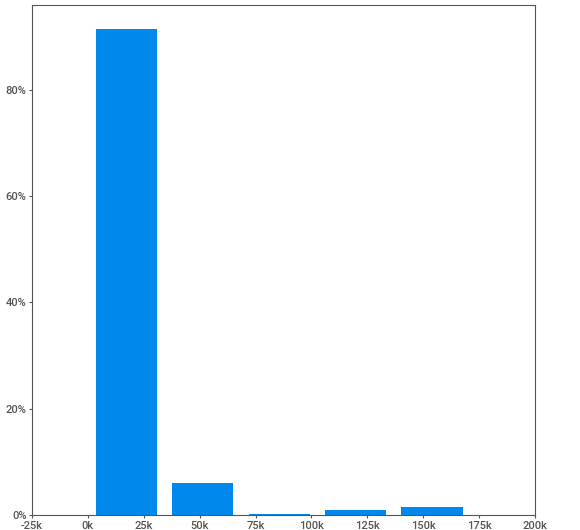
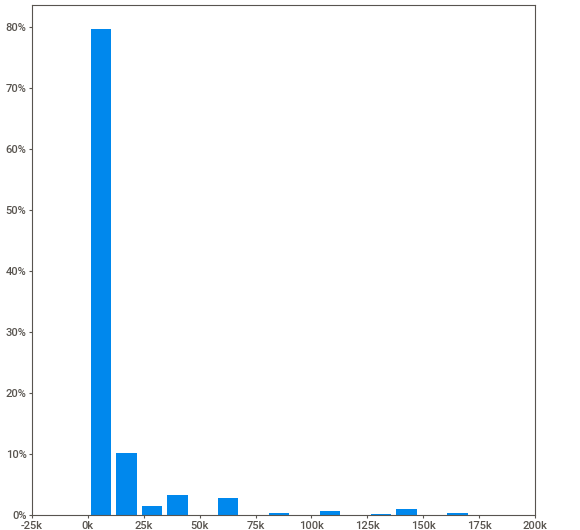
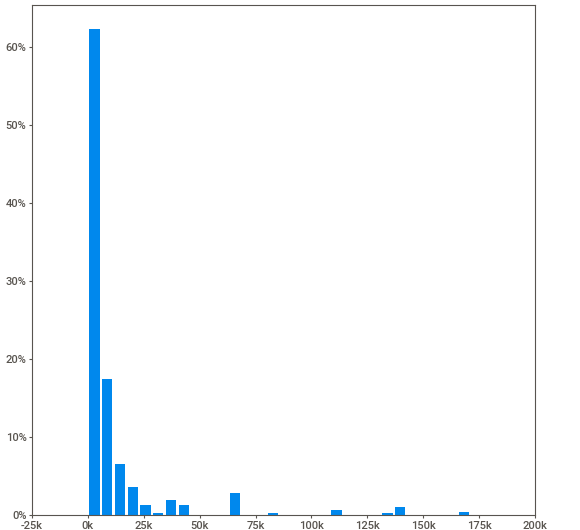
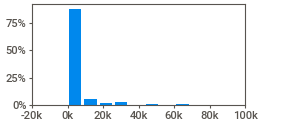
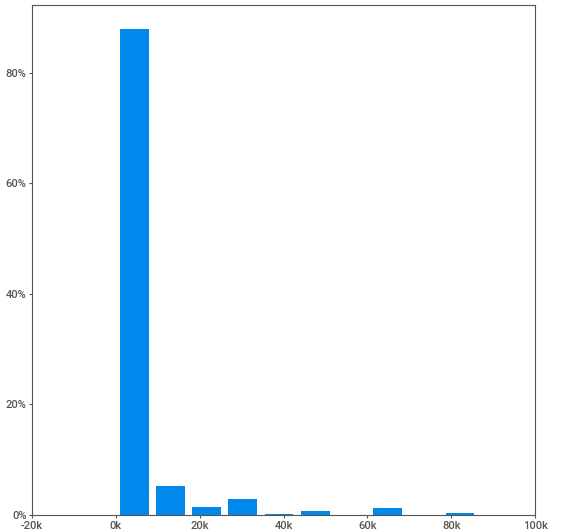
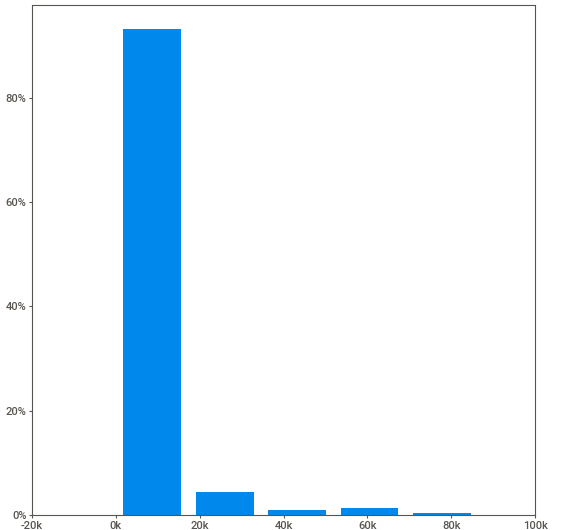
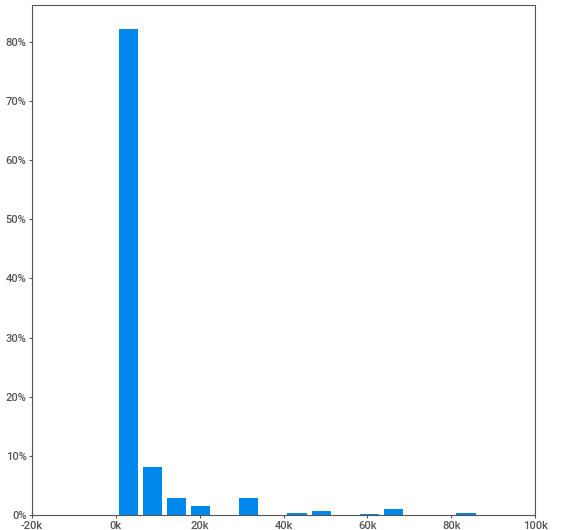
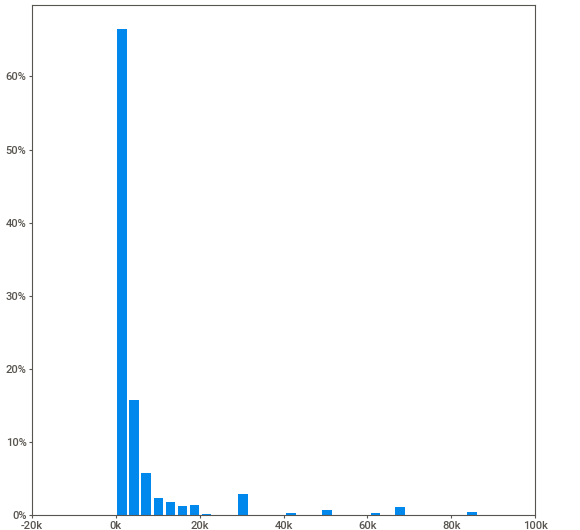
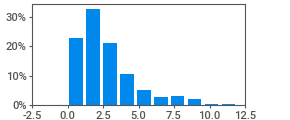
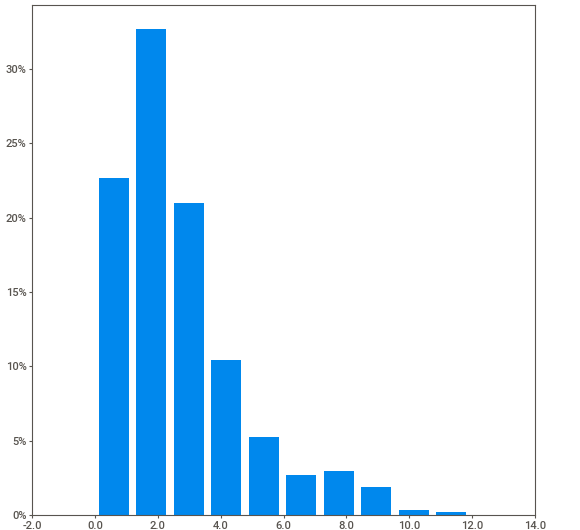
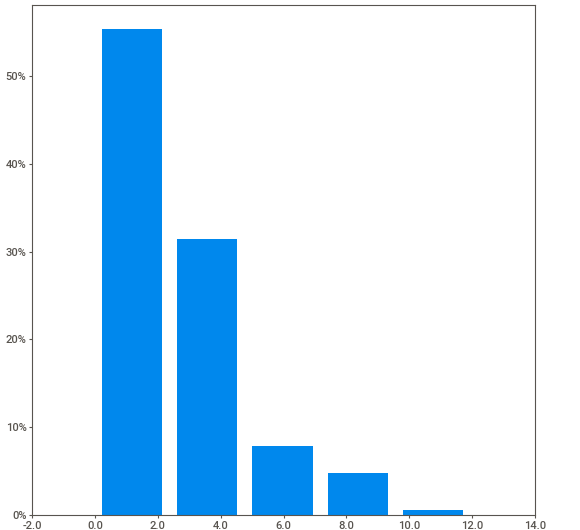
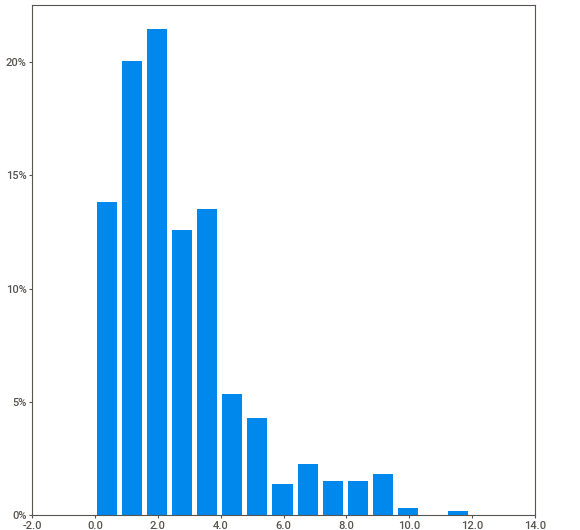
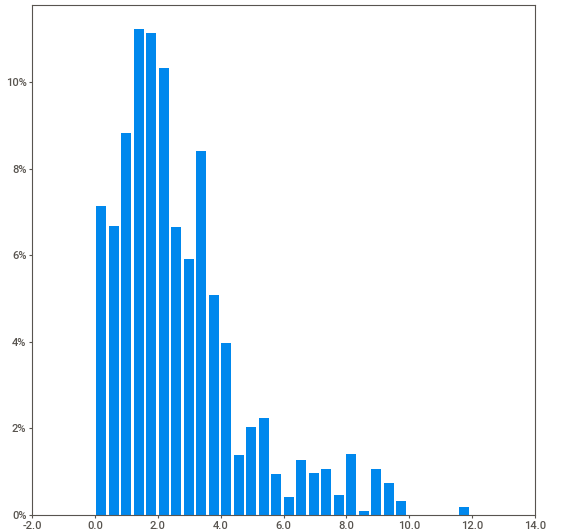
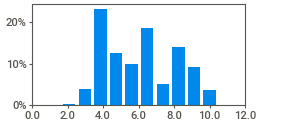
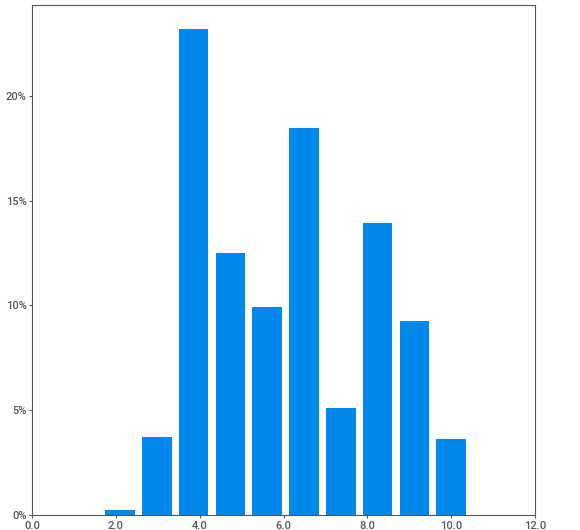
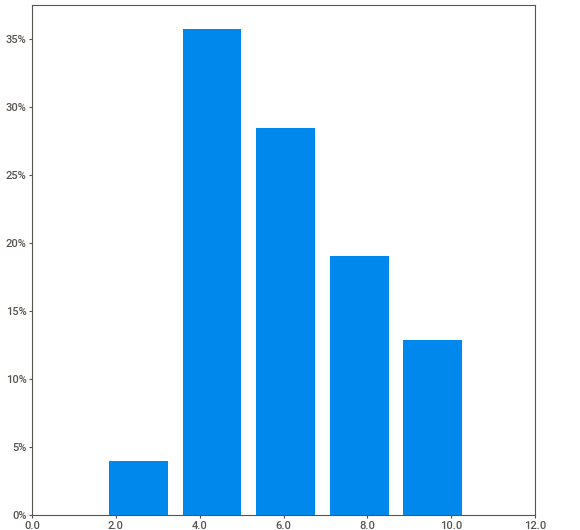
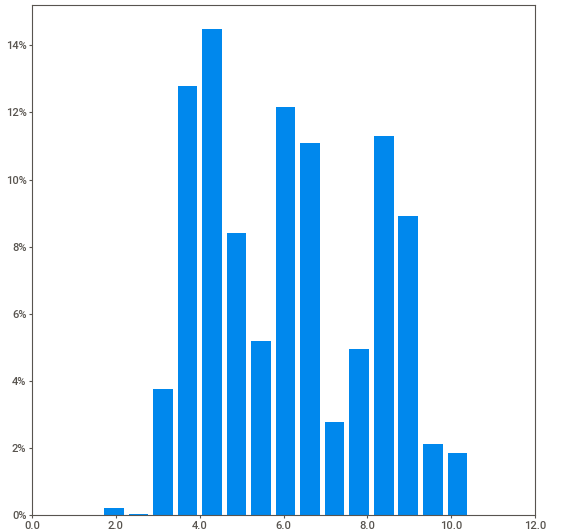
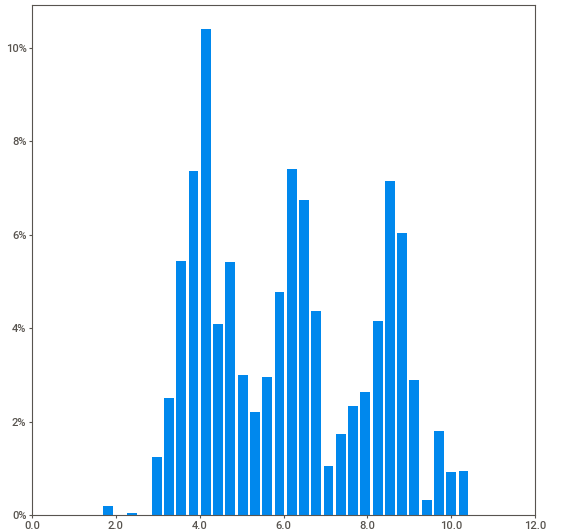
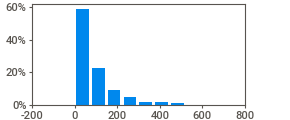
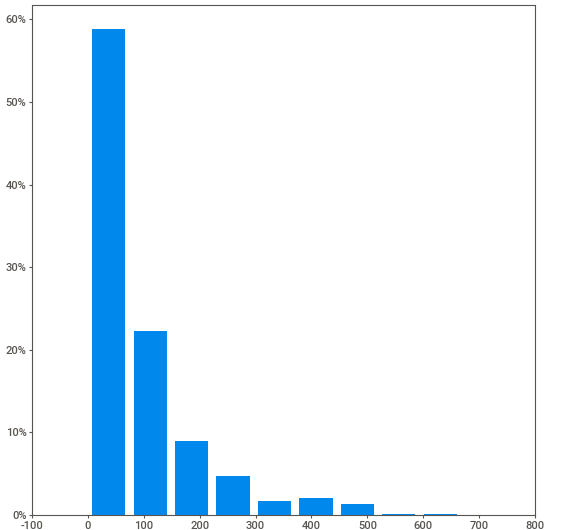
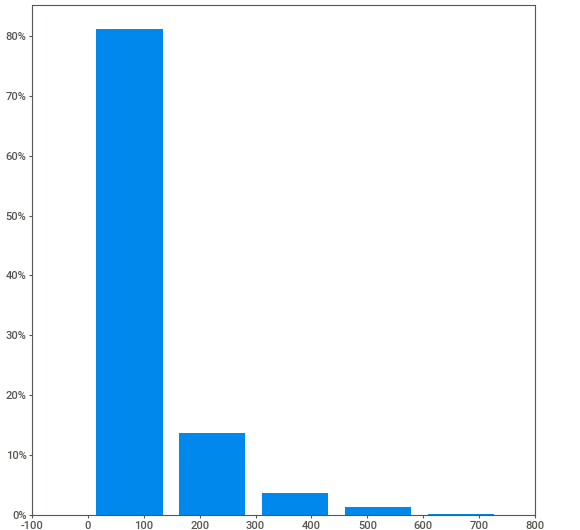
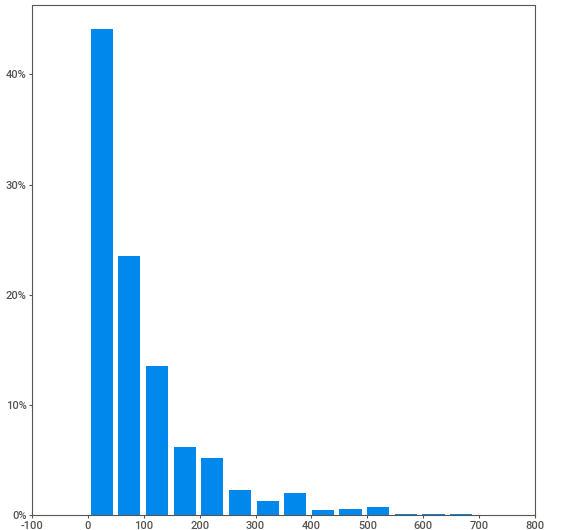
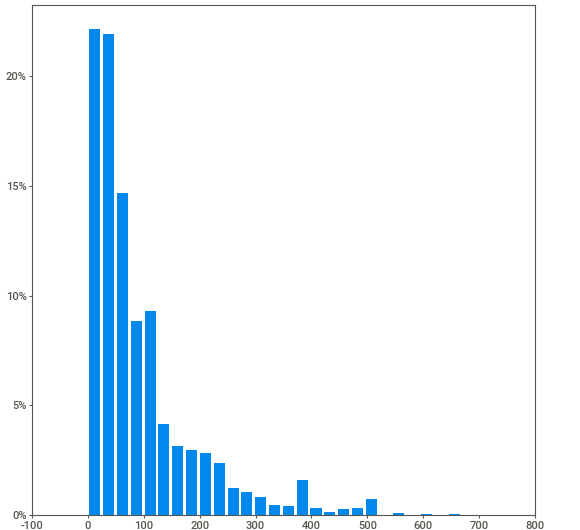
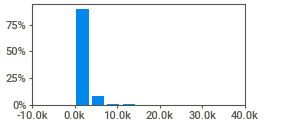
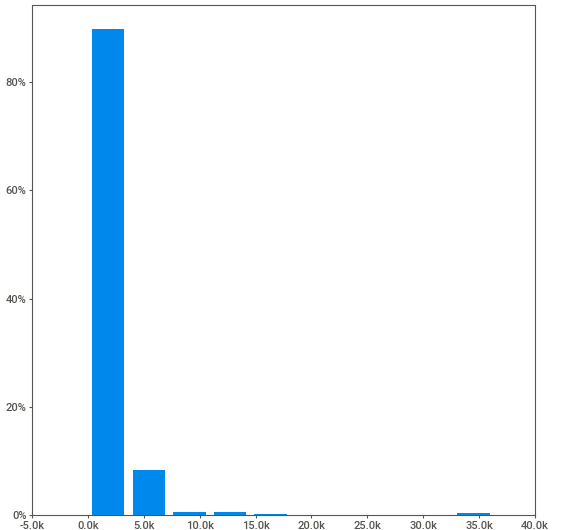
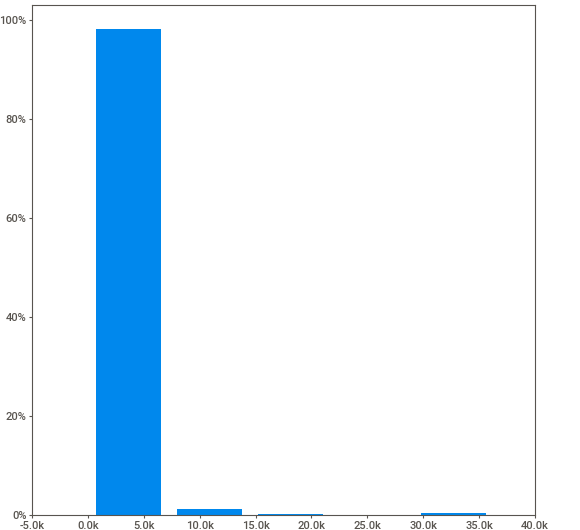
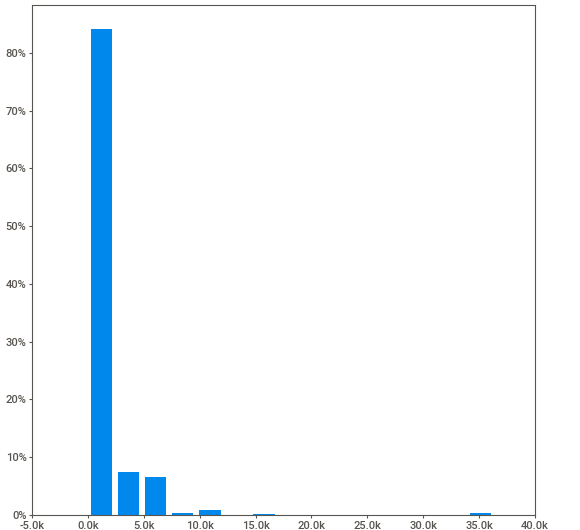
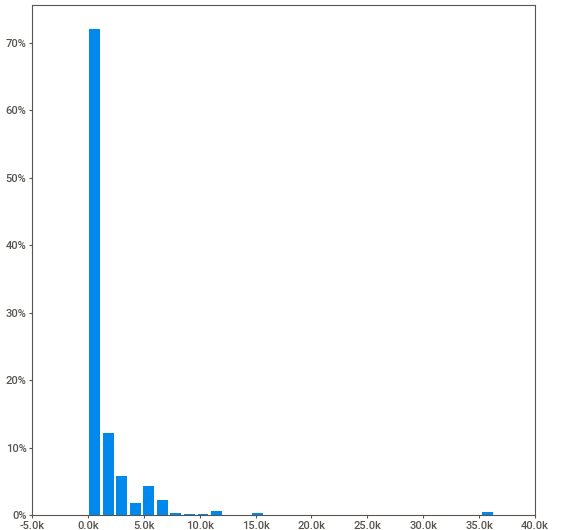
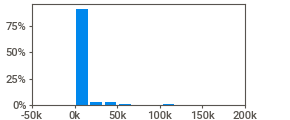
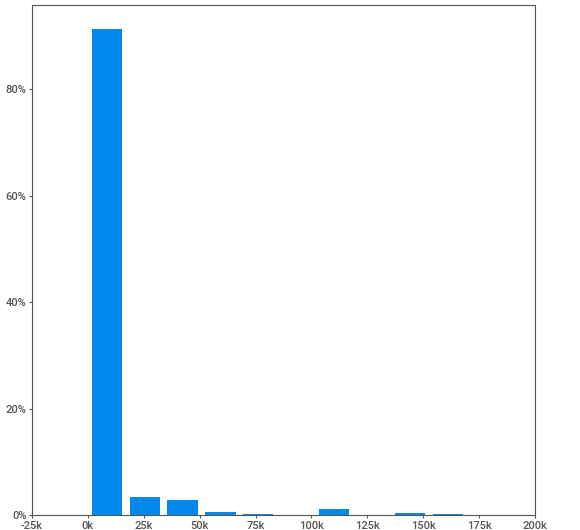
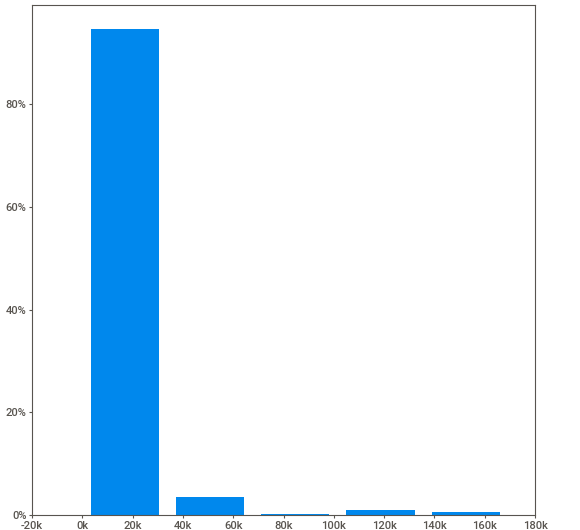
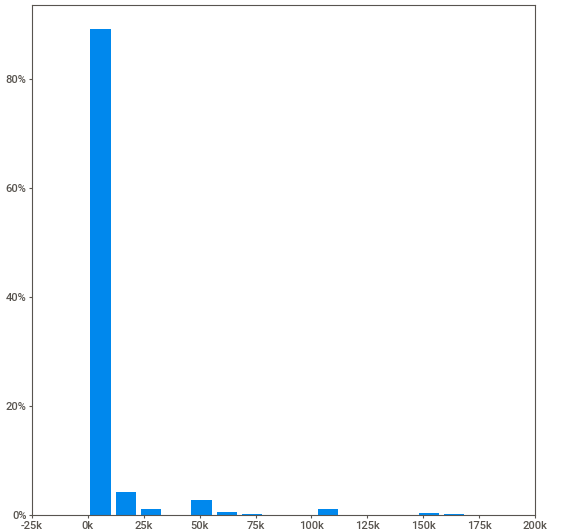
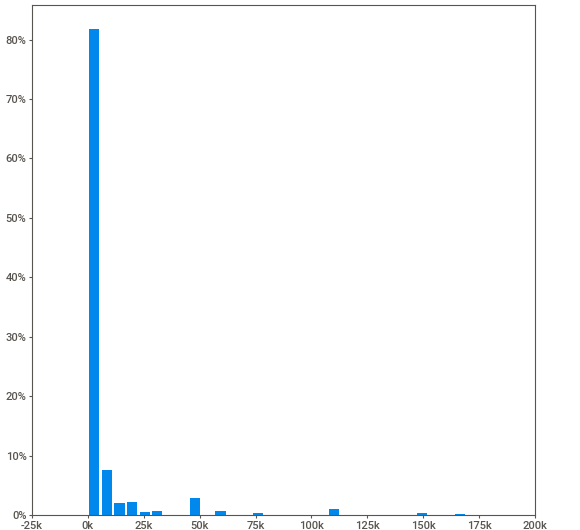
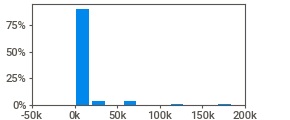
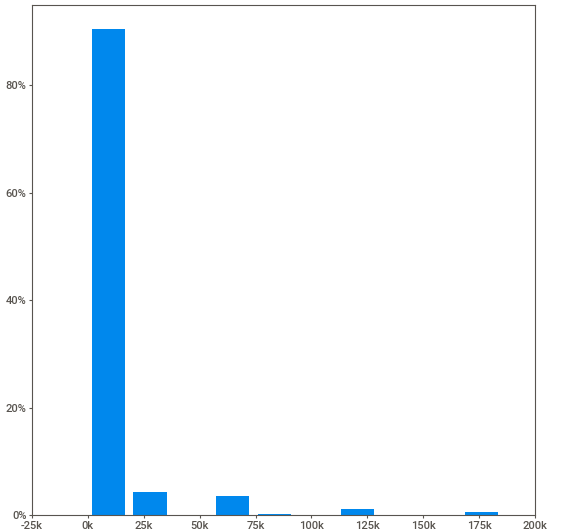
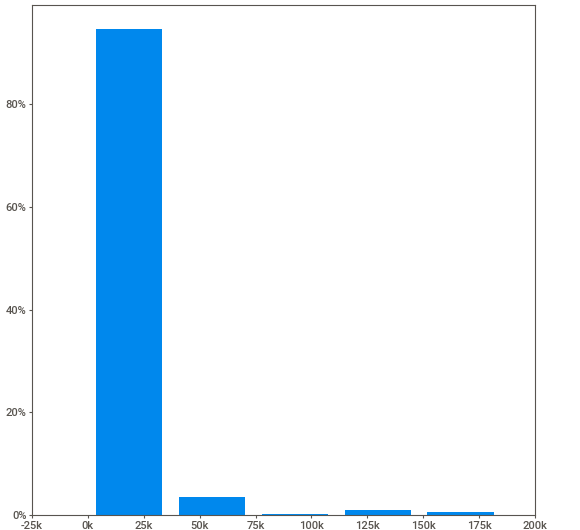
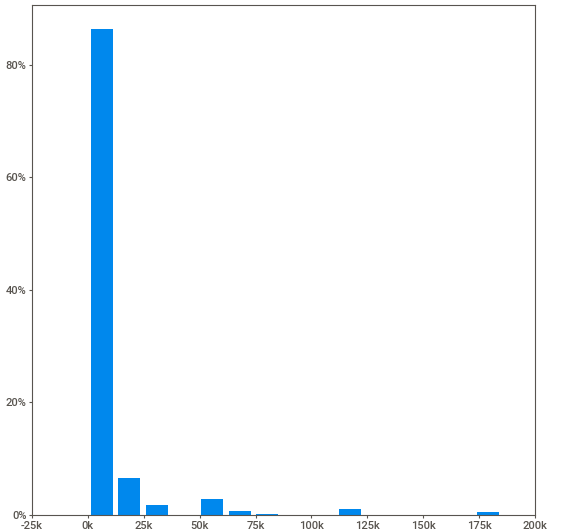
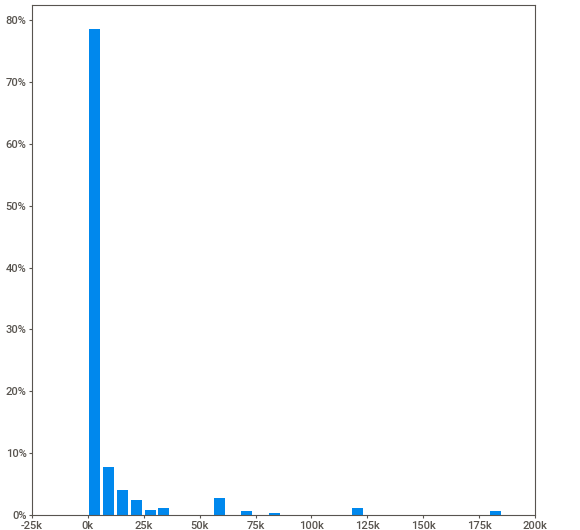
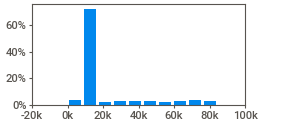
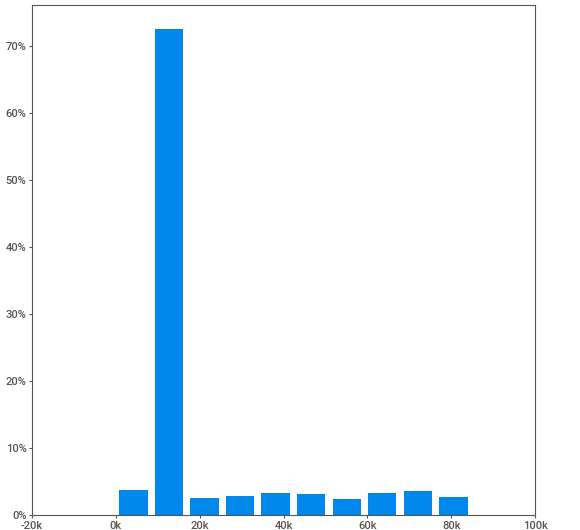
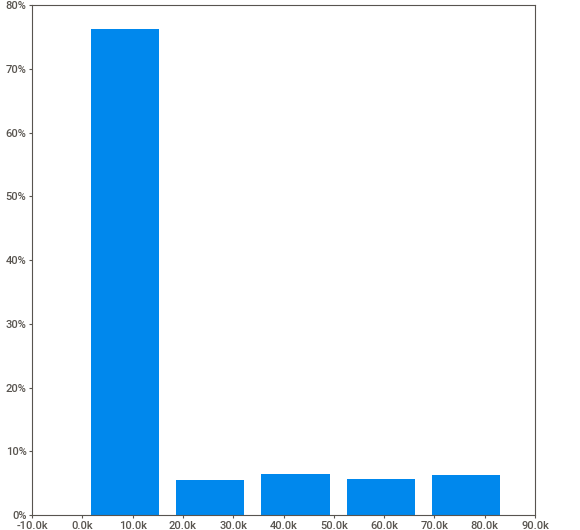
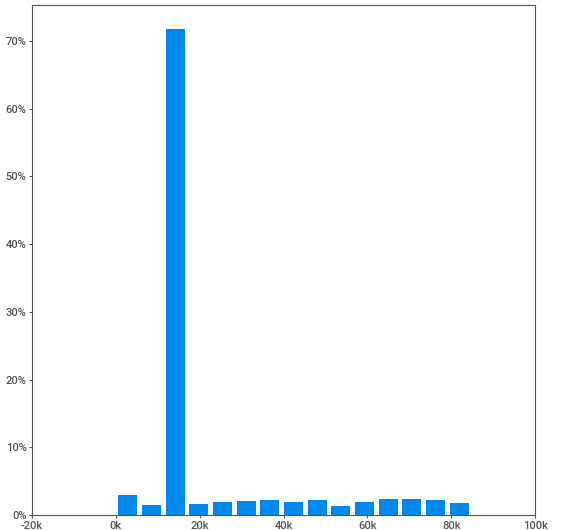
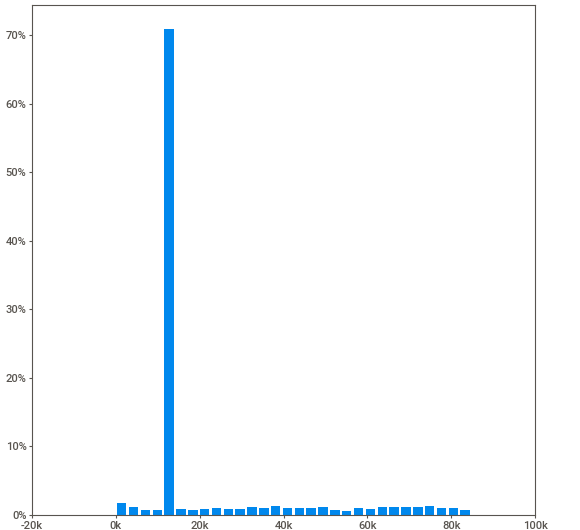
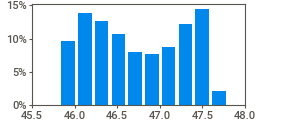
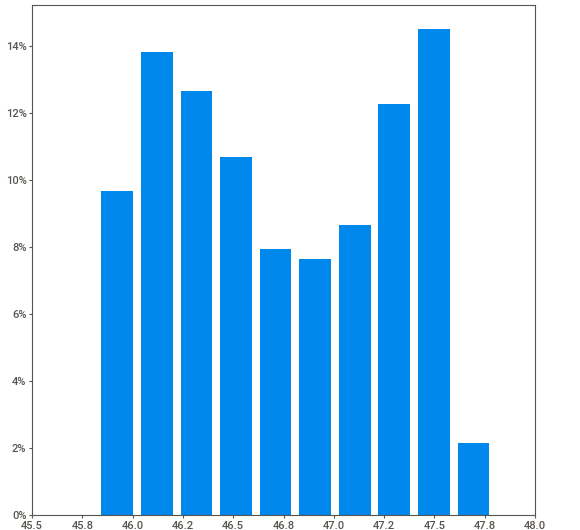
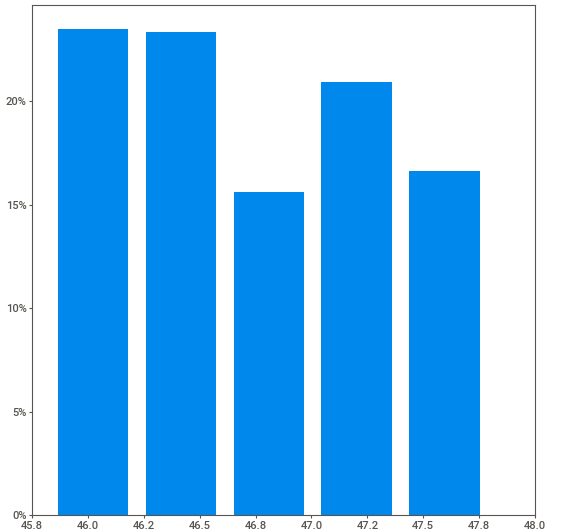
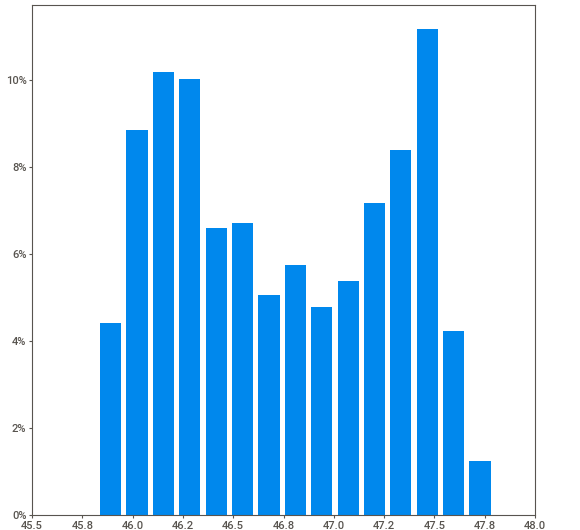
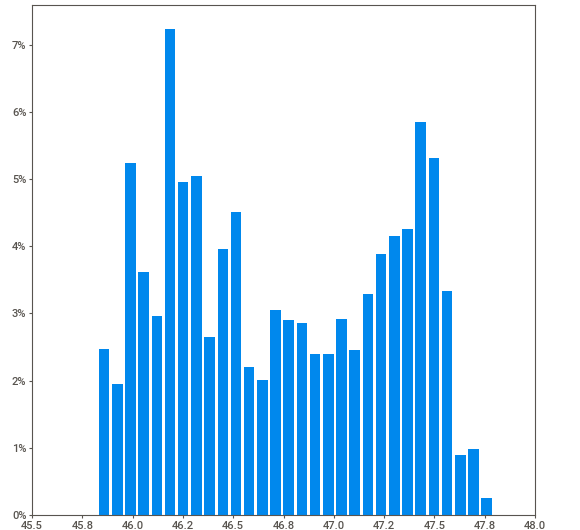
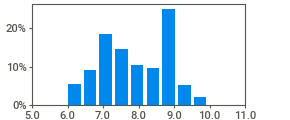
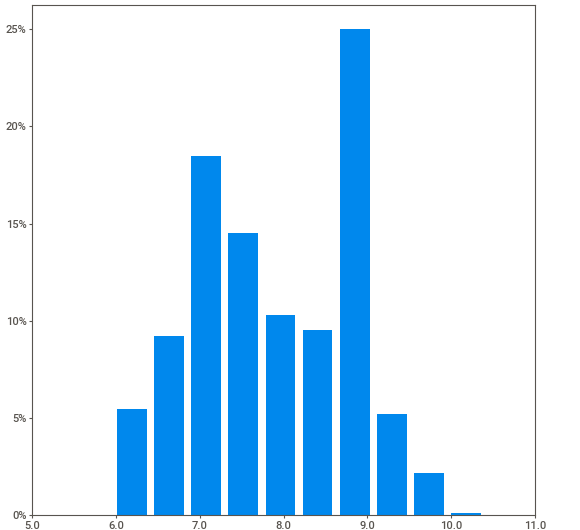
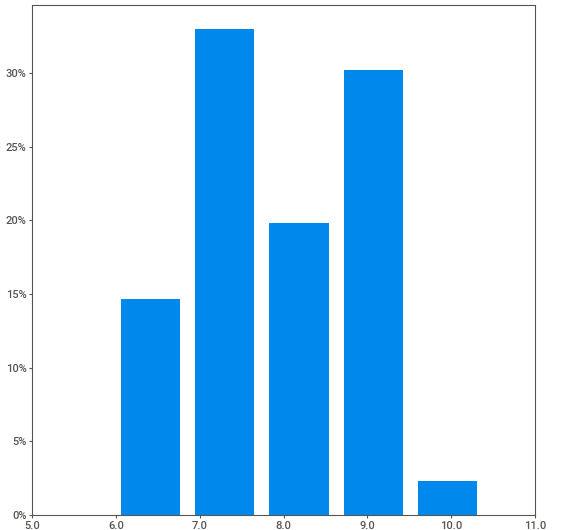
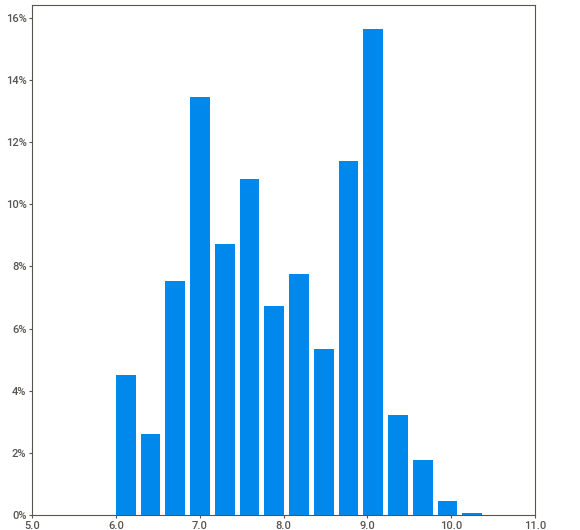
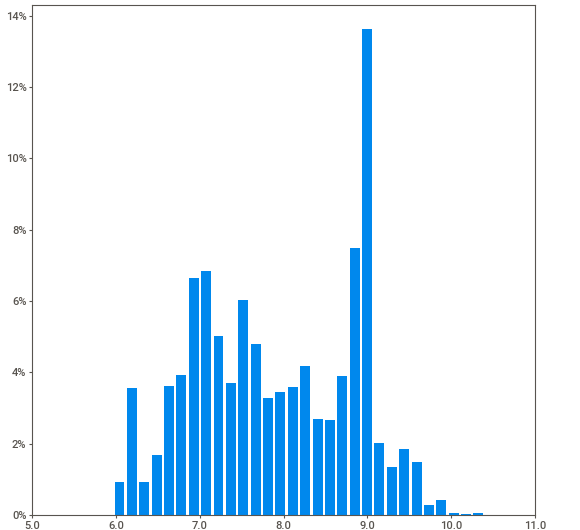
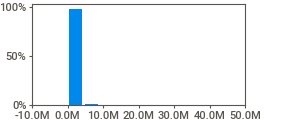
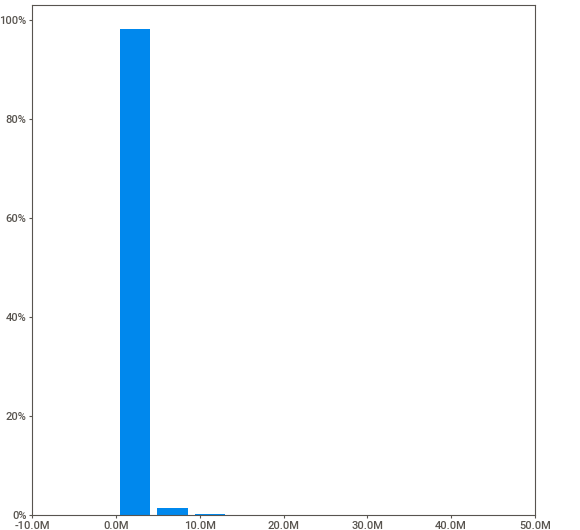
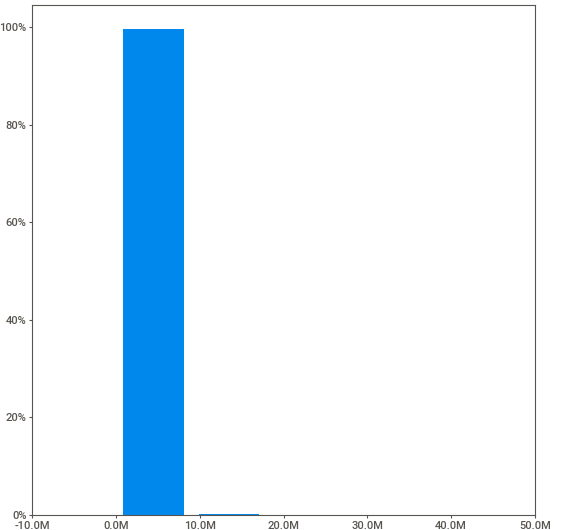
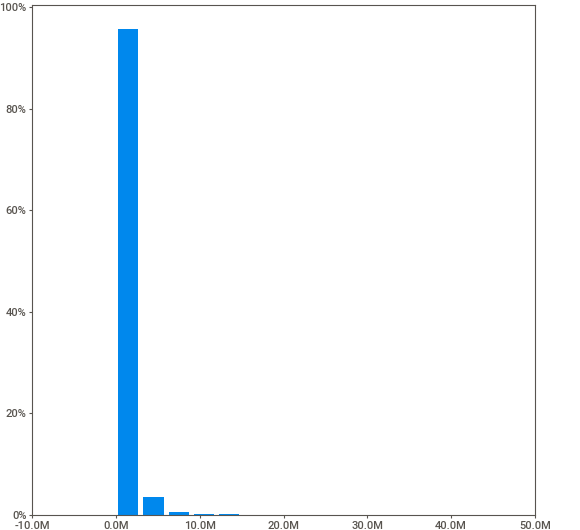
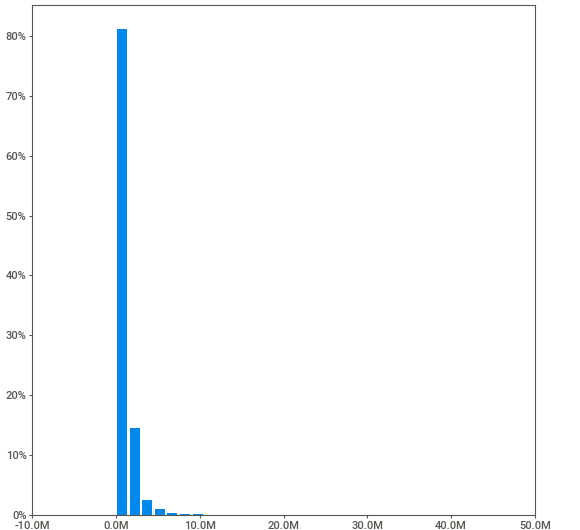
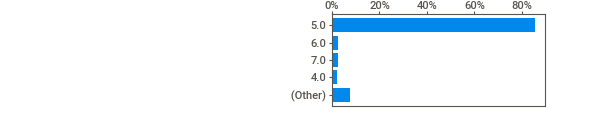
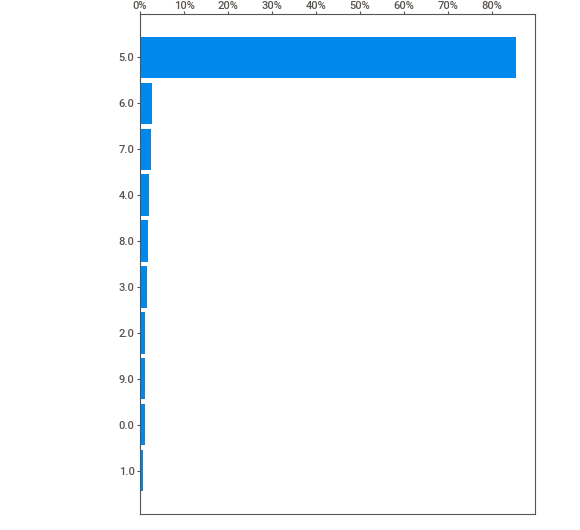
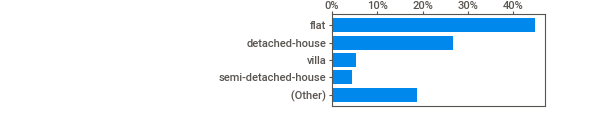
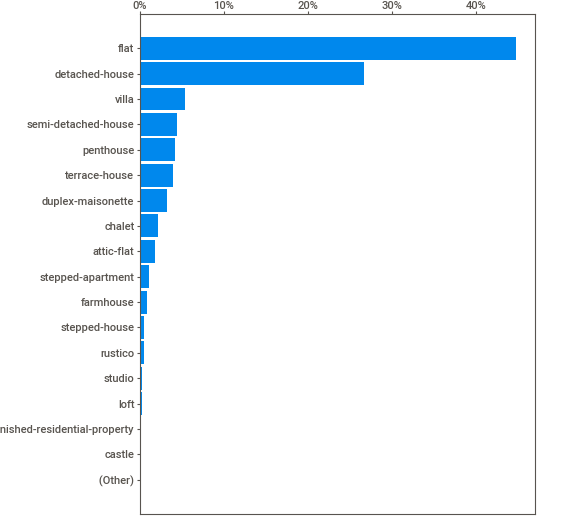
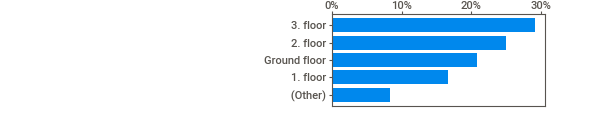
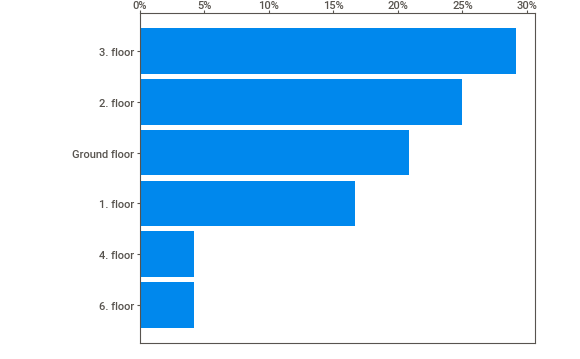
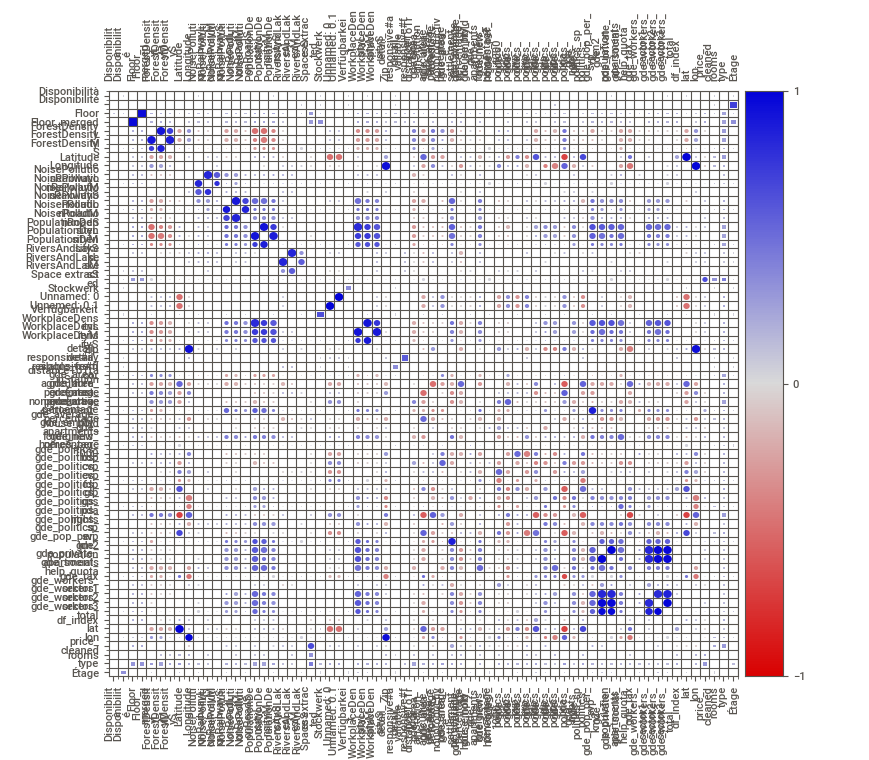
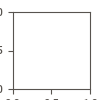

In [4]:
# reorder columns alphabetically and show sweetviz report
df = df.reindex(sorted(df.columns), axis=1)
sweet_report = sv.analyze(df)
sweet_report.show_notebook()

Together with [this](./2-daw_raw.html) analysis, which explores the contents of the columns `description`, `detailed_description`, `table`, `details_structured` and `details`, and the above overview we've identified the following features this dataset provides information on

# Availability
The feature availability represents information on when the object is available. Data on it is present in the following columns of the dataset:

## Columns
- `Availability`
- `Availability_merged`
- `Disponibilità`
- `Disponibilité`
- `Verfügbarkeit`
- `detail_responsive#available_from`
- `details_structured`
- `table`

## Datatype/Format
Either a `date` or a `string` like «On request» or «Immediately».

# Address
The dataset provides information on the municipality, zip code, canton, street and the number of an object. Address data can be found in the following columns:

## Municipality
### Columns
- `Commune`
- `Comune`
- `Gemeinde`
- `Municipality`
- `Municipality_merged`
- `detail_responvice#municipality`
- `address` (with RegEx)
- `Locality`
- `location` (with RegEx)
- `location_parsed` (with RegEx)
- `table` (with RegEx)
- `details_structured` (with RegEx)

### Datatype/Format
String with or without the canton specified to avoid confusion. 


### From `location`

In [5]:
df['location'].head()

0                      5023 Biberstein, AG
1     Buhldenstrasse 8d5023 Biberstein, AG
2                         5022 Rombach, AG
3    Buhaldenstrasse 8A5023 Biberstein, AG
4                         5022 Rombach, AG
Name: location, dtype: object

In [6]:
from_location = df['location'].str.extract(r"\d (.+?),")

In [7]:
from_location.head()

0
0  Biberstein
1  Biberstein
2     Rombach
3  Biberstein
4     Rombach

### From `address`

In [8]:
df['address'].head()

0                        5023 Biberstein, AG
1     Buhldenstrasse 8d, 5023 Biberstein, AG
2                           5022 Rombach, AG
3    Buhaldenstrasse 8A, 5023 Biberstein, AG
4                           5022 Rombach, AG
Name: address, dtype: object

In [9]:
from_address = df['address'].str.extract(r"\d (.+?),")

In [10]:
from_address.head()

0
0  Biberstein
1  Biberstein
2     Rombach
3  Biberstein
4     Rombach

### From `location_parsed`

In [11]:
df['location_parsed'].head()

0      Strasse:  plz:5023 Stadt: Biberstein Kanton: AG
1    Strasse:Buhldenstrasse  8d plz:5023 Stadt: Bib...
2         Strasse:  plz:5022 Stadt: Rombach Kanton: AG
3    Strasse:Buhaldenstrasse  8A plz:5023 Stadt: Bi...
4         Strasse:  plz:5022 Stadt: Rombach Kanton: AG
Name: location_parsed, dtype: object

In [12]:
from_location_parsed = df['location_parsed'].str.extract(r"Stadt: (.+?) K")

In [13]:
from_location_parsed.head()

0
0  Biberstein
1  Biberstein
2     Rombach
3  Biberstein
4     Rombach

### From `table`

In [14]:
df['table'].head()

0    b <article class=####Box-cYFBPY hKrxoH####><h2...
1    b <article class=####Box-cYFBPY hKrxoH####><h2...
2    b <article class=####Box-cYFBPY hKrxoH####><h2...
3    b <article class=####Box-cYFBPY hKrxoH####><h2...
4    b <article class=####Box-cYFBPY hKrxoH####><h2...
Name: table, dtype: object

In [15]:
from_table = df['table'].str.extract("Municipality.+?rJZBK####>(.+?)<\/td>")

In [16]:
from_table.head()

0
0     Biberstein
1     Biberstein
2            NaN
3     Biberstein
4  K&#252;ttigen

### From `details_structured`

In [17]:
df['details_structured'].head()

0    {'Municipality': 'Biberstein', 'Living space':...
1    {'Municipality': 'Biberstein', 'Living space':...
2    {'detail_responsive#municipality': 'Küttigen',...
3    {'Municipality': 'Biberstein', 'Living space':...
4    {'Municipality': 'Küttigen', 'Living space': '...
Name: details_structured, dtype: object

In [18]:
from_details_structured = df['details_structured'].str.extract("'Municipality': '(.+?)'")

In [19]:
from_details_structured.head()

0
0  Biberstein
1  Biberstein
2         NaN
3  Biberstein
4    Küttigen

## Zip Code
### Columns
- `Zip`
- `address` (with RegEx)
- `location` (with RegEx)
- `location_parsed` (with RegEx)
- `details_structured` (contains `location`)

### Datatype/Format
4 digit integer

## Canton
### Columns
- `address`
- `location`
- `location_parsed`
- `details_structured`

### Datatype/Format
2 caps character string



## Street
### Columns
- `address`
- `location`
- `location_parsed`
- `details_structured`

### Datatype/Format
String containing white spaces and special characters and if collected a street number which contains of integers and sometimes characters.



## Coordinates
### Columns
- `Latitude`
- `Longitude`
- `lat`
- `lon`

### Datatype/Format
Float. 

# Floor
This feature contains data on which floor an object is located and is found in the following columns:

## Columns
- `Floor`
- `Floor_merged`
- `Piano`
- `Stockwerk`
- `Étage`
- `detail_responsive#floor`
- `table`
- `details_structured`

## Datatype/Format
Either an integer and a string like `1. floor` or as a string only: `Ground floor`. 

# Floor space
The floor space is the part of the area that can be used in accordance with the respective purpose. [Immoscout DE](https://www.immobilienscout24.de/wissen/bauen/nutzflaeche.html) provides information on which rooms count as floor space and which do not.

## Columns
- `Floor space`
- `Floor_space_merged`
- `Nutzfläche`
- `Superficie utile`
- `Surface utile`
- `detail_responsive#surface_usable`
- `table`
- `details_structured`

## Datatype/Format
Integer

# Gross return
This feature can not be used for our modelling process as only 6 observations are available. 

## Columns
- `Gross return`
- `table`
- `details_structured`

## Datatype/Format
Float percentage

# Plot area
The plot area indicates the total size of a lot and is measured in square meters. [source](https://www.immobilienscout24.de/wissen/verkaufen/grundstuecksflaeche.html) 

## Columns
- `Grundstücksfläche`
- `Plot area`
- `Plot_area_merged`
- `Superficie del terreno`
- `Surface de terrain`
- `detail_responsive#surface_property`
- `table`
- `details_structured`

## Datatype/Format
Integer

# Living space
According to [swisslife](https://www.swisslife.ch/de/private/blog/immo/so-berechnen-sie-die-wohnflaeche.html), there is no uniform and legally binding definition of how the living space must be measured. Nevertheless [Wikipedia](https://de.wikipedia.org/wiki/Wohnfläche) writes that this is a determining factor for the rent / purchase price.  

## Columns
- `Living space`
- `Living_space_merged`
- `Superficie abitabile`
- `Surface habitable`
- `Wohnfläche`
- `detail_responsive#surface_living`
- `description`
- `table`
- `details_structured`

## Datatype/Format
Integer

# Environment
These are various measurements collected from the BfS(Bundesamt für Statistik) for a given municipality.

## Noise pollution railway
### Columns
- `NoisePollutionRailwayL`
- `NoisePollutionRailwayM`
- `NoisePollutionRailwayS`

## Noise pollution road
### Columns
- `NoisePollutionRoadL`
- `NoisePollutionRoadM`
- `NoisePollutionRoadS`

## PopulationDensity
### Columns
- `PopulationDensityL`
- `PopulationDensityM`
- `PopulationDensityS`

## RiversAndLakes
### Columns
- `RiversAndLakesL`
- `RiversAndLakesM`
- `RiversAndLakesS`

##  Forest density
### Columns
- `ForestDensityL`
- `ForestDensityM`
- `ForestDensityS`

## WorkplaceDensity
### Columns
- `WorkplaceDensityL`
- `WorkplaceDensityM`
- `WorkplaceDensityS`

## Datatype/Format
Float percentage (0-1)

## Distance to train station
### Columns
- `distanceToTrainStation`

### Datatype/Format
Float

# Space extracted
It's unclear which type of space this column represents but the most obvious one would be living space. We explore the content in detail in [this](./3-daw_quantitative.html) notebook.

## Datatype/Format
Integer

# gde_ columns
The data in the following columns is not provided by immoscout24 and has been collected for the given municipalities:

- `gde_area_agriculture_percentage`
- `gde_area_forest_percentage`
- `gde_area_nonproductive_percentage`
- `gde_area_settlement_percentage`
- `gde_average_house_hold`
- `gde_empty_apartments`
- `gde_foreigners_percentage`
- `gde_new_homes_per_1000`
- `gde_politics_bdp`
- `gde_politics_cvp`
- `gde_politics_evp`
- `gde_politics_fdp`
- `gde_politics_glp`
- `gde_politics_gps`
- `gde_politics_pda`
- `gde_politics_rights`
- `gde_politics_sp`
- `gde_politics_svp`
- `gde_pop_per_km1`
- `gde_population`
- `gde_private_apartments`
- `gde_social_help_quota`
- `gde_tax`
- `gde_workers_sector1`
- `gde_workers_sector2`
- `gde_workers_sector3`
- `gde_workers_total`



## Datatype/Format
Float

# Price
The asking price of the object  

## Columns
- `price`
- `price_cleaned`
- `description`
- `details_structured`

## Datatype/Format
Float or string `Price on request`

# Rooms
The following rooms are counted as whole rooms when renting or selling an apartment: 
- Living room
- bedroom
- study
- children's room  

Officially, however, there is no definition of what counts as half a room, so this information can only be used as a guide. Bathroom, shower and kitchen are not counted as rooms. [source](https://www.immoscout24.ch/de/c/d/immobilien-magazin/definition-halbes-zimmer-schweiz?a=4569)  

## Columns
- `rooms`
- `description`
- `details`
- `details_structured`


## Datatype/Format
Float

# Type
The type of the object.  
## Columns
- `type`
## Datatype/Format
String

# Misc
These columns do not seem to provide relevant information for the modelling process.  

## Columns
- `title`
- `url`
- `link`
## Datatype/Format
String